In [1]:
# For the notebook to work you must have m3_learning installed
# !pip install m3-learning

In [2]:
import sys
import matplotlib.pyplot as plt
import warnings
import torch

# warnings.filterwarnings("ignore")
# # if you want to modify files,
# # edit this to match the location whwere you downloaded the m3_learning package
# m3_package_location = '/home/xinqiao/' 
# sys.path.append(f"{m3_package_location}/m3_learning/m3_learning/src")

In [3]:
%load_ext autoreload
%autoreload 2 

In [4]:
from m3_learning.viz.printing import printer
from m3_learning.viz.style import set_style
from m3_learning.viz.Movies import make_movie
from m3_learning.nn.Bright_Field_NN.Dataset import Bright_Field_Dataset
from m3_learning.nn.Bright_Field_NN.Viz import Viz
from m3_learning.nn.Bright_Field_NN.Autoencoder import ConvAutoencoder
from m3_learning.viz.layout import layout_fig, labelfigs
from m3_learning.util.file_IO import download_and_unzip

# Specify the `save_path`` where you saved your data 
# modify `save_path` and `fig_path` to fit your own file system
save_path = './../../../Data/2023_Bright_Field'
fig_path = save_path.replace("Data", "Figures") + '/'

2023-11-10 16:46:22.869200: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 16:46:22.902249: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-10 16:46:22.902280: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-10 16:46:22.902315: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-10 16:46:22.910080: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: A

2023-11-10 16:46:23.584481: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
# # list of files to download from zenodo
# # uncomment this if you need to download the files from zenodo
# files = [ r'Annealed.zip',
#           r'Nitrogen.zip',
#           r'Oxygen.zip',
#           r'Vacuum.zip',
#           r'Annealed_epoch%2000043_trainloss%200.2921_coef%205.0000E-08.pkl',
#           r'Nitrogen_epoch_00060_trainloss_0.2925_coef_9.0000E-08.pkl',
#           r'Oxygen_epoch_00037_trainloss_0.3050_coef_5.0000E-08.pkl',
#           r'Vacuum_epoch_00137_trainloss_0.3150_coef_3.0250E-07.pkl'
# ]

# # downloads all the files
# for file in files:
#     # Download the data file from Zenodo
#     url = f"https://zenodo.org/record/10092383/files/{file}?download=1"

#     # download the file
#     download_and_unzip(file, url, save_path)

In [6]:
# defines Dataset object using images from specified folder
dset = Bright_Field_Dataset(datapath = f'{save_path}/Annealed',
                            combined_name = 'Annealed',
                            verbose=False)

In [7]:
# list paths of image data in order
dset.get_temp_paths()[:5]

['./../../../Data/2023_Bright_Field/Annealed/Ramp_Up/23.png',
 './../../../Data/2023_Bright_Field/Annealed/Ramp_Up/30.png',
 './../../../Data/2023_Bright_Field/Annealed/Ramp_Up/40.png',
 './../../../Data/2023_Bright_Field/Annealed/Ramp_Up/50.png',
 './../../../Data/2023_Bright_Field/Annealed/Ramp_Up/60.png']

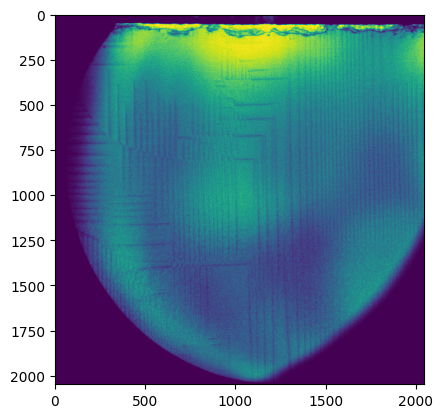

In [8]:
# Look at a raw image using the state/temperature
im = dset.get_raw_img(state = 'Ramp_Up',
                 temperature = 23)
plt.imshow(im)
plt.show()

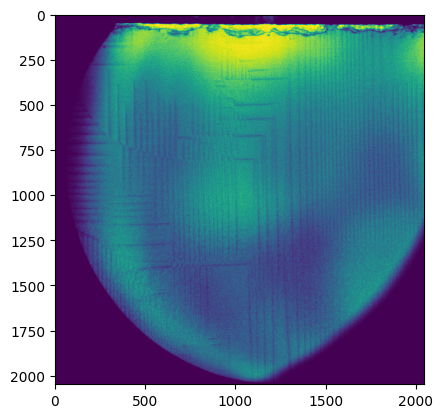

In [9]:
# Look at a raw image using index
im = dset.get_raw_img(path_index=0)
plt.imshow(im)
plt.show()

In [10]:
# builds the printer object
printing = printer(basepath=fig_path,fileformats=['png','svg'])

# Set the style of the plots
set_style("printing")

printing set for seaborn


In [11]:
# builds the printer object
printing = printer(basepath=fig_path,fileformats=['png','svg'],verbose=False)

# Set the style of the plots
set_style("printing")

# create vizualizer object
viz = Viz(dset,printer=printing)

# add scalebar
# Note that this should be the scalebar for the raw images
viz.scalebar_ = {"units": "nm", # choose units
                 "width": 273.4, # width of the raw image 
                 "scale length": 50 # width you want for the colorbar
                 }


printing set for seaborn


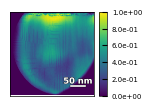

In [12]:
# view raw image. You can use
img_name = ['Ramp_Up','23']
viz.view_raw(img_name)

In [13]:
# Write image data to h5 file (DO ONE TIME)
# saves original images as well as 
# cropped images with gaussian filter applied
# Make sure your cropped image size is divisible by the windowing step
dset.write_h5(200,300,1400)

  0%|          | 0/43 [00:00<?, ?it/s]

  2%|▏         | 1/43 [00:00<00:18,  2.23it/s]

  5%|▍         | 2/43 [00:00<00:17,  2.28it/s]

  7%|▋         | 3/43 [00:01<00:17,  2.23it/s]

  9%|▉         | 4/43 [00:01<00:17,  2.27it/s]

 12%|█▏        | 5/43 [00:02<00:16,  2.27it/s]

 14%|█▍        | 6/43 [00:02<00:16,  2.30it/s]

 16%|█▋        | 7/43 [00:03<00:15,  2.32it/s]

 19%|█▊        | 8/43 [00:03<00:15,  2.26it/s]

 21%|██        | 9/43 [00:03<00:14,  2.27it/s]

 23%|██▎       | 10/43 [00:04<00:14,  2.26it/s]

 26%|██▌       | 11/43 [00:04<00:13,  2.29it/s]

 28%|██▊       | 12/43 [00:05<00:13,  2.24it/s]

 30%|███       | 13/43 [00:05<00:13,  2.28it/s]

 33%|███▎      | 14/43 [00:06<00:12,  2.31it/s]

 35%|███▍      | 15/43 [00:06<00:12,  2.29it/s]

 37%|███▋      | 16/43 [00:07<00:11,  2.25it/s]

 40%|███▉      | 17/43 [00:07<00:11,  2.28it/s]

 42%|████▏     | 18/43 [00:07<00:10,  2.29it/s]

 44%|████▍     | 19/43 [00:08<00:10,  2.30it/s]

 47%|████▋     | 20/43 [00:08<00:09,  2.32it/s]

 49%|████▉     | 21/43 [00:09<00:09,  2.30it/s]

 51%|█████     | 22/43 [00:09<00:09,  2.27it/s]

 53%|█████▎    | 23/43 [00:10<00:08,  2.31it/s]

 56%|█████▌    | 24/43 [00:10<00:08,  2.33it/s]

 58%|█████▊    | 25/43 [00:10<00:07,  2.29it/s]

 60%|██████    | 26/43 [00:11<00:07,  2.25it/s]

 63%|██████▎   | 27/43 [00:11<00:06,  2.29it/s]

 65%|██████▌   | 28/43 [00:12<00:06,  2.30it/s]

 67%|██████▋   | 29/43 [00:12<00:06,  2.26it/s]

 70%|██████▉   | 30/43 [00:13<00:05,  2.28it/s]

 72%|███████▏  | 31/43 [00:13<00:05,  2.31it/s]

 74%|███████▍  | 32/43 [00:13<00:04,  2.32it/s]

 77%|███████▋  | 33/43 [00:14<00:04,  2.33it/s]

 79%|███████▉  | 34/43 [00:14<00:03,  2.35it/s]

 81%|████████▏ | 35/43 [00:15<00:03,  2.36it/s]

 84%|████████▎ | 36/43 [00:15<00:03,  2.33it/s]

 86%|████████▌ | 37/43 [00:16<00:02,  2.27it/s]

 88%|████████▊ | 38/43 [00:16<00:02,  2.29it/s]

 91%|█████████ | 39/43 [00:17<00:01,  2.32it/s]

 93%|█████████▎| 40/43 [00:17<00:01,  2.22it/s]

 95%|█████████▌| 41/43 [00:17<00:00,  2.24it/s]

 98%|█████████▊| 42/43 [00:18<00:00,  2.28it/s]

100%|██████████| 43/43 [00:18<00:00,  2.31it/s]

100%|██████████| 43/43 [00:18<00:00,  2.29it/s]

In [89]:
# Customize window parameters
# This will run very slow for small step sizes
window_parameters = {'fft_mode': 'abs',
                    'mode': 'fft',
                    'window_size_x': 128,
                    'window_size_y': 128,
                    'window_step_x': 32,
                    'window_step_y': 32,
                    'zoom_factor': 2,
                    'interpol_factor': 2.3,
                    'filter': 'hamming'}

# Write windows
wins = dset.write_windows(window_parms=window_parameters,
                          overwrite=True,
                          windows_group='old_windows',
                          filter_threshold=5)

100%|██████████| 43/43 [07:19<00:00, 10.23s/it]


In [14]:
# You can also look at the dataset file this way, if you want to open it in the notebook. 
# but you are more likely to corrupt the file
h = dset.open_combined_h5()
print(h.keys())

# Be sure to close the file after use
h.close()
h

<KeysViewHDF5 ['All', 'All_filtered', 'old_windows']>


<Closed HDF5 file>

In [15]:
# Get information on the h5 combined file
k = dset.get_combined_h5_info()

<HDF5 group "/" (3 members)>
	<HDF5 dataset "All": shape (43, 1400, 1400), type "<f4">
	<HDF5 dataset "All_filtered": shape (43, 1400, 1400), type "<f4">
	<HDF5 group "/old_windows" (3 members)>
		<HDF5 group "/old_windows/filler" (1 members)>
			<HDF5 group "/old_windows/filler/windows" (6 members)>
				<HDF5 dataset "WindowX": shape (147,), type "<f8">
				<HDF5 dataset "WindowY": shape (147,), type "<f8">
				<HDF5 dataset "a": shape (41,), type "<f8">
				<HDF5 dataset "b": shape (41,), type "<f8">
				<HDF5 group "/old_windows/filler/windows/metadata" (0 members)>
				<HDF5 dataset "windows": shape (41, 41, 147, 147), type "<f4">
		<HDF5 dataset "windows_data": shape (72283, 147, 147), type "<f4">
		<HDF5 dataset "windows_logdata": shape (72283, 128, 128), type "<f4">


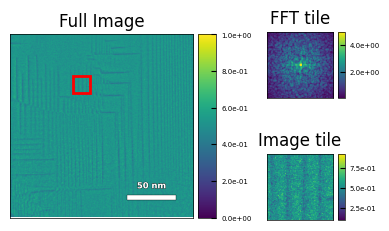

In [16]:
# view windows
img_name = ['Ramp_Up','23']
viz.view_window(img_name,15,10,
                '/old_windows/windows_logdata')

In [17]:
# defined model parameters
encoder_step_size = (128,128)
# [dset.get_shape('old_windows/windows_logdata')[-2],
                    #  dset.get_shape('old_windows/windows_logdata')[-1]]
pooling_list = [4,4,2]
decoder_step_size = [8,8]
upsampling_list = [2,2,4]
embedding_size = 8
conv_size = 128
batch_size = 32

# set device to load model
device = "cpu"
if torch.cuda.is_available():
    device = "cuda:0"
    
# define model
model = ConvAutoencoder(
    dset=dset,
    encoder_step_size=encoder_step_size,
    pooling_list=pooling_list,
    decoder_step_size=decoder_step_size,
    upsampling_list=upsampling_list,
    embedding_size=embedding_size,
    conv_size=conv_size,
    device=device,
    learning_rate=3e-5,
)

In [18]:
# Load pretrained model weights if you have them
model.load_weights(
        '/home/xinqiao/m3_learning/m3_learning/papers/2023_the_effect_of_chemical_environment_and_temperature_on_the_domain_structure_of_freestanding_BaTiO3_via_in_situ_STEM/Domain_Weights/(2022-05-18, 10 08)_epoch 00043_trainloss 0.2921_coef 5.0000E-08.pkl'
        )

In [136]:
# train model
h = dset.open_combined_h5()
model.Train(
    dataset_key = '/old_windows/windows_logdata',
    coef_1=0,
    coef_2=0,
    epochs=1,
    with_scheduler=False,
    folder_path=f"Domain_Weights_{dset.combined_name}",
    batch_size=batch_size,
    save_all=True
)

h.close()

100%|██████████| 2259/2259 [11:38<00:00,  3.23it/s]


Epoch: 000/000 | Train Loss: 6.7417e-01
.............................


In [19]:
# Load pretrained model weights if you have them
model.load_weights(
        '/home/xinqiao/m3_learning/m3_learning/papers/2023_the_effect_of_chemical_environment_and_temperature_on_the_domain_structure_of_freestanding_BaTiO3_via_in_situ_STEM/Domain_Weights/(2022-05-18, 10 08)_epoch 00043_trainloss 0.2921_coef 5.0000E-08.pkl'
        )

In [20]:
# calculates embeddings for all samples windows
embedding, rotation, translation, scaling = \
    model.get_embedding('/old_windows/windows_logdata')

  0%|          | 0/2259 [00:00<?, ?it/s]

  0%|          | 1/2259 [00:00<14:22,  2.62it/s]

  0%|          | 2/2259 [00:00<09:40,  3.89it/s]

  0%|          | 3/2259 [00:00<08:11,  4.59it/s]

  0%|          | 4/2259 [00:00<07:33,  4.97it/s]

  0%|          | 5/2259 [00:01<07:08,  5.26it/s]

  0%|          | 6/2259 [00:01<06:52,  5.46it/s]

  0%|          | 7/2259 [00:01<06:42,  5.59it/s]

  0%|          | 8/2259 [00:01<06:35,  5.69it/s]

  0%|          | 9/2259 [00:01<06:30,  5.76it/s]

  0%|          | 10/2259 [00:01<06:27,  5.80it/s]

  0%|          | 11/2259 [00:02<06:25,  5.83it/s]

  1%|          | 12/2259 [00:02<06:24,  5.84it/s]

  1%|          | 13/2259 [00:02<06:24,  5.85it/s]

  1%|          | 14/2259 [00:02<06:23,  5.86it/s]

  1%|          | 15/2259 [00:02<06:22,  5.86it/s]

  1%|          | 16/2259 [00:02<06:21,  5.88it/s]

  1%|          | 17/2259 [00:03<06:20,  5.89it/s]

  1%|          | 18/2259 [00:03<06:19,  5.90it/s]

  1%|          | 19/2259 [00:03<06:19,  5.90it/s]

  1%|          | 20/2259 [00:03<06:19,  5.91it/s]

  1%|          | 21/2259 [00:03<06:18,  5.91it/s]

  1%|          | 22/2259 [00:03<06:19,  5.90it/s]

  1%|          | 23/2259 [00:04<06:18,  5.90it/s]

  1%|          | 24/2259 [00:04<06:18,  5.91it/s]

  1%|          | 25/2259 [00:04<06:17,  5.91it/s]

  1%|          | 26/2259 [00:04<06:17,  5.91it/s]

  1%|          | 27/2259 [00:04<06:17,  5.91it/s]

  1%|          | 28/2259 [00:04<06:17,  5.91it/s]

  1%|▏         | 29/2259 [00:05<06:16,  5.92it/s]

  1%|▏         | 30/2259 [00:05<06:16,  5.92it/s]

  1%|▏         | 31/2259 [00:05<06:16,  5.91it/s]

  1%|▏         | 32/2259 [00:05<06:16,  5.92it/s]

  1%|▏         | 33/2259 [00:05<06:16,  5.92it/s]

  2%|▏         | 34/2259 [00:05<06:16,  5.92it/s]

  2%|▏         | 35/2259 [00:06<06:15,  5.92it/s]

  2%|▏         | 36/2259 [00:06<06:15,  5.92it/s]

  2%|▏         | 37/2259 [00:06<06:15,  5.92it/s]

  2%|▏         | 38/2259 [00:06<06:16,  5.90it/s]

  2%|▏         | 39/2259 [00:06<06:15,  5.91it/s]

  2%|▏         | 40/2259 [00:06<06:17,  5.88it/s]

  2%|▏         | 41/2259 [00:07<06:16,  5.89it/s]

  2%|▏         | 42/2259 [00:07<06:16,  5.90it/s]

  2%|▏         | 43/2259 [00:07<06:15,  5.90it/s]

  2%|▏         | 44/2259 [00:07<06:15,  5.90it/s]

  2%|▏         | 45/2259 [00:07<06:14,  5.91it/s]

  2%|▏         | 46/2259 [00:08<06:14,  5.91it/s]

  2%|▏         | 47/2259 [00:08<06:14,  5.91it/s]

  2%|▏         | 48/2259 [00:08<06:14,  5.90it/s]

  2%|▏         | 49/2259 [00:08<06:14,  5.91it/s]

  2%|▏         | 50/2259 [00:08<06:13,  5.91it/s]

  2%|▏         | 51/2259 [00:08<06:13,  5.91it/s]

  2%|▏         | 52/2259 [00:09<06:14,  5.89it/s]

  2%|▏         | 53/2259 [00:09<06:14,  5.89it/s]

  2%|▏         | 54/2259 [00:09<06:13,  5.90it/s]

  2%|▏         | 55/2259 [00:09<06:13,  5.91it/s]

  2%|▏         | 56/2259 [00:09<06:12,  5.91it/s]

  3%|▎         | 57/2259 [00:09<06:12,  5.91it/s]

  3%|▎         | 58/2259 [00:10<06:12,  5.91it/s]

  3%|▎         | 59/2259 [00:10<06:11,  5.91it/s]

  3%|▎         | 60/2259 [00:10<06:11,  5.92it/s]

  3%|▎         | 61/2259 [00:10<06:11,  5.92it/s]

  3%|▎         | 62/2259 [00:10<06:10,  5.93it/s]

  3%|▎         | 63/2259 [00:10<06:10,  5.93it/s]

  3%|▎         | 64/2259 [00:11<06:10,  5.92it/s]

  3%|▎         | 65/2259 [00:11<06:10,  5.92it/s]

  3%|▎         | 66/2259 [00:11<06:10,  5.92it/s]

  3%|▎         | 67/2259 [00:11<06:10,  5.92it/s]

  3%|▎         | 68/2259 [00:11<06:10,  5.92it/s]

  3%|▎         | 69/2259 [00:11<06:09,  5.92it/s]

  3%|▎         | 70/2259 [00:12<06:09,  5.92it/s]

  3%|▎         | 71/2259 [00:12<06:09,  5.91it/s]

  3%|▎         | 72/2259 [00:12<06:09,  5.92it/s]

  3%|▎         | 73/2259 [00:12<06:09,  5.92it/s]

  3%|▎         | 74/2259 [00:12<06:09,  5.92it/s]

  3%|▎         | 75/2259 [00:12<06:09,  5.92it/s]

  3%|▎         | 76/2259 [00:13<06:08,  5.92it/s]

  3%|▎         | 77/2259 [00:13<06:08,  5.92it/s]

  3%|▎         | 78/2259 [00:13<06:08,  5.92it/s]

  3%|▎         | 79/2259 [00:13<06:08,  5.92it/s]

  4%|▎         | 80/2259 [00:13<06:08,  5.92it/s]

  4%|▎         | 81/2259 [00:13<06:07,  5.92it/s]

  4%|▎         | 82/2259 [00:14<06:07,  5.92it/s]

  4%|▎         | 83/2259 [00:14<06:07,  5.92it/s]

  4%|▎         | 84/2259 [00:14<06:07,  5.92it/s]

  4%|▍         | 85/2259 [00:14<06:07,  5.92it/s]

  4%|▍         | 86/2259 [00:14<06:07,  5.92it/s]

  4%|▍         | 87/2259 [00:14<06:07,  5.92it/s]

  4%|▍         | 88/2259 [00:15<06:07,  5.91it/s]

  4%|▍         | 89/2259 [00:15<06:06,  5.92it/s]

  4%|▍         | 90/2259 [00:15<06:06,  5.92it/s]

  4%|▍         | 91/2259 [00:15<06:06,  5.92it/s]

  4%|▍         | 92/2259 [00:15<06:06,  5.92it/s]

  4%|▍         | 93/2259 [00:15<06:05,  5.92it/s]

  4%|▍         | 94/2259 [00:16<06:05,  5.92it/s]

  4%|▍         | 95/2259 [00:16<06:05,  5.92it/s]

  4%|▍         | 96/2259 [00:16<06:05,  5.92it/s]

  4%|▍         | 97/2259 [00:16<06:05,  5.92it/s]

  4%|▍         | 98/2259 [00:16<06:04,  5.92it/s]

  4%|▍         | 99/2259 [00:16<06:04,  5.93it/s]

  4%|▍         | 100/2259 [00:17<06:04,  5.93it/s]

  4%|▍         | 101/2259 [00:17<06:03,  5.93it/s]

  5%|▍         | 102/2259 [00:17<06:03,  5.93it/s]

  5%|▍         | 103/2259 [00:17<06:03,  5.93it/s]

  5%|▍         | 104/2259 [00:17<06:03,  5.93it/s]

  5%|▍         | 105/2259 [00:17<06:03,  5.93it/s]

  5%|▍         | 106/2259 [00:18<06:02,  5.93it/s]

  5%|▍         | 107/2259 [00:18<06:03,  5.92it/s]

  5%|▍         | 108/2259 [00:18<06:04,  5.90it/s]

  5%|▍         | 109/2259 [00:18<06:03,  5.91it/s]

  5%|▍         | 110/2259 [00:18<06:03,  5.91it/s]

  5%|▍         | 111/2259 [00:18<06:03,  5.91it/s]

  5%|▍         | 112/2259 [00:19<06:02,  5.92it/s]

  5%|▌         | 113/2259 [00:19<06:02,  5.92it/s]

  5%|▌         | 114/2259 [00:19<06:02,  5.91it/s]

  5%|▌         | 115/2259 [00:19<06:02,  5.91it/s]

  5%|▌         | 116/2259 [00:19<06:02,  5.91it/s]

  5%|▌         | 117/2259 [00:20<06:02,  5.91it/s]

  5%|▌         | 118/2259 [00:20<06:02,  5.91it/s]

  5%|▌         | 119/2259 [00:20<06:02,  5.91it/s]

  5%|▌         | 120/2259 [00:20<06:02,  5.90it/s]

  5%|▌         | 121/2259 [00:20<06:03,  5.89it/s]

  5%|▌         | 122/2259 [00:20<06:02,  5.90it/s]

  5%|▌         | 123/2259 [00:21<06:01,  5.90it/s]

  5%|▌         | 124/2259 [00:21<06:01,  5.91it/s]

  6%|▌         | 125/2259 [00:21<06:01,  5.91it/s]

  6%|▌         | 126/2259 [00:21<06:01,  5.91it/s]

  6%|▌         | 127/2259 [00:21<06:00,  5.91it/s]

  6%|▌         | 128/2259 [00:21<06:00,  5.92it/s]

  6%|▌         | 129/2259 [00:22<05:59,  5.92it/s]

  6%|▌         | 130/2259 [00:22<06:00,  5.91it/s]

  6%|▌         | 131/2259 [00:22<05:59,  5.91it/s]

  6%|▌         | 132/2259 [00:22<05:59,  5.91it/s]

  6%|▌         | 133/2259 [00:22<06:00,  5.90it/s]

  6%|▌         | 134/2259 [00:22<05:59,  5.90it/s]

  6%|▌         | 135/2259 [00:23<05:59,  5.91it/s]

  6%|▌         | 136/2259 [00:23<05:59,  5.91it/s]

  6%|▌         | 137/2259 [00:23<05:58,  5.91it/s]

  6%|▌         | 138/2259 [00:23<05:58,  5.92it/s]

  6%|▌         | 139/2259 [00:23<05:58,  5.92it/s]

  6%|▌         | 140/2259 [00:23<05:58,  5.92it/s]

  6%|▌         | 141/2259 [00:24<05:57,  5.92it/s]

  6%|▋         | 142/2259 [00:24<05:57,  5.92it/s]

  6%|▋         | 143/2259 [00:24<05:57,  5.92it/s]

  6%|▋         | 144/2259 [00:24<05:57,  5.92it/s]

  6%|▋         | 145/2259 [00:24<05:57,  5.92it/s]

  6%|▋         | 146/2259 [00:24<05:56,  5.92it/s]

  7%|▋         | 147/2259 [00:25<05:56,  5.92it/s]

  7%|▋         | 148/2259 [00:25<05:56,  5.92it/s]

  7%|▋         | 149/2259 [00:25<05:56,  5.92it/s]

  7%|▋         | 150/2259 [00:25<05:55,  5.93it/s]

  7%|▋         | 151/2259 [00:25<05:55,  5.93it/s]

  7%|▋         | 152/2259 [00:25<05:55,  5.93it/s]

  7%|▋         | 153/2259 [00:26<05:55,  5.92it/s]

  7%|▋         | 154/2259 [00:26<05:56,  5.91it/s]

  7%|▋         | 155/2259 [00:26<05:56,  5.90it/s]

  7%|▋         | 156/2259 [00:26<05:55,  5.91it/s]

  7%|▋         | 157/2259 [00:26<05:55,  5.91it/s]

  7%|▋         | 158/2259 [00:26<05:55,  5.91it/s]

  7%|▋         | 159/2259 [00:27<05:55,  5.91it/s]

  7%|▋         | 160/2259 [00:27<05:54,  5.91it/s]

  7%|▋         | 161/2259 [00:27<05:54,  5.91it/s]

  7%|▋         | 162/2259 [00:27<05:54,  5.92it/s]

  7%|▋         | 163/2259 [00:27<05:54,  5.91it/s]

  7%|▋         | 164/2259 [00:27<05:54,  5.91it/s]

  7%|▋         | 165/2259 [00:28<05:54,  5.91it/s]

  7%|▋         | 166/2259 [00:28<05:53,  5.92it/s]

  7%|▋         | 167/2259 [00:28<05:53,  5.92it/s]

  7%|▋         | 168/2259 [00:28<05:53,  5.92it/s]

  7%|▋         | 169/2259 [00:28<05:53,  5.92it/s]

  8%|▊         | 170/2259 [00:28<05:52,  5.92it/s]

  8%|▊         | 171/2259 [00:29<05:52,  5.92it/s]

  8%|▊         | 172/2259 [00:29<05:52,  5.92it/s]

  8%|▊         | 173/2259 [00:29<05:52,  5.91it/s]

  8%|▊         | 174/2259 [00:29<05:52,  5.92it/s]

  8%|▊         | 175/2259 [00:29<05:53,  5.90it/s]

  8%|▊         | 176/2259 [00:29<05:52,  5.91it/s]

  8%|▊         | 177/2259 [00:30<05:52,  5.91it/s]

  8%|▊         | 178/2259 [00:30<05:52,  5.91it/s]

  8%|▊         | 179/2259 [00:30<05:52,  5.90it/s]

  8%|▊         | 180/2259 [00:30<05:53,  5.89it/s]

  8%|▊         | 181/2259 [00:30<05:52,  5.90it/s]

  8%|▊         | 182/2259 [00:31<05:51,  5.90it/s]

  8%|▊         | 183/2259 [00:31<05:51,  5.90it/s]

  8%|▊         | 184/2259 [00:31<05:52,  5.89it/s]

  8%|▊         | 185/2259 [00:31<05:51,  5.90it/s]

  8%|▊         | 186/2259 [00:31<05:51,  5.91it/s]

  8%|▊         | 187/2259 [00:31<05:52,  5.88it/s]

  8%|▊         | 188/2259 [00:32<05:51,  5.89it/s]

  8%|▊         | 189/2259 [00:32<05:50,  5.90it/s]

  8%|▊         | 190/2259 [00:32<05:50,  5.90it/s]

  8%|▊         | 191/2259 [00:32<05:50,  5.91it/s]

  8%|▊         | 192/2259 [00:32<05:49,  5.91it/s]

  9%|▊         | 193/2259 [00:32<05:49,  5.91it/s]

  9%|▊         | 194/2259 [00:33<05:49,  5.91it/s]

  9%|▊         | 195/2259 [00:33<05:49,  5.91it/s]

  9%|▊         | 196/2259 [00:33<05:48,  5.91it/s]

  9%|▊         | 197/2259 [00:33<05:48,  5.92it/s]

  9%|▉         | 198/2259 [00:33<05:48,  5.92it/s]

  9%|▉         | 199/2259 [00:33<05:47,  5.92it/s]

  9%|▉         | 200/2259 [00:34<05:47,  5.92it/s]

  9%|▉         | 201/2259 [00:34<05:47,  5.93it/s]

  9%|▉         | 202/2259 [00:34<05:47,  5.93it/s]

  9%|▉         | 203/2259 [00:34<05:46,  5.93it/s]

  9%|▉         | 204/2259 [00:34<05:46,  5.93it/s]

  9%|▉         | 205/2259 [00:34<05:46,  5.93it/s]

  9%|▉         | 206/2259 [00:35<05:46,  5.93it/s]

  9%|▉         | 207/2259 [00:35<05:46,  5.93it/s]

  9%|▉         | 208/2259 [00:35<05:45,  5.93it/s]

  9%|▉         | 209/2259 [00:35<05:45,  5.93it/s]

  9%|▉         | 210/2259 [00:35<05:45,  5.93it/s]

  9%|▉         | 211/2259 [00:35<05:45,  5.93it/s]

  9%|▉         | 212/2259 [00:36<05:45,  5.93it/s]

  9%|▉         | 213/2259 [00:36<05:45,  5.93it/s]

  9%|▉         | 214/2259 [00:36<05:45,  5.92it/s]

 10%|▉         | 215/2259 [00:36<05:45,  5.92it/s]

 10%|▉         | 216/2259 [00:36<05:45,  5.92it/s]

 10%|▉         | 217/2259 [00:36<05:45,  5.92it/s]

 10%|▉         | 218/2259 [00:37<05:44,  5.92it/s]

 10%|▉         | 219/2259 [00:37<05:44,  5.92it/s]

 10%|▉         | 220/2259 [00:37<05:44,  5.92it/s]

 10%|▉         | 221/2259 [00:37<05:44,  5.92it/s]

 10%|▉         | 222/2259 [00:37<05:44,  5.91it/s]

 10%|▉         | 223/2259 [00:37<05:44,  5.91it/s]

 10%|▉         | 224/2259 [00:38<05:44,  5.91it/s]

 10%|▉         | 225/2259 [00:38<05:44,  5.90it/s]

 10%|█         | 226/2259 [00:38<05:44,  5.90it/s]

 10%|█         | 227/2259 [00:38<05:44,  5.90it/s]

 10%|█         | 228/2259 [00:38<05:43,  5.91it/s]

 10%|█         | 229/2259 [00:38<05:43,  5.91it/s]

 10%|█         | 230/2259 [00:39<05:43,  5.91it/s]

 10%|█         | 231/2259 [00:39<05:44,  5.89it/s]

 10%|█         | 232/2259 [00:39<05:43,  5.90it/s]

 10%|█         | 233/2259 [00:39<05:43,  5.90it/s]

 10%|█         | 234/2259 [00:39<05:42,  5.90it/s]

 10%|█         | 235/2259 [00:39<05:42,  5.91it/s]

 10%|█         | 236/2259 [00:40<05:42,  5.91it/s]

 10%|█         | 237/2259 [00:40<05:42,  5.91it/s]

 11%|█         | 238/2259 [00:40<05:41,  5.91it/s]

 11%|█         | 239/2259 [00:40<05:41,  5.91it/s]

 11%|█         | 240/2259 [00:40<05:41,  5.91it/s]

 11%|█         | 241/2259 [00:40<05:41,  5.91it/s]

 11%|█         | 242/2259 [00:41<05:41,  5.91it/s]

 11%|█         | 243/2259 [00:41<05:40,  5.91it/s]

 11%|█         | 244/2259 [00:41<05:41,  5.91it/s]

 11%|█         | 245/2259 [00:41<05:40,  5.91it/s]

 11%|█         | 246/2259 [00:41<05:40,  5.91it/s]

 11%|█         | 247/2259 [00:42<05:40,  5.91it/s]

 11%|█         | 248/2259 [00:42<05:40,  5.91it/s]

 11%|█         | 249/2259 [00:42<05:40,  5.91it/s]

 11%|█         | 250/2259 [00:42<05:40,  5.91it/s]

 11%|█         | 251/2259 [00:42<05:39,  5.91it/s]

 11%|█         | 252/2259 [00:42<05:39,  5.91it/s]

 11%|█         | 253/2259 [00:43<05:39,  5.91it/s]

 11%|█         | 254/2259 [00:43<05:39,  5.91it/s]

 11%|█▏        | 255/2259 [00:43<05:38,  5.91it/s]

 11%|█▏        | 256/2259 [00:43<05:38,  5.91it/s]

 11%|█▏        | 257/2259 [00:43<05:38,  5.91it/s]

 11%|█▏        | 258/2259 [00:43<05:38,  5.91it/s]

 11%|█▏        | 259/2259 [00:44<05:38,  5.91it/s]

 12%|█▏        | 260/2259 [00:44<05:38,  5.90it/s]

 12%|█▏        | 261/2259 [00:44<05:38,  5.90it/s]

 12%|█▏        | 262/2259 [00:44<05:38,  5.90it/s]

 12%|█▏        | 263/2259 [00:44<05:38,  5.90it/s]

 12%|█▏        | 264/2259 [00:44<05:37,  5.91it/s]

 12%|█▏        | 265/2259 [00:45<05:37,  5.91it/s]

 12%|█▏        | 266/2259 [00:45<05:36,  5.92it/s]

 12%|█▏        | 267/2259 [00:45<05:36,  5.92it/s]

 12%|█▏        | 268/2259 [00:45<05:36,  5.92it/s]

 12%|█▏        | 269/2259 [00:45<05:35,  5.92it/s]

 12%|█▏        | 270/2259 [00:45<05:35,  5.92it/s]

 12%|█▏        | 271/2259 [00:46<05:35,  5.92it/s]

 12%|█▏        | 272/2259 [00:46<05:35,  5.92it/s]

 12%|█▏        | 273/2259 [00:46<05:35,  5.92it/s]

 12%|█▏        | 274/2259 [00:46<05:35,  5.92it/s]

 12%|█▏        | 275/2259 [00:46<05:34,  5.92it/s]

 12%|█▏        | 276/2259 [00:46<05:34,  5.92it/s]

 12%|█▏        | 277/2259 [00:47<05:34,  5.92it/s]

 12%|█▏        | 278/2259 [00:47<05:34,  5.92it/s]

 12%|█▏        | 279/2259 [00:47<05:34,  5.92it/s]

 12%|█▏        | 280/2259 [00:47<05:34,  5.92it/s]

 12%|█▏        | 281/2259 [00:47<05:34,  5.92it/s]

 12%|█▏        | 282/2259 [00:47<05:34,  5.91it/s]

 13%|█▎        | 283/2259 [00:48<05:34,  5.92it/s]

 13%|█▎        | 284/2259 [00:48<05:33,  5.92it/s]

 13%|█▎        | 285/2259 [00:48<05:33,  5.91it/s]

 13%|█▎        | 286/2259 [00:48<05:33,  5.92it/s]

 13%|█▎        | 287/2259 [00:48<05:33,  5.91it/s]

 13%|█▎        | 288/2259 [00:48<05:33,  5.91it/s]

 13%|█▎        | 289/2259 [00:49<05:33,  5.91it/s]

 13%|█▎        | 290/2259 [00:49<05:33,  5.90it/s]

 13%|█▎        | 291/2259 [00:49<05:33,  5.91it/s]

 13%|█▎        | 292/2259 [00:49<05:32,  5.91it/s]

 13%|█▎        | 293/2259 [00:49<05:32,  5.91it/s]

 13%|█▎        | 294/2259 [00:49<05:32,  5.91it/s]

 13%|█▎        | 295/2259 [00:50<05:32,  5.91it/s]

 13%|█▎        | 296/2259 [00:50<05:31,  5.92it/s]

 13%|█▎        | 297/2259 [00:50<05:31,  5.91it/s]

 13%|█▎        | 298/2259 [00:50<05:31,  5.91it/s]

 13%|█▎        | 299/2259 [00:50<05:31,  5.92it/s]

 13%|█▎        | 300/2259 [00:50<05:31,  5.91it/s]

 13%|█▎        | 301/2259 [00:51<05:30,  5.92it/s]

 13%|█▎        | 302/2259 [00:51<05:31,  5.90it/s]

 13%|█▎        | 303/2259 [00:51<05:31,  5.90it/s]

 13%|█▎        | 304/2259 [00:51<05:31,  5.91it/s]

 14%|█▎        | 305/2259 [00:51<05:30,  5.91it/s]

 14%|█▎        | 306/2259 [00:51<05:31,  5.90it/s]

 14%|█▎        | 307/2259 [00:52<05:30,  5.90it/s]

 14%|█▎        | 308/2259 [00:52<05:30,  5.90it/s]

 14%|█▎        | 309/2259 [00:52<05:30,  5.91it/s]

 14%|█▎        | 310/2259 [00:52<05:29,  5.91it/s]

 14%|█▍        | 311/2259 [00:52<05:29,  5.91it/s]

 14%|█▍        | 312/2259 [00:52<05:29,  5.91it/s]

 14%|█▍        | 313/2259 [00:53<05:29,  5.91it/s]

 14%|█▍        | 314/2259 [00:53<05:29,  5.91it/s]

 14%|█▍        | 315/2259 [00:53<05:28,  5.91it/s]

 14%|█▍        | 316/2259 [00:53<05:28,  5.91it/s]

 14%|█▍        | 317/2259 [00:53<05:28,  5.91it/s]

 14%|█▍        | 318/2259 [00:54<05:28,  5.91it/s]

 14%|█▍        | 319/2259 [00:54<05:28,  5.91it/s]

 14%|█▍        | 320/2259 [00:54<05:28,  5.91it/s]

 14%|█▍        | 321/2259 [00:54<05:27,  5.91it/s]

 14%|█▍        | 322/2259 [00:54<05:28,  5.90it/s]

 14%|█▍        | 323/2259 [00:54<05:27,  5.91it/s]

 14%|█▍        | 324/2259 [00:55<05:27,  5.91it/s]

 14%|█▍        | 325/2259 [00:55<05:27,  5.90it/s]

 14%|█▍        | 326/2259 [00:55<05:27,  5.90it/s]

 14%|█▍        | 327/2259 [00:55<05:27,  5.91it/s]

 15%|█▍        | 328/2259 [00:55<05:26,  5.91it/s]

 15%|█▍        | 329/2259 [00:55<05:26,  5.91it/s]

 15%|█▍        | 330/2259 [00:56<05:26,  5.91it/s]

 15%|█▍        | 331/2259 [00:56<05:26,  5.90it/s]

 15%|█▍        | 332/2259 [00:56<05:26,  5.91it/s]

 15%|█▍        | 333/2259 [00:56<05:25,  5.91it/s]

 15%|█▍        | 334/2259 [00:56<05:25,  5.91it/s]

 15%|█▍        | 335/2259 [00:56<05:25,  5.92it/s]

 15%|█▍        | 336/2259 [00:57<05:25,  5.91it/s]

 15%|█▍        | 337/2259 [00:57<05:25,  5.90it/s]

 15%|█▍        | 338/2259 [00:57<05:25,  5.90it/s]

 15%|█▌        | 339/2259 [00:57<05:25,  5.90it/s]

 15%|█▌        | 340/2259 [00:57<05:25,  5.90it/s]

 15%|█▌        | 341/2259 [00:57<05:24,  5.91it/s]

 15%|█▌        | 342/2259 [00:58<05:24,  5.90it/s]

 15%|█▌        | 343/2259 [00:58<05:24,  5.90it/s]

 15%|█▌        | 344/2259 [00:58<05:24,  5.90it/s]

 15%|█▌        | 345/2259 [00:58<05:24,  5.90it/s]

 15%|█▌        | 346/2259 [00:58<05:25,  5.88it/s]

 15%|█▌        | 347/2259 [00:58<05:25,  5.87it/s]

 15%|█▌        | 348/2259 [00:59<05:25,  5.88it/s]

 15%|█▌        | 349/2259 [00:59<05:24,  5.88it/s]

 15%|█▌        | 350/2259 [00:59<05:24,  5.89it/s]

 16%|█▌        | 351/2259 [00:59<05:23,  5.90it/s]

 16%|█▌        | 352/2259 [00:59<05:23,  5.90it/s]

 16%|█▌        | 353/2259 [00:59<05:22,  5.90it/s]

 16%|█▌        | 354/2259 [01:00<05:23,  5.89it/s]

 16%|█▌        | 355/2259 [01:00<05:22,  5.90it/s]

 16%|█▌        | 356/2259 [01:00<05:22,  5.90it/s]

 16%|█▌        | 357/2259 [01:00<05:22,  5.90it/s]

 16%|█▌        | 358/2259 [01:00<05:22,  5.90it/s]

 16%|█▌        | 359/2259 [01:00<05:23,  5.87it/s]

 16%|█▌        | 360/2259 [01:01<05:23,  5.88it/s]

 16%|█▌        | 361/2259 [01:01<05:22,  5.89it/s]

 16%|█▌        | 362/2259 [01:01<05:21,  5.89it/s]

 16%|█▌        | 363/2259 [01:01<05:21,  5.90it/s]

 16%|█▌        | 364/2259 [01:01<05:21,  5.90it/s]

 16%|█▌        | 365/2259 [01:01<05:21,  5.89it/s]

 16%|█▌        | 366/2259 [01:02<05:21,  5.89it/s]

 16%|█▌        | 367/2259 [01:02<05:20,  5.90it/s]

 16%|█▋        | 368/2259 [01:02<05:20,  5.90it/s]

 16%|█▋        | 369/2259 [01:02<05:20,  5.90it/s]

 16%|█▋        | 370/2259 [01:02<05:20,  5.90it/s]

 16%|█▋        | 371/2259 [01:02<05:19,  5.90it/s]

 16%|█▋        | 372/2259 [01:03<05:19,  5.91it/s]

 17%|█▋        | 373/2259 [01:03<05:19,  5.91it/s]

 17%|█▋        | 374/2259 [01:03<05:18,  5.91it/s]

 17%|█▋        | 375/2259 [01:03<05:18,  5.91it/s]

 17%|█▋        | 376/2259 [01:03<05:18,  5.91it/s]

 17%|█▋        | 377/2259 [01:04<05:18,  5.91it/s]

 17%|█▋        | 378/2259 [01:04<05:18,  5.90it/s]

 17%|█▋        | 379/2259 [01:04<05:18,  5.90it/s]

 17%|█▋        | 380/2259 [01:04<05:18,  5.90it/s]

 17%|█▋        | 381/2259 [01:04<05:18,  5.90it/s]

 17%|█▋        | 382/2259 [01:04<05:19,  5.88it/s]

 17%|█▋        | 383/2259 [01:05<05:18,  5.88it/s]

 17%|█▋        | 384/2259 [01:05<05:18,  5.89it/s]

 17%|█▋        | 385/2259 [01:05<05:17,  5.90it/s]

 17%|█▋        | 386/2259 [01:05<05:17,  5.90it/s]

 17%|█▋        | 387/2259 [01:05<05:16,  5.91it/s]

 17%|█▋        | 388/2259 [01:05<05:16,  5.91it/s]

 17%|█▋        | 389/2259 [01:06<05:16,  5.91it/s]

 17%|█▋        | 390/2259 [01:06<05:15,  5.92it/s]

 17%|█▋        | 391/2259 [01:06<05:15,  5.92it/s]

 17%|█▋        | 392/2259 [01:06<05:15,  5.92it/s]

 17%|█▋        | 393/2259 [01:06<05:15,  5.92it/s]

 17%|█▋        | 394/2259 [01:06<05:15,  5.92it/s]

 17%|█▋        | 395/2259 [01:07<05:14,  5.92it/s]

 18%|█▊        | 396/2259 [01:07<05:14,  5.92it/s]

 18%|█▊        | 397/2259 [01:07<05:14,  5.92it/s]

 18%|█▊        | 398/2259 [01:07<05:14,  5.92it/s]

 18%|█▊        | 399/2259 [01:07<05:14,  5.92it/s]

 18%|█▊        | 400/2259 [01:07<05:14,  5.91it/s]

 18%|█▊        | 401/2259 [01:08<05:14,  5.91it/s]

 18%|█▊        | 402/2259 [01:08<05:13,  5.92it/s]

 18%|█▊        | 403/2259 [01:08<05:13,  5.92it/s]

 18%|█▊        | 404/2259 [01:08<05:13,  5.92it/s]

 18%|█▊        | 405/2259 [01:08<05:13,  5.92it/s]

 18%|█▊        | 406/2259 [01:08<05:13,  5.92it/s]

 18%|█▊        | 407/2259 [01:09<05:12,  5.92it/s]

 18%|█▊        | 408/2259 [01:09<05:12,  5.92it/s]

 18%|█▊        | 409/2259 [01:09<05:12,  5.92it/s]

 18%|█▊        | 410/2259 [01:09<05:12,  5.92it/s]

 18%|█▊        | 411/2259 [01:09<05:12,  5.91it/s]

 18%|█▊        | 412/2259 [01:09<05:12,  5.91it/s]

 18%|█▊        | 413/2259 [01:10<05:12,  5.91it/s]

 18%|█▊        | 414/2259 [01:10<05:12,  5.91it/s]

 18%|█▊        | 415/2259 [01:10<05:12,  5.91it/s]

 18%|█▊        | 416/2259 [01:10<05:11,  5.91it/s]

 18%|█▊        | 417/2259 [01:10<05:11,  5.91it/s]

 19%|█▊        | 418/2259 [01:10<05:11,  5.91it/s]

 19%|█▊        | 419/2259 [01:11<05:11,  5.91it/s]

 19%|█▊        | 420/2259 [01:11<05:11,  5.91it/s]

 19%|█▊        | 421/2259 [01:11<05:10,  5.91it/s]

 19%|█▊        | 422/2259 [01:11<05:10,  5.91it/s]

 19%|█▊        | 423/2259 [01:11<05:10,  5.91it/s]

 19%|█▉        | 424/2259 [01:11<05:10,  5.91it/s]

 19%|█▉        | 425/2259 [01:12<05:10,  5.91it/s]

 19%|█▉        | 426/2259 [01:12<05:10,  5.91it/s]

 19%|█▉        | 427/2259 [01:12<05:09,  5.91it/s]

 19%|█▉        | 428/2259 [01:12<05:09,  5.91it/s]

 19%|█▉        | 429/2259 [01:12<05:09,  5.91it/s]

 19%|█▉        | 430/2259 [01:12<05:09,  5.91it/s]

 19%|█▉        | 431/2259 [01:13<05:09,  5.91it/s]

 19%|█▉        | 432/2259 [01:13<05:08,  5.91it/s]

 19%|█▉        | 433/2259 [01:13<05:08,  5.91it/s]

 19%|█▉        | 434/2259 [01:13<05:08,  5.91it/s]

 19%|█▉        | 435/2259 [01:13<05:08,  5.92it/s]

 19%|█▉        | 436/2259 [01:13<05:08,  5.91it/s]

 19%|█▉        | 437/2259 [01:14<05:08,  5.91it/s]

 19%|█▉        | 438/2259 [01:14<05:07,  5.91it/s]

 19%|█▉        | 439/2259 [01:14<05:07,  5.91it/s]

 19%|█▉        | 440/2259 [01:14<05:07,  5.91it/s]

 20%|█▉        | 441/2259 [01:14<05:07,  5.91it/s]

 20%|█▉        | 442/2259 [01:15<05:07,  5.91it/s]

 20%|█▉        | 443/2259 [01:15<05:07,  5.91it/s]

 20%|█▉        | 444/2259 [01:15<05:06,  5.91it/s]

 20%|█▉        | 445/2259 [01:15<05:06,  5.91it/s]

 20%|█▉        | 446/2259 [01:15<05:06,  5.91it/s]

 20%|█▉        | 447/2259 [01:15<05:06,  5.91it/s]

 20%|█▉        | 448/2259 [01:16<05:06,  5.91it/s]

 20%|█▉        | 449/2259 [01:16<05:06,  5.91it/s]

 20%|█▉        | 450/2259 [01:16<05:06,  5.91it/s]

 20%|█▉        | 451/2259 [01:16<05:06,  5.90it/s]

 20%|██        | 452/2259 [01:16<05:05,  5.91it/s]

 20%|██        | 453/2259 [01:16<05:05,  5.91it/s]

 20%|██        | 454/2259 [01:17<05:05,  5.92it/s]

 20%|██        | 455/2259 [01:17<05:04,  5.92it/s]

 20%|██        | 456/2259 [01:17<05:04,  5.92it/s]

 20%|██        | 457/2259 [01:17<05:04,  5.92it/s]

 20%|██        | 458/2259 [01:17<05:04,  5.92it/s]

 20%|██        | 459/2259 [01:17<05:04,  5.92it/s]

 20%|██        | 460/2259 [01:18<05:04,  5.91it/s]

 20%|██        | 461/2259 [01:18<05:03,  5.92it/s]

 20%|██        | 462/2259 [01:18<05:03,  5.92it/s]

 20%|██        | 463/2259 [01:18<05:03,  5.92it/s]

 21%|██        | 464/2259 [01:18<05:03,  5.91it/s]

 21%|██        | 465/2259 [01:18<05:03,  5.91it/s]

 21%|██        | 466/2259 [01:19<05:03,  5.91it/s]

 21%|██        | 467/2259 [01:19<05:03,  5.91it/s]

 21%|██        | 468/2259 [01:19<05:03,  5.91it/s]

 21%|██        | 469/2259 [01:19<05:03,  5.91it/s]

 21%|██        | 470/2259 [01:19<05:03,  5.90it/s]

 21%|██        | 471/2259 [01:19<05:02,  5.90it/s]

 21%|██        | 472/2259 [01:20<05:03,  5.90it/s]

 21%|██        | 473/2259 [01:20<05:02,  5.90it/s]

 21%|██        | 474/2259 [01:20<05:02,  5.90it/s]

 21%|██        | 475/2259 [01:20<05:02,  5.90it/s]

 21%|██        | 476/2259 [01:20<05:01,  5.91it/s]

 21%|██        | 477/2259 [01:20<05:01,  5.91it/s]

 21%|██        | 478/2259 [01:21<05:01,  5.91it/s]

 21%|██        | 479/2259 [01:21<05:00,  5.92it/s]

 21%|██        | 480/2259 [01:21<05:00,  5.92it/s]

 21%|██▏       | 481/2259 [01:21<05:00,  5.92it/s]

 21%|██▏       | 482/2259 [01:21<05:00,  5.91it/s]

 21%|██▏       | 483/2259 [01:21<05:00,  5.91it/s]

 21%|██▏       | 484/2259 [01:22<05:00,  5.91it/s]

 21%|██▏       | 485/2259 [01:22<05:00,  5.91it/s]

 22%|██▏       | 486/2259 [01:22<05:00,  5.91it/s]

 22%|██▏       | 487/2259 [01:22<04:59,  5.91it/s]

 22%|██▏       | 488/2259 [01:22<04:59,  5.91it/s]

 22%|██▏       | 489/2259 [01:22<04:59,  5.91it/s]

 22%|██▏       | 490/2259 [01:23<04:59,  5.91it/s]

 22%|██▏       | 491/2259 [01:23<04:59,  5.90it/s]

 22%|██▏       | 492/2259 [01:23<04:59,  5.91it/s]

 22%|██▏       | 493/2259 [01:23<04:59,  5.89it/s]

 22%|██▏       | 494/2259 [01:23<04:59,  5.90it/s]

 22%|██▏       | 495/2259 [01:23<04:59,  5.89it/s]

 22%|██▏       | 496/2259 [01:24<04:59,  5.89it/s]

 22%|██▏       | 497/2259 [01:24<04:58,  5.89it/s]

 22%|██▏       | 498/2259 [01:24<04:58,  5.90it/s]

 22%|██▏       | 499/2259 [01:24<04:58,  5.90it/s]

 22%|██▏       | 500/2259 [01:24<04:58,  5.90it/s]

 22%|██▏       | 501/2259 [01:24<04:57,  5.90it/s]

 22%|██▏       | 502/2259 [01:25<04:57,  5.90it/s]

 22%|██▏       | 503/2259 [01:25<04:57,  5.90it/s]

 22%|██▏       | 504/2259 [01:25<04:57,  5.90it/s]

 22%|██▏       | 505/2259 [01:25<04:56,  5.91it/s]

 22%|██▏       | 506/2259 [01:25<04:57,  5.89it/s]

 22%|██▏       | 507/2259 [01:26<04:57,  5.90it/s]

 22%|██▏       | 508/2259 [01:26<04:56,  5.90it/s]

 23%|██▎       | 509/2259 [01:26<04:56,  5.90it/s]

 23%|██▎       | 510/2259 [01:26<04:56,  5.90it/s]

 23%|██▎       | 511/2259 [01:26<04:56,  5.90it/s]

 23%|██▎       | 512/2259 [01:26<04:56,  5.90it/s]

 23%|██▎       | 513/2259 [01:27<04:55,  5.90it/s]

 23%|██▎       | 514/2259 [01:27<04:55,  5.90it/s]

 23%|██▎       | 515/2259 [01:27<04:55,  5.90it/s]

 23%|██▎       | 516/2259 [01:27<04:55,  5.91it/s]

 23%|██▎       | 517/2259 [01:27<04:54,  5.91it/s]

 23%|██▎       | 518/2259 [01:27<04:54,  5.91it/s]

 23%|██▎       | 519/2259 [01:28<04:54,  5.91it/s]

 23%|██▎       | 520/2259 [01:28<04:53,  5.92it/s]

 23%|██▎       | 521/2259 [01:28<04:53,  5.92it/s]

 23%|██▎       | 522/2259 [01:28<04:53,  5.92it/s]

 23%|██▎       | 523/2259 [01:28<04:53,  5.91it/s]

 23%|██▎       | 524/2259 [01:28<04:53,  5.92it/s]

 23%|██▎       | 525/2259 [01:29<04:53,  5.90it/s]

 23%|██▎       | 526/2259 [01:29<04:53,  5.90it/s]

 23%|██▎       | 527/2259 [01:29<04:53,  5.91it/s]

 23%|██▎       | 528/2259 [01:29<04:52,  5.91it/s]

 23%|██▎       | 529/2259 [01:29<04:52,  5.91it/s]

 23%|██▎       | 530/2259 [01:29<04:52,  5.92it/s]

 24%|██▎       | 531/2259 [01:30<04:52,  5.92it/s]

 24%|██▎       | 532/2259 [01:30<04:51,  5.92it/s]

 24%|██▎       | 533/2259 [01:30<04:51,  5.92it/s]

 24%|██▎       | 534/2259 [01:30<04:51,  5.92it/s]

 24%|██▎       | 535/2259 [01:30<04:51,  5.92it/s]

 24%|██▎       | 536/2259 [01:30<04:51,  5.91it/s]

 24%|██▍       | 537/2259 [01:31<04:51,  5.91it/s]

 24%|██▍       | 538/2259 [01:31<04:51,  5.91it/s]

 24%|██▍       | 539/2259 [01:31<04:50,  5.91it/s]

 24%|██▍       | 540/2259 [01:31<04:50,  5.92it/s]

 24%|██▍       | 541/2259 [01:31<04:50,  5.92it/s]

 24%|██▍       | 542/2259 [01:31<04:50,  5.92it/s]

 24%|██▍       | 543/2259 [01:32<04:50,  5.91it/s]

 24%|██▍       | 544/2259 [01:32<04:49,  5.92it/s]

 24%|██▍       | 545/2259 [01:32<04:49,  5.91it/s]

 24%|██▍       | 546/2259 [01:32<04:49,  5.92it/s]

 24%|██▍       | 547/2259 [01:32<04:49,  5.92it/s]

 24%|██▍       | 548/2259 [01:32<04:49,  5.92it/s]

 24%|██▍       | 549/2259 [01:33<04:48,  5.92it/s]

 24%|██▍       | 550/2259 [01:33<04:48,  5.92it/s]

 24%|██▍       | 551/2259 [01:33<04:48,  5.92it/s]

 24%|██▍       | 552/2259 [01:33<04:48,  5.92it/s]

 24%|██▍       | 553/2259 [01:33<04:48,  5.90it/s]

 25%|██▍       | 554/2259 [01:33<04:50,  5.86it/s]

 25%|██▍       | 555/2259 [01:34<04:49,  5.88it/s]

 25%|██▍       | 556/2259 [01:34<04:49,  5.89it/s]

 25%|██▍       | 557/2259 [01:34<04:48,  5.90it/s]

 25%|██▍       | 558/2259 [01:34<04:48,  5.90it/s]

 25%|██▍       | 559/2259 [01:34<04:47,  5.91it/s]

 25%|██▍       | 560/2259 [01:34<04:47,  5.91it/s]

 25%|██▍       | 561/2259 [01:35<04:47,  5.92it/s]

 25%|██▍       | 562/2259 [01:35<04:46,  5.92it/s]

 25%|██▍       | 563/2259 [01:35<04:46,  5.92it/s]

 25%|██▍       | 564/2259 [01:35<04:46,  5.92it/s]

 25%|██▌       | 565/2259 [01:35<04:46,  5.92it/s]

 25%|██▌       | 566/2259 [01:35<04:46,  5.92it/s]

 25%|██▌       | 567/2259 [01:36<04:45,  5.92it/s]

 25%|██▌       | 568/2259 [01:36<04:45,  5.92it/s]

 25%|██▌       | 569/2259 [01:36<04:45,  5.92it/s]

 25%|██▌       | 570/2259 [01:36<04:45,  5.91it/s]

 25%|██▌       | 571/2259 [01:36<04:45,  5.91it/s]

 25%|██▌       | 572/2259 [01:37<04:45,  5.91it/s]

 25%|██▌       | 573/2259 [01:37<04:45,  5.91it/s]

 25%|██▌       | 574/2259 [01:37<04:44,  5.92it/s]

 25%|██▌       | 575/2259 [01:37<04:44,  5.92it/s]

 25%|██▌       | 576/2259 [01:37<04:44,  5.92it/s]

 26%|██▌       | 577/2259 [01:37<04:44,  5.92it/s]

 26%|██▌       | 578/2259 [01:38<04:44,  5.92it/s]

 26%|██▌       | 579/2259 [01:38<04:43,  5.92it/s]

 26%|██▌       | 580/2259 [01:38<04:43,  5.92it/s]

 26%|██▌       | 581/2259 [01:38<04:45,  5.88it/s]

 26%|██▌       | 582/2259 [01:38<04:44,  5.89it/s]

 26%|██▌       | 583/2259 [01:38<04:44,  5.90it/s]

 26%|██▌       | 584/2259 [01:39<04:43,  5.90it/s]

 26%|██▌       | 585/2259 [01:39<04:43,  5.91it/s]

 26%|██▌       | 586/2259 [01:39<04:43,  5.91it/s]

 26%|██▌       | 587/2259 [01:39<04:42,  5.91it/s]

 26%|██▌       | 588/2259 [01:39<04:42,  5.92it/s]

 26%|██▌       | 589/2259 [01:39<04:42,  5.91it/s]

 26%|██▌       | 590/2259 [01:40<04:42,  5.92it/s]

 26%|██▌       | 591/2259 [01:40<04:41,  5.92it/s]

 26%|██▌       | 592/2259 [01:40<04:41,  5.91it/s]

 26%|██▋       | 593/2259 [01:40<04:41,  5.91it/s]

 26%|██▋       | 594/2259 [01:40<04:41,  5.91it/s]

 26%|██▋       | 595/2259 [01:40<04:41,  5.91it/s]

 26%|██▋       | 596/2259 [01:41<04:41,  5.91it/s]

 26%|██▋       | 597/2259 [01:41<04:41,  5.91it/s]

 26%|██▋       | 598/2259 [01:41<04:41,  5.91it/s]

 27%|██▋       | 599/2259 [01:41<04:41,  5.90it/s]

 27%|██▋       | 600/2259 [01:41<04:41,  5.90it/s]

 27%|██▋       | 601/2259 [01:41<04:41,  5.90it/s]

 27%|██▋       | 602/2259 [01:42<04:40,  5.90it/s]

 27%|██▋       | 603/2259 [01:42<04:40,  5.90it/s]

 27%|██▋       | 604/2259 [01:42<04:40,  5.90it/s]

 27%|██▋       | 605/2259 [01:42<04:40,  5.89it/s]

 27%|██▋       | 606/2259 [01:42<04:41,  5.88it/s]

 27%|██▋       | 607/2259 [01:42<04:40,  5.88it/s]

 27%|██▋       | 608/2259 [01:43<04:40,  5.88it/s]

 27%|██▋       | 609/2259 [01:43<04:40,  5.89it/s]

 27%|██▋       | 610/2259 [01:43<04:40,  5.89it/s]

 27%|██▋       | 611/2259 [01:43<04:39,  5.89it/s]

 27%|██▋       | 612/2259 [01:43<04:39,  5.90it/s]

 27%|██▋       | 613/2259 [01:43<04:39,  5.90it/s]

 27%|██▋       | 614/2259 [01:44<04:38,  5.90it/s]

 27%|██▋       | 615/2259 [01:44<04:38,  5.90it/s]

 27%|██▋       | 616/2259 [01:44<04:38,  5.90it/s]

 27%|██▋       | 617/2259 [01:44<04:38,  5.90it/s]

 27%|██▋       | 618/2259 [01:44<04:38,  5.90it/s]

 27%|██▋       | 619/2259 [01:44<04:37,  5.90it/s]

 27%|██▋       | 620/2259 [01:45<04:37,  5.91it/s]

 27%|██▋       | 621/2259 [01:45<04:37,  5.91it/s]

 28%|██▊       | 622/2259 [01:45<04:37,  5.91it/s]

 28%|██▊       | 623/2259 [01:45<04:36,  5.91it/s]

 28%|██▊       | 624/2259 [01:45<04:36,  5.91it/s]

 28%|██▊       | 625/2259 [01:45<04:36,  5.91it/s]

 28%|██▊       | 626/2259 [01:46<04:36,  5.91it/s]

 28%|██▊       | 627/2259 [01:46<04:35,  5.91it/s]

 28%|██▊       | 628/2259 [01:46<04:35,  5.92it/s]

 28%|██▊       | 629/2259 [01:46<04:35,  5.92it/s]

 28%|██▊       | 630/2259 [01:46<04:35,  5.92it/s]

 28%|██▊       | 631/2259 [01:46<04:35,  5.92it/s]

 28%|██▊       | 632/2259 [01:47<04:35,  5.92it/s]

 28%|██▊       | 633/2259 [01:47<04:34,  5.92it/s]

 28%|██▊       | 634/2259 [01:47<04:34,  5.91it/s]

 28%|██▊       | 635/2259 [01:47<04:34,  5.91it/s]

 28%|██▊       | 636/2259 [01:47<04:34,  5.91it/s]

 28%|██▊       | 637/2259 [01:48<04:34,  5.91it/s]

 28%|██▊       | 638/2259 [01:48<04:34,  5.91it/s]

 28%|██▊       | 639/2259 [01:48<04:34,  5.91it/s]

 28%|██▊       | 640/2259 [01:48<04:34,  5.91it/s]

 28%|██▊       | 641/2259 [01:48<04:33,  5.91it/s]

 28%|██▊       | 642/2259 [01:48<04:33,  5.91it/s]

 28%|██▊       | 643/2259 [01:49<04:34,  5.90it/s]

 29%|██▊       | 644/2259 [01:49<04:33,  5.90it/s]

 29%|██▊       | 645/2259 [01:49<04:33,  5.90it/s]

 29%|██▊       | 646/2259 [01:49<04:33,  5.90it/s]

 29%|██▊       | 647/2259 [01:49<04:32,  5.91it/s]

 29%|██▊       | 648/2259 [01:49<04:32,  5.91it/s]

 29%|██▊       | 649/2259 [01:50<04:33,  5.89it/s]

 29%|██▉       | 650/2259 [01:50<04:34,  5.87it/s]

 29%|██▉       | 651/2259 [01:50<04:33,  5.88it/s]

 29%|██▉       | 652/2259 [01:50<04:32,  5.89it/s]

 29%|██▉       | 653/2259 [01:50<04:32,  5.90it/s]

 29%|██▉       | 654/2259 [01:50<04:32,  5.90it/s]

 29%|██▉       | 655/2259 [01:51<04:31,  5.91it/s]

 29%|██▉       | 656/2259 [01:51<04:31,  5.91it/s]

 29%|██▉       | 657/2259 [01:51<04:31,  5.91it/s]

 29%|██▉       | 658/2259 [01:51<04:30,  5.91it/s]

 29%|██▉       | 659/2259 [01:51<04:31,  5.90it/s]

 29%|██▉       | 660/2259 [01:51<04:30,  5.90it/s]

 29%|██▉       | 661/2259 [01:52<04:30,  5.91it/s]

 29%|██▉       | 662/2259 [01:52<04:31,  5.89it/s]

 29%|██▉       | 663/2259 [01:52<04:31,  5.88it/s]

 29%|██▉       | 664/2259 [01:52<04:31,  5.87it/s]

 29%|██▉       | 665/2259 [01:52<04:31,  5.88it/s]

 29%|██▉       | 666/2259 [01:52<04:30,  5.89it/s]

 30%|██▉       | 667/2259 [01:53<04:30,  5.89it/s]

 30%|██▉       | 668/2259 [01:53<04:29,  5.90it/s]

 30%|██▉       | 669/2259 [01:53<04:29,  5.90it/s]

 30%|██▉       | 670/2259 [01:53<04:29,  5.90it/s]

 30%|██▉       | 671/2259 [01:53<04:28,  5.91it/s]

 30%|██▉       | 672/2259 [01:53<04:28,  5.91it/s]

 30%|██▉       | 673/2259 [01:54<04:28,  5.91it/s]

 30%|██▉       | 674/2259 [01:54<04:28,  5.91it/s]

 30%|██▉       | 675/2259 [01:54<04:27,  5.91it/s]

 30%|██▉       | 676/2259 [01:54<04:27,  5.92it/s]

 30%|██▉       | 677/2259 [01:54<04:27,  5.92it/s]

 30%|███       | 678/2259 [01:54<04:27,  5.91it/s]

 30%|███       | 679/2259 [01:55<04:27,  5.91it/s]

 30%|███       | 680/2259 [01:55<04:27,  5.91it/s]

 30%|███       | 681/2259 [01:55<04:27,  5.90it/s]

 30%|███       | 682/2259 [01:55<04:27,  5.91it/s]

 30%|███       | 683/2259 [01:55<04:26,  5.90it/s]

 30%|███       | 684/2259 [01:55<04:26,  5.90it/s]

 30%|███       | 685/2259 [01:56<04:26,  5.90it/s]

 30%|███       | 686/2259 [01:56<04:26,  5.90it/s]

 30%|███       | 687/2259 [01:56<04:26,  5.90it/s]

 30%|███       | 688/2259 [01:56<04:26,  5.89it/s]

 31%|███       | 689/2259 [01:56<04:27,  5.87it/s]

 31%|███       | 690/2259 [01:56<04:26,  5.89it/s]

 31%|███       | 691/2259 [01:57<04:26,  5.89it/s]

 31%|███       | 692/2259 [01:57<04:25,  5.90it/s]

 31%|███       | 693/2259 [01:57<04:26,  5.87it/s]

 31%|███       | 694/2259 [01:57<04:26,  5.87it/s]

 31%|███       | 695/2259 [01:57<04:25,  5.88it/s]

 31%|███       | 696/2259 [01:58<04:25,  5.89it/s]

 31%|███       | 697/2259 [01:58<04:24,  5.90it/s]

 31%|███       | 698/2259 [01:58<04:24,  5.90it/s]

 31%|███       | 699/2259 [01:58<04:24,  5.90it/s]

 31%|███       | 700/2259 [01:58<04:23,  5.91it/s]

 31%|███       | 701/2259 [01:58<04:23,  5.91it/s]

 31%|███       | 702/2259 [01:59<04:23,  5.91it/s]

 31%|███       | 703/2259 [01:59<04:23,  5.91it/s]

 31%|███       | 704/2259 [01:59<04:23,  5.91it/s]

 31%|███       | 705/2259 [01:59<04:22,  5.91it/s]

 31%|███▏      | 706/2259 [01:59<04:22,  5.91it/s]

 31%|███▏      | 707/2259 [01:59<04:22,  5.91it/s]

 31%|███▏      | 708/2259 [02:00<04:22,  5.91it/s]

 31%|███▏      | 709/2259 [02:00<04:22,  5.90it/s]

 31%|███▏      | 710/2259 [02:00<04:22,  5.90it/s]

 31%|███▏      | 711/2259 [02:00<04:22,  5.90it/s]

 32%|███▏      | 712/2259 [02:00<04:22,  5.90it/s]

 32%|███▏      | 713/2259 [02:00<04:21,  5.90it/s]

 32%|███▏      | 714/2259 [02:01<04:21,  5.91it/s]

 32%|███▏      | 715/2259 [02:01<04:21,  5.90it/s]

 32%|███▏      | 716/2259 [02:01<04:21,  5.90it/s]

 32%|███▏      | 717/2259 [02:01<04:21,  5.90it/s]

 32%|███▏      | 718/2259 [02:01<04:21,  5.90it/s]

 32%|███▏      | 719/2259 [02:01<04:20,  5.90it/s]

 32%|███▏      | 720/2259 [02:02<04:20,  5.90it/s]

 32%|███▏      | 721/2259 [02:02<04:20,  5.90it/s]

 32%|███▏      | 722/2259 [02:02<04:20,  5.90it/s]

 32%|███▏      | 723/2259 [02:02<04:20,  5.90it/s]

 32%|███▏      | 724/2259 [02:02<04:20,  5.90it/s]

 32%|███▏      | 725/2259 [02:02<04:19,  5.90it/s]

 32%|███▏      | 726/2259 [02:03<04:19,  5.91it/s]

 32%|███▏      | 727/2259 [02:03<04:19,  5.91it/s]

 32%|███▏      | 728/2259 [02:03<04:19,  5.90it/s]

 32%|███▏      | 729/2259 [02:03<04:19,  5.91it/s]

 32%|███▏      | 730/2259 [02:03<04:18,  5.91it/s]

 32%|███▏      | 731/2259 [02:03<04:18,  5.90it/s]

 32%|███▏      | 732/2259 [02:04<04:19,  5.88it/s]

 32%|███▏      | 733/2259 [02:04<04:19,  5.88it/s]

 32%|███▏      | 734/2259 [02:04<04:19,  5.89it/s]

 33%|███▎      | 735/2259 [02:04<04:18,  5.90it/s]

 33%|███▎      | 736/2259 [02:04<04:18,  5.90it/s]

 33%|███▎      | 737/2259 [02:04<04:17,  5.90it/s]

 33%|███▎      | 738/2259 [02:05<04:17,  5.90it/s]

 33%|███▎      | 739/2259 [02:05<04:17,  5.90it/s]

 33%|███▎      | 740/2259 [02:05<04:17,  5.89it/s]

 33%|███▎      | 741/2259 [02:05<04:17,  5.89it/s]

 33%|███▎      | 742/2259 [02:05<04:17,  5.90it/s]

 33%|███▎      | 743/2259 [02:05<04:16,  5.90it/s]

 33%|███▎      | 744/2259 [02:06<04:16,  5.90it/s]

 33%|███▎      | 745/2259 [02:06<04:16,  5.90it/s]

 33%|███▎      | 746/2259 [02:06<04:16,  5.89it/s]

 33%|███▎      | 747/2259 [02:06<04:16,  5.89it/s]

 33%|███▎      | 748/2259 [02:06<04:16,  5.89it/s]

 33%|███▎      | 749/2259 [02:06<04:16,  5.89it/s]

 33%|███▎      | 750/2259 [02:07<04:16,  5.89it/s]

 33%|███▎      | 751/2259 [02:07<04:15,  5.89it/s]

 33%|███▎      | 752/2259 [02:07<04:15,  5.90it/s]

 33%|███▎      | 753/2259 [02:07<04:14,  5.91it/s]

 33%|███▎      | 754/2259 [02:07<04:14,  5.91it/s]

 33%|███▎      | 755/2259 [02:08<04:14,  5.91it/s]

 33%|███▎      | 756/2259 [02:08<04:14,  5.92it/s]

 34%|███▎      | 757/2259 [02:08<04:13,  5.92it/s]

 34%|███▎      | 758/2259 [02:08<04:13,  5.92it/s]

 34%|███▎      | 759/2259 [02:08<04:13,  5.92it/s]

 34%|███▎      | 760/2259 [02:08<04:13,  5.92it/s]

 34%|███▎      | 761/2259 [02:09<04:13,  5.91it/s]

 34%|███▎      | 762/2259 [02:09<04:13,  5.91it/s]

 34%|███▍      | 763/2259 [02:09<04:13,  5.91it/s]

 34%|███▍      | 764/2259 [02:09<04:12,  5.91it/s]

 34%|███▍      | 765/2259 [02:09<04:12,  5.91it/s]

 34%|███▍      | 766/2259 [02:09<04:12,  5.90it/s]

 34%|███▍      | 767/2259 [02:10<04:12,  5.90it/s]

 34%|███▍      | 768/2259 [02:10<04:12,  5.90it/s]

 34%|███▍      | 769/2259 [02:10<04:12,  5.90it/s]

 34%|███▍      | 770/2259 [02:10<04:13,  5.88it/s]

 34%|███▍      | 771/2259 [02:10<04:13,  5.88it/s]

 34%|███▍      | 772/2259 [02:10<04:12,  5.89it/s]

 34%|███▍      | 773/2259 [02:11<04:12,  5.89it/s]

 34%|███▍      | 774/2259 [02:11<04:11,  5.90it/s]

 34%|███▍      | 775/2259 [02:11<04:11,  5.90it/s]

 34%|███▍      | 776/2259 [02:11<04:11,  5.90it/s]

 34%|███▍      | 777/2259 [02:11<04:11,  5.90it/s]

 34%|███▍      | 778/2259 [02:11<04:10,  5.90it/s]

 34%|███▍      | 779/2259 [02:12<04:10,  5.90it/s]

 35%|███▍      | 780/2259 [02:12<04:10,  5.91it/s]

 35%|███▍      | 781/2259 [02:12<04:10,  5.90it/s]

 35%|███▍      | 782/2259 [02:12<04:10,  5.91it/s]

 35%|███▍      | 783/2259 [02:12<04:09,  5.91it/s]

 35%|███▍      | 784/2259 [02:12<04:09,  5.91it/s]

 35%|███▍      | 785/2259 [02:13<04:09,  5.91it/s]

 35%|███▍      | 786/2259 [02:13<04:09,  5.90it/s]

 35%|███▍      | 787/2259 [02:13<04:09,  5.91it/s]

 35%|███▍      | 788/2259 [02:13<04:09,  5.91it/s]

 35%|███▍      | 789/2259 [02:13<04:08,  5.91it/s]

 35%|███▍      | 790/2259 [02:13<04:08,  5.91it/s]

 35%|███▌      | 791/2259 [02:14<04:08,  5.91it/s]

 35%|███▌      | 792/2259 [02:14<04:08,  5.91it/s]

 35%|███▌      | 793/2259 [02:14<04:08,  5.91it/s]

 35%|███▌      | 794/2259 [02:14<04:08,  5.90it/s]

 35%|███▌      | 795/2259 [02:14<04:07,  5.91it/s]

 35%|███▌      | 796/2259 [02:14<04:07,  5.91it/s]

 35%|███▌      | 797/2259 [02:15<04:07,  5.91it/s]

 35%|███▌      | 798/2259 [02:15<04:07,  5.91it/s]

 35%|███▌      | 799/2259 [02:15<04:07,  5.91it/s]

 35%|███▌      | 800/2259 [02:15<04:06,  5.91it/s]

 35%|███▌      | 801/2259 [02:15<04:06,  5.91it/s]

 36%|███▌      | 802/2259 [02:15<04:06,  5.91it/s]

 36%|███▌      | 803/2259 [02:16<04:06,  5.91it/s]

 36%|███▌      | 804/2259 [02:16<04:06,  5.91it/s]

 36%|███▌      | 805/2259 [02:16<04:06,  5.90it/s]

 36%|███▌      | 806/2259 [02:16<04:06,  5.90it/s]

 36%|███▌      | 807/2259 [02:16<04:06,  5.90it/s]

 36%|███▌      | 808/2259 [02:16<04:05,  5.90it/s]

 36%|███▌      | 809/2259 [02:17<04:06,  5.89it/s]

 36%|███▌      | 810/2259 [02:17<04:06,  5.88it/s]

 36%|███▌      | 811/2259 [02:17<04:05,  5.89it/s]

 36%|███▌      | 812/2259 [02:17<04:05,  5.90it/s]

 36%|███▌      | 813/2259 [02:17<04:04,  5.90it/s]

 36%|███▌      | 814/2259 [02:18<04:04,  5.91it/s]

 36%|███▌      | 815/2259 [02:18<04:04,  5.91it/s]

 36%|███▌      | 816/2259 [02:18<04:04,  5.91it/s]

 36%|███▌      | 817/2259 [02:18<04:04,  5.91it/s]

 36%|███▌      | 818/2259 [02:18<04:03,  5.91it/s]

 36%|███▋      | 819/2259 [02:18<04:03,  5.91it/s]

 36%|███▋      | 820/2259 [02:19<04:03,  5.92it/s]

 36%|███▋      | 821/2259 [02:19<04:03,  5.92it/s]

 36%|███▋      | 822/2259 [02:19<04:02,  5.92it/s]

 36%|███▋      | 823/2259 [02:19<04:02,  5.91it/s]

 36%|███▋      | 824/2259 [02:19<04:02,  5.91it/s]

 37%|███▋      | 825/2259 [02:19<04:02,  5.91it/s]

 37%|███▋      | 826/2259 [02:20<04:02,  5.91it/s]

 37%|███▋      | 827/2259 [02:20<04:02,  5.91it/s]

 37%|███▋      | 828/2259 [02:20<04:02,  5.90it/s]

 37%|███▋      | 829/2259 [02:20<04:02,  5.90it/s]

 37%|███▋      | 830/2259 [02:20<04:01,  5.91it/s]

 37%|███▋      | 831/2259 [02:20<04:01,  5.90it/s]

 37%|███▋      | 832/2259 [02:21<04:01,  5.91it/s]

 37%|███▋      | 833/2259 [02:21<04:01,  5.91it/s]

 37%|███▋      | 834/2259 [02:21<04:01,  5.91it/s]

 37%|███▋      | 835/2259 [02:21<04:01,  5.91it/s]

 37%|███▋      | 836/2259 [02:21<04:00,  5.91it/s]

 37%|███▋      | 837/2259 [02:21<04:00,  5.91it/s]

 37%|███▋      | 838/2259 [02:22<04:01,  5.89it/s]

 37%|███▋      | 839/2259 [02:22<04:01,  5.88it/s]

 37%|███▋      | 840/2259 [02:22<04:01,  5.89it/s]

 37%|███▋      | 841/2259 [02:22<04:00,  5.89it/s]

 37%|███▋      | 842/2259 [02:22<04:00,  5.90it/s]

 37%|███▋      | 843/2259 [02:22<03:59,  5.90it/s]

 37%|███▋      | 844/2259 [02:23<03:59,  5.90it/s]

 37%|███▋      | 845/2259 [02:23<03:59,  5.91it/s]

 37%|███▋      | 846/2259 [02:23<03:59,  5.91it/s]

 37%|███▋      | 847/2259 [02:23<03:58,  5.91it/s]

 38%|███▊      | 848/2259 [02:23<03:58,  5.91it/s]

 38%|███▊      | 849/2259 [02:23<03:58,  5.91it/s]

 38%|███▊      | 850/2259 [02:24<03:58,  5.91it/s]

 38%|███▊      | 851/2259 [02:24<03:58,  5.91it/s]

 38%|███▊      | 852/2259 [02:24<03:58,  5.90it/s]

 38%|███▊      | 853/2259 [02:24<03:58,  5.90it/s]

 38%|███▊      | 854/2259 [02:24<03:57,  5.91it/s]

 38%|███▊      | 855/2259 [02:24<03:57,  5.91it/s]

 38%|███▊      | 856/2259 [02:25<03:57,  5.90it/s]

 38%|███▊      | 857/2259 [02:25<03:58,  5.89it/s]

 38%|███▊      | 858/2259 [02:25<03:57,  5.89it/s]

 38%|███▊      | 859/2259 [02:25<03:57,  5.90it/s]

 38%|███▊      | 860/2259 [02:25<03:57,  5.90it/s]

 38%|███▊      | 861/2259 [02:25<03:57,  5.90it/s]

 38%|███▊      | 862/2259 [02:26<03:56,  5.90it/s]

 38%|███▊      | 863/2259 [02:26<03:56,  5.90it/s]

 38%|███▊      | 864/2259 [02:26<03:56,  5.89it/s]

 38%|███▊      | 865/2259 [02:26<03:56,  5.89it/s]

 38%|███▊      | 866/2259 [02:26<03:57,  5.87it/s]

 38%|███▊      | 867/2259 [02:26<03:56,  5.88it/s]

 38%|███▊      | 868/2259 [02:27<03:56,  5.89it/s]

 38%|███▊      | 869/2259 [02:27<03:55,  5.89it/s]

 39%|███▊      | 870/2259 [02:27<03:55,  5.90it/s]

 39%|███▊      | 871/2259 [02:27<03:55,  5.90it/s]

 39%|███▊      | 872/2259 [02:27<03:54,  5.90it/s]

 39%|███▊      | 873/2259 [02:28<03:54,  5.91it/s]

 39%|███▊      | 874/2259 [02:28<03:54,  5.91it/s]

 39%|███▊      | 875/2259 [02:28<03:54,  5.91it/s]

 39%|███▉      | 876/2259 [02:28<03:54,  5.91it/s]

 39%|███▉      | 877/2259 [02:28<03:53,  5.91it/s]

 39%|███▉      | 878/2259 [02:28<03:53,  5.91it/s]

 39%|███▉      | 879/2259 [02:29<03:53,  5.91it/s]

 39%|███▉      | 880/2259 [02:29<03:53,  5.91it/s]

 39%|███▉      | 881/2259 [02:29<03:52,  5.92it/s]

 39%|███▉      | 882/2259 [02:29<03:52,  5.91it/s]

 39%|███▉      | 883/2259 [02:29<03:52,  5.91it/s]

 39%|███▉      | 884/2259 [02:29<03:52,  5.91it/s]

 39%|███▉      | 885/2259 [02:30<03:52,  5.91it/s]

 39%|███▉      | 886/2259 [02:30<03:52,  5.91it/s]

 39%|███▉      | 887/2259 [02:30<03:52,  5.90it/s]

 39%|███▉      | 888/2259 [02:30<03:52,  5.91it/s]

 39%|███▉      | 889/2259 [02:30<03:51,  5.91it/s]

 39%|███▉      | 890/2259 [02:30<03:51,  5.90it/s]

 39%|███▉      | 891/2259 [02:31<03:51,  5.91it/s]

 39%|███▉      | 892/2259 [02:31<03:51,  5.91it/s]

 40%|███▉      | 893/2259 [02:31<03:51,  5.90it/s]

 40%|███▉      | 894/2259 [02:31<03:51,  5.90it/s]

 40%|███▉      | 895/2259 [02:31<03:51,  5.90it/s]

 40%|███▉      | 896/2259 [02:31<03:50,  5.90it/s]

 40%|███▉      | 897/2259 [02:32<03:50,  5.91it/s]

 40%|███▉      | 898/2259 [02:32<03:50,  5.91it/s]

 40%|███▉      | 899/2259 [02:32<03:50,  5.91it/s]

 40%|███▉      | 900/2259 [02:32<03:50,  5.90it/s]

 40%|███▉      | 901/2259 [02:32<03:50,  5.90it/s]

 40%|███▉      | 902/2259 [02:32<03:49,  5.91it/s]

 40%|███▉      | 903/2259 [02:33<03:49,  5.91it/s]

 40%|████      | 904/2259 [02:33<03:49,  5.90it/s]

 40%|████      | 905/2259 [02:33<03:49,  5.90it/s]

 40%|████      | 906/2259 [02:33<03:49,  5.90it/s]

 40%|████      | 907/2259 [02:33<03:49,  5.90it/s]

 40%|████      | 908/2259 [02:33<03:48,  5.90it/s]

 40%|████      | 909/2259 [02:34<03:48,  5.90it/s]

 40%|████      | 910/2259 [02:34<03:48,  5.90it/s]

 40%|████      | 911/2259 [02:34<03:48,  5.90it/s]

 40%|████      | 912/2259 [02:34<03:48,  5.90it/s]

 40%|████      | 913/2259 [02:34<03:48,  5.90it/s]

 40%|████      | 914/2259 [02:34<03:48,  5.90it/s]

 41%|████      | 915/2259 [02:35<03:48,  5.89it/s]

 41%|████      | 916/2259 [02:35<03:47,  5.90it/s]

 41%|████      | 917/2259 [02:35<03:47,  5.89it/s]

 41%|████      | 918/2259 [02:35<03:47,  5.89it/s]

 41%|████      | 919/2259 [02:35<03:47,  5.88it/s]

 41%|████      | 920/2259 [02:35<03:48,  5.87it/s]

 41%|████      | 921/2259 [02:36<03:47,  5.88it/s]

 41%|████      | 922/2259 [02:36<03:47,  5.88it/s]

 41%|████      | 923/2259 [02:36<03:46,  5.89it/s]

 41%|████      | 924/2259 [02:36<03:46,  5.90it/s]

 41%|████      | 925/2259 [02:36<03:46,  5.90it/s]

 41%|████      | 926/2259 [02:36<03:45,  5.90it/s]

 41%|████      | 927/2259 [02:37<03:45,  5.90it/s]

 41%|████      | 928/2259 [02:37<03:45,  5.90it/s]

 41%|████      | 929/2259 [02:37<03:45,  5.91it/s]

 41%|████      | 930/2259 [02:37<03:45,  5.90it/s]

 41%|████      | 931/2259 [02:37<03:44,  5.91it/s]

 41%|████▏     | 932/2259 [02:37<03:44,  5.90it/s]

 41%|████▏     | 933/2259 [02:38<03:44,  5.90it/s]

 41%|████▏     | 934/2259 [02:38<03:44,  5.90it/s]

 41%|████▏     | 935/2259 [02:38<03:44,  5.90it/s]

 41%|████▏     | 936/2259 [02:38<03:44,  5.90it/s]

 41%|████▏     | 937/2259 [02:38<03:44,  5.90it/s]

 42%|████▏     | 938/2259 [02:39<03:43,  5.90it/s]

 42%|████▏     | 939/2259 [02:39<03:43,  5.90it/s]

 42%|████▏     | 940/2259 [02:39<03:44,  5.88it/s]

 42%|████▏     | 941/2259 [02:39<03:43,  5.88it/s]

 42%|████▏     | 942/2259 [02:39<03:43,  5.89it/s]

 42%|████▏     | 943/2259 [02:39<03:43,  5.89it/s]

 42%|████▏     | 944/2259 [02:40<03:43,  5.90it/s]

 42%|████▏     | 945/2259 [02:40<03:43,  5.89it/s]

 42%|████▏     | 946/2259 [02:40<03:43,  5.88it/s]

 42%|████▏     | 947/2259 [02:40<03:42,  5.89it/s]

 42%|████▏     | 948/2259 [02:40<03:42,  5.89it/s]

 42%|████▏     | 949/2259 [02:40<03:42,  5.89it/s]

 42%|████▏     | 950/2259 [02:41<03:42,  5.89it/s]

 42%|████▏     | 951/2259 [02:41<03:41,  5.89it/s]

 42%|████▏     | 952/2259 [02:41<03:41,  5.90it/s]

 42%|████▏     | 953/2259 [02:41<03:41,  5.90it/s]

 42%|████▏     | 954/2259 [02:41<03:41,  5.90it/s]

 42%|████▏     | 955/2259 [02:41<03:40,  5.90it/s]

 42%|████▏     | 956/2259 [02:42<03:41,  5.89it/s]

 42%|████▏     | 957/2259 [02:42<03:40,  5.90it/s]

 42%|████▏     | 958/2259 [02:42<03:40,  5.90it/s]

 42%|████▏     | 959/2259 [02:42<03:40,  5.90it/s]

 42%|████▏     | 960/2259 [02:42<03:39,  5.91it/s]

 43%|████▎     | 961/2259 [02:42<03:39,  5.90it/s]

 43%|████▎     | 962/2259 [02:43<03:39,  5.90it/s]

 43%|████▎     | 963/2259 [02:43<03:39,  5.91it/s]

 43%|████▎     | 964/2259 [02:43<03:39,  5.91it/s]

 43%|████▎     | 965/2259 [02:43<03:39,  5.91it/s]

 43%|████▎     | 966/2259 [02:43<03:38,  5.91it/s]

 43%|████▎     | 967/2259 [02:43<03:38,  5.91it/s]

 43%|████▎     | 968/2259 [02:44<03:38,  5.91it/s]

 43%|████▎     | 969/2259 [02:44<03:38,  5.90it/s]

 43%|████▎     | 970/2259 [02:44<03:38,  5.90it/s]

 43%|████▎     | 971/2259 [02:44<03:38,  5.90it/s]

 43%|████▎     | 972/2259 [02:44<03:38,  5.90it/s]

 43%|████▎     | 973/2259 [02:44<03:38,  5.89it/s]

 43%|████▎     | 974/2259 [02:45<03:38,  5.89it/s]

 43%|████▎     | 975/2259 [02:45<03:37,  5.89it/s]

 43%|████▎     | 976/2259 [02:45<03:37,  5.90it/s]

 43%|████▎     | 977/2259 [02:45<03:37,  5.90it/s]

 43%|████▎     | 978/2259 [02:45<03:37,  5.90it/s]

 43%|████▎     | 979/2259 [02:45<03:36,  5.90it/s]

 43%|████▎     | 980/2259 [02:46<03:36,  5.91it/s]

 43%|████▎     | 981/2259 [02:46<03:36,  5.90it/s]

 43%|████▎     | 982/2259 [02:46<03:36,  5.90it/s]

 44%|████▎     | 983/2259 [02:46<03:36,  5.89it/s]

 44%|████▎     | 984/2259 [02:46<03:36,  5.89it/s]

 44%|████▎     | 985/2259 [02:46<03:36,  5.89it/s]

 44%|████▎     | 986/2259 [02:47<03:36,  5.89it/s]

 44%|████▎     | 987/2259 [02:47<03:36,  5.89it/s]

 44%|████▎     | 988/2259 [02:47<03:35,  5.89it/s]

 44%|████▍     | 989/2259 [02:47<03:35,  5.89it/s]

 44%|████▍     | 990/2259 [02:47<03:35,  5.89it/s]

 44%|████▍     | 991/2259 [02:48<03:35,  5.89it/s]

 44%|████▍     | 992/2259 [02:48<03:35,  5.89it/s]

 44%|████▍     | 993/2259 [02:48<03:34,  5.89it/s]

 44%|████▍     | 994/2259 [02:48<03:34,  5.89it/s]

 44%|████▍     | 995/2259 [02:48<03:34,  5.89it/s]

 44%|████▍     | 996/2259 [02:48<03:34,  5.89it/s]

 44%|████▍     | 997/2259 [02:49<03:34,  5.89it/s]

 44%|████▍     | 998/2259 [02:49<03:33,  5.90it/s]

 44%|████▍     | 999/2259 [02:49<03:34,  5.88it/s]

 44%|████▍     | 1000/2259 [02:49<03:33,  5.89it/s]

 44%|████▍     | 1001/2259 [02:49<03:33,  5.89it/s]

 44%|████▍     | 1002/2259 [02:49<03:33,  5.89it/s]

 44%|████▍     | 1003/2259 [02:50<03:32,  5.90it/s]

 44%|████▍     | 1004/2259 [02:50<03:32,  5.90it/s]

 44%|████▍     | 1005/2259 [02:50<03:32,  5.90it/s]

 45%|████▍     | 1006/2259 [02:50<03:32,  5.90it/s]

 45%|████▍     | 1007/2259 [02:50<03:32,  5.90it/s]

 45%|████▍     | 1008/2259 [02:50<03:31,  5.90it/s]

 45%|████▍     | 1009/2259 [02:51<03:31,  5.90it/s]

 45%|████▍     | 1010/2259 [02:51<03:31,  5.90it/s]

 45%|████▍     | 1011/2259 [02:51<03:31,  5.90it/s]

 45%|████▍     | 1012/2259 [02:51<03:31,  5.89it/s]

 45%|████▍     | 1013/2259 [02:51<03:31,  5.90it/s]

 45%|████▍     | 1014/2259 [02:51<03:31,  5.90it/s]

 45%|████▍     | 1015/2259 [02:52<03:31,  5.89it/s]

 45%|████▍     | 1016/2259 [02:52<03:30,  5.89it/s]

 45%|████▌     | 1017/2259 [02:52<03:30,  5.89it/s]

 45%|████▌     | 1018/2259 [02:52<03:30,  5.89it/s]

 45%|████▌     | 1019/2259 [02:52<03:30,  5.90it/s]

 45%|████▌     | 1020/2259 [02:52<03:30,  5.88it/s]

 45%|████▌     | 1021/2259 [02:53<03:30,  5.88it/s]

 45%|████▌     | 1022/2259 [02:53<03:29,  5.89it/s]

 45%|████▌     | 1023/2259 [02:53<03:30,  5.89it/s]

 45%|████▌     | 1024/2259 [02:53<03:29,  5.89it/s]

 45%|████▌     | 1025/2259 [02:53<03:29,  5.89it/s]

 45%|████▌     | 1026/2259 [02:53<03:29,  5.89it/s]

 45%|████▌     | 1027/2259 [02:54<03:29,  5.88it/s]

 46%|████▌     | 1028/2259 [02:54<03:30,  5.86it/s]

 46%|████▌     | 1029/2259 [02:54<03:29,  5.87it/s]

 46%|████▌     | 1030/2259 [02:54<03:29,  5.87it/s]

 46%|████▌     | 1031/2259 [02:54<03:28,  5.88it/s]

 46%|████▌     | 1032/2259 [02:54<03:28,  5.89it/s]

 46%|████▌     | 1033/2259 [02:55<03:28,  5.89it/s]

 46%|████▌     | 1034/2259 [02:55<03:27,  5.89it/s]

 46%|████▌     | 1035/2259 [02:55<03:27,  5.90it/s]

 46%|████▌     | 1036/2259 [02:55<03:27,  5.90it/s]

 46%|████▌     | 1037/2259 [02:55<03:26,  5.91it/s]

 46%|████▌     | 1038/2259 [02:55<03:26,  5.91it/s]

 46%|████▌     | 1039/2259 [02:56<03:26,  5.91it/s]

 46%|████▌     | 1040/2259 [02:56<03:26,  5.91it/s]

 46%|████▌     | 1041/2259 [02:56<03:26,  5.91it/s]

 46%|████▌     | 1042/2259 [02:56<03:26,  5.90it/s]

 46%|████▌     | 1043/2259 [02:56<03:26,  5.88it/s]

 46%|████▌     | 1044/2259 [02:57<03:26,  5.89it/s]

 46%|████▋     | 1045/2259 [02:57<03:25,  5.89it/s]

 46%|████▋     | 1046/2259 [02:57<03:25,  5.89it/s]

 46%|████▋     | 1047/2259 [02:57<03:25,  5.89it/s]

 46%|████▋     | 1048/2259 [02:57<03:25,  5.89it/s]

 46%|████▋     | 1049/2259 [02:57<03:25,  5.90it/s]

 46%|████▋     | 1050/2259 [02:58<03:24,  5.90it/s]

 47%|████▋     | 1051/2259 [02:58<03:25,  5.89it/s]

 47%|████▋     | 1052/2259 [02:58<03:24,  5.89it/s]

 47%|████▋     | 1053/2259 [02:58<03:24,  5.89it/s]

 47%|████▋     | 1054/2259 [02:58<03:24,  5.90it/s]

 47%|████▋     | 1055/2259 [02:58<03:24,  5.90it/s]

 47%|████▋     | 1056/2259 [02:59<03:24,  5.89it/s]

 47%|████▋     | 1057/2259 [02:59<03:23,  5.90it/s]

 47%|████▋     | 1058/2259 [02:59<03:24,  5.88it/s]

 47%|████▋     | 1059/2259 [02:59<03:23,  5.89it/s]

 47%|████▋     | 1060/2259 [02:59<03:23,  5.90it/s]

 47%|████▋     | 1061/2259 [02:59<03:23,  5.90it/s]

 47%|████▋     | 1062/2259 [03:00<03:22,  5.90it/s]

 47%|████▋     | 1063/2259 [03:00<03:22,  5.89it/s]

 47%|████▋     | 1064/2259 [03:00<03:22,  5.89it/s]

 47%|████▋     | 1065/2259 [03:00<03:22,  5.90it/s]

 47%|████▋     | 1066/2259 [03:00<03:22,  5.90it/s]

 47%|████▋     | 1067/2259 [03:00<03:21,  5.90it/s]

 47%|████▋     | 1068/2259 [03:01<03:21,  5.91it/s]

 47%|████▋     | 1069/2259 [03:01<03:21,  5.91it/s]

 47%|████▋     | 1070/2259 [03:01<03:21,  5.91it/s]

 47%|████▋     | 1071/2259 [03:01<03:21,  5.89it/s]

 47%|████▋     | 1072/2259 [03:01<03:21,  5.89it/s]

 47%|████▋     | 1073/2259 [03:01<03:21,  5.90it/s]

 48%|████▊     | 1074/2259 [03:02<03:20,  5.90it/s]

 48%|████▊     | 1075/2259 [03:02<03:20,  5.90it/s]

 48%|████▊     | 1076/2259 [03:02<03:20,  5.89it/s]

 48%|████▊     | 1077/2259 [03:02<03:20,  5.89it/s]

 48%|████▊     | 1078/2259 [03:02<03:20,  5.89it/s]

 48%|████▊     | 1079/2259 [03:02<03:20,  5.89it/s]

 48%|████▊     | 1080/2259 [03:03<03:20,  5.89it/s]

 48%|████▊     | 1081/2259 [03:03<03:19,  5.90it/s]

 48%|████▊     | 1082/2259 [03:03<03:19,  5.90it/s]

 48%|████▊     | 1083/2259 [03:03<03:19,  5.90it/s]

 48%|████▊     | 1084/2259 [03:03<03:19,  5.90it/s]

 48%|████▊     | 1085/2259 [03:03<03:19,  5.90it/s]

 48%|████▊     | 1086/2259 [03:04<03:18,  5.90it/s]

 48%|████▊     | 1087/2259 [03:04<03:18,  5.90it/s]

 48%|████▊     | 1088/2259 [03:04<03:18,  5.90it/s]

 48%|████▊     | 1089/2259 [03:04<03:18,  5.90it/s]

 48%|████▊     | 1090/2259 [03:04<03:18,  5.90it/s]

 48%|████▊     | 1091/2259 [03:04<03:18,  5.90it/s]

 48%|████▊     | 1092/2259 [03:05<03:17,  5.90it/s]

 48%|████▊     | 1093/2259 [03:05<03:17,  5.90it/s]

 48%|████▊     | 1094/2259 [03:05<03:17,  5.90it/s]

 48%|████▊     | 1095/2259 [03:05<03:17,  5.90it/s]

 49%|████▊     | 1096/2259 [03:05<03:17,  5.89it/s]

 49%|████▊     | 1097/2259 [03:05<03:17,  5.89it/s]

 49%|████▊     | 1098/2259 [03:06<03:16,  5.89it/s]

 49%|████▊     | 1099/2259 [03:06<03:16,  5.90it/s]

 49%|████▊     | 1100/2259 [03:06<03:16,  5.90it/s]

 49%|████▊     | 1101/2259 [03:06<03:16,  5.90it/s]

 49%|████▉     | 1102/2259 [03:06<03:15,  5.90it/s]

 49%|████▉     | 1103/2259 [03:07<03:15,  5.90it/s]

 49%|████▉     | 1104/2259 [03:07<03:15,  5.90it/s]

 49%|████▉     | 1105/2259 [03:07<03:15,  5.90it/s]

 49%|████▉     | 1106/2259 [03:07<03:15,  5.90it/s]

 49%|████▉     | 1107/2259 [03:07<03:15,  5.90it/s]

 49%|████▉     | 1108/2259 [03:07<03:15,  5.90it/s]

 49%|████▉     | 1109/2259 [03:08<03:15,  5.89it/s]

 49%|████▉     | 1110/2259 [03:08<03:14,  5.90it/s]

 49%|████▉     | 1111/2259 [03:08<03:14,  5.90it/s]

 49%|████▉     | 1112/2259 [03:08<03:14,  5.90it/s]

 49%|████▉     | 1113/2259 [03:08<03:14,  5.90it/s]

 49%|████▉     | 1114/2259 [03:08<03:14,  5.90it/s]

 49%|████▉     | 1115/2259 [03:09<03:13,  5.90it/s]

 49%|████▉     | 1116/2259 [03:09<03:13,  5.90it/s]

 49%|████▉     | 1117/2259 [03:09<03:13,  5.90it/s]

 49%|████▉     | 1118/2259 [03:09<03:13,  5.90it/s]

 50%|████▉     | 1119/2259 [03:09<03:13,  5.88it/s]

 50%|████▉     | 1120/2259 [03:09<03:13,  5.88it/s]

 50%|████▉     | 1121/2259 [03:10<03:13,  5.89it/s]

 50%|████▉     | 1122/2259 [03:10<03:13,  5.89it/s]

 50%|████▉     | 1123/2259 [03:10<03:12,  5.89it/s]

 50%|████▉     | 1124/2259 [03:10<03:12,  5.89it/s]

 50%|████▉     | 1125/2259 [03:10<03:12,  5.90it/s]

 50%|████▉     | 1126/2259 [03:10<03:12,  5.88it/s]

 50%|████▉     | 1127/2259 [03:11<03:12,  5.89it/s]

 50%|████▉     | 1128/2259 [03:11<03:12,  5.89it/s]

 50%|████▉     | 1129/2259 [03:11<03:11,  5.89it/s]

 50%|█████     | 1130/2259 [03:11<03:11,  5.90it/s]

 50%|█████     | 1131/2259 [03:11<03:11,  5.90it/s]

 50%|█████     | 1132/2259 [03:11<03:10,  5.90it/s]

 50%|█████     | 1133/2259 [03:12<03:10,  5.91it/s]

 50%|█████     | 1134/2259 [03:12<03:10,  5.91it/s]

 50%|█████     | 1135/2259 [03:12<03:10,  5.91it/s]

 50%|█████     | 1136/2259 [03:12<03:09,  5.91it/s]

 50%|█████     | 1137/2259 [03:12<03:10,  5.90it/s]

 50%|█████     | 1138/2259 [03:12<03:10,  5.88it/s]

 50%|█████     | 1139/2259 [03:13<03:10,  5.89it/s]

 50%|█████     | 1140/2259 [03:13<03:09,  5.89it/s]

 51%|█████     | 1141/2259 [03:13<03:09,  5.90it/s]

 51%|█████     | 1142/2259 [03:13<03:09,  5.90it/s]

 51%|█████     | 1143/2259 [03:13<03:09,  5.90it/s]

 51%|█████     | 1144/2259 [03:13<03:09,  5.89it/s]

 51%|█████     | 1145/2259 [03:14<03:08,  5.90it/s]

 51%|█████     | 1146/2259 [03:14<03:08,  5.90it/s]

 51%|█████     | 1147/2259 [03:14<03:08,  5.90it/s]

 51%|█████     | 1148/2259 [03:14<03:08,  5.90it/s]

 51%|█████     | 1149/2259 [03:14<03:08,  5.90it/s]

 51%|█████     | 1150/2259 [03:14<03:07,  5.90it/s]

 51%|█████     | 1151/2259 [03:15<03:07,  5.91it/s]

 51%|█████     | 1152/2259 [03:15<03:07,  5.90it/s]

 51%|█████     | 1153/2259 [03:15<03:07,  5.91it/s]

 51%|█████     | 1154/2259 [03:15<03:07,  5.91it/s]

 51%|█████     | 1155/2259 [03:15<03:06,  5.91it/s]

 51%|█████     | 1156/2259 [03:15<03:06,  5.91it/s]

 51%|█████     | 1157/2259 [03:16<03:06,  5.91it/s]

 51%|█████▏    | 1158/2259 [03:16<03:06,  5.90it/s]

 51%|█████▏    | 1159/2259 [03:16<03:06,  5.91it/s]

 51%|█████▏    | 1160/2259 [03:16<03:06,  5.90it/s]

 51%|█████▏    | 1161/2259 [03:16<03:05,  5.91it/s]

 51%|█████▏    | 1162/2259 [03:17<03:05,  5.90it/s]

 51%|█████▏    | 1163/2259 [03:17<03:05,  5.90it/s]

 52%|█████▏    | 1164/2259 [03:17<03:05,  5.90it/s]

 52%|█████▏    | 1165/2259 [03:17<03:05,  5.91it/s]

 52%|█████▏    | 1166/2259 [03:17<03:05,  5.90it/s]

 52%|█████▏    | 1167/2259 [03:17<03:05,  5.89it/s]

 52%|█████▏    | 1168/2259 [03:18<03:05,  5.88it/s]

 52%|█████▏    | 1169/2259 [03:18<03:05,  5.89it/s]

 52%|█████▏    | 1170/2259 [03:18<03:04,  5.89it/s]

 52%|█████▏    | 1171/2259 [03:18<03:04,  5.90it/s]

 52%|█████▏    | 1172/2259 [03:18<03:04,  5.90it/s]

 52%|█████▏    | 1173/2259 [03:18<03:04,  5.88it/s]

 52%|█████▏    | 1174/2259 [03:19<03:04,  5.89it/s]

 52%|█████▏    | 1175/2259 [03:19<03:03,  5.90it/s]

 52%|█████▏    | 1176/2259 [03:19<03:03,  5.89it/s]

 52%|█████▏    | 1177/2259 [03:19<03:03,  5.90it/s]

 52%|█████▏    | 1178/2259 [03:19<03:03,  5.88it/s]

 52%|█████▏    | 1179/2259 [03:19<03:03,  5.88it/s]

 52%|█████▏    | 1180/2259 [03:20<03:03,  5.89it/s]

 52%|█████▏    | 1181/2259 [03:20<03:03,  5.89it/s]

 52%|█████▏    | 1182/2259 [03:20<03:02,  5.89it/s]

 52%|█████▏    | 1183/2259 [03:20<03:02,  5.89it/s]

 52%|█████▏    | 1184/2259 [03:20<03:02,  5.89it/s]

 52%|█████▏    | 1185/2259 [03:20<03:02,  5.89it/s]

 53%|█████▎    | 1186/2259 [03:21<03:01,  5.90it/s]

 53%|█████▎    | 1187/2259 [03:21<03:01,  5.90it/s]

 53%|█████▎    | 1188/2259 [03:21<03:01,  5.90it/s]

 53%|█████▎    | 1189/2259 [03:21<03:01,  5.90it/s]

 53%|█████▎    | 1190/2259 [03:21<03:01,  5.90it/s]

 53%|█████▎    | 1191/2259 [03:21<03:00,  5.90it/s]

 53%|█████▎    | 1192/2259 [03:22<03:01,  5.88it/s]

 53%|█████▎    | 1193/2259 [03:22<03:01,  5.88it/s]

 53%|█████▎    | 1194/2259 [03:22<03:00,  5.89it/s]

 53%|█████▎    | 1195/2259 [03:22<03:00,  5.89it/s]

 53%|█████▎    | 1196/2259 [03:22<03:00,  5.88it/s]

 53%|█████▎    | 1197/2259 [03:22<03:00,  5.88it/s]

 53%|█████▎    | 1198/2259 [03:23<03:00,  5.89it/s]

 53%|█████▎    | 1199/2259 [03:23<02:59,  5.89it/s]

 53%|█████▎    | 1200/2259 [03:23<02:59,  5.88it/s]

 53%|█████▎    | 1201/2259 [03:23<02:59,  5.89it/s]

 53%|█████▎    | 1202/2259 [03:23<02:59,  5.88it/s]

 53%|█████▎    | 1203/2259 [03:23<03:00,  5.86it/s]

 53%|█████▎    | 1204/2259 [03:24<02:59,  5.87it/s]

 53%|█████▎    | 1205/2259 [03:24<02:59,  5.88it/s]

 53%|█████▎    | 1206/2259 [03:24<02:59,  5.88it/s]

 53%|█████▎    | 1207/2259 [03:24<02:58,  5.89it/s]

 53%|█████▎    | 1208/2259 [03:24<02:58,  5.89it/s]

 54%|█████▎    | 1209/2259 [03:24<02:58,  5.89it/s]

 54%|█████▎    | 1210/2259 [03:25<02:57,  5.90it/s]

 54%|█████▎    | 1211/2259 [03:25<02:57,  5.89it/s]

 54%|█████▎    | 1212/2259 [03:25<02:58,  5.88it/s]

 54%|█████▎    | 1213/2259 [03:25<02:57,  5.89it/s]

 54%|█████▎    | 1214/2259 [03:25<02:57,  5.89it/s]

 54%|█████▍    | 1215/2259 [03:26<02:57,  5.89it/s]

 54%|█████▍    | 1216/2259 [03:26<02:56,  5.90it/s]

 54%|█████▍    | 1217/2259 [03:26<02:56,  5.90it/s]

 54%|█████▍    | 1218/2259 [03:26<02:56,  5.90it/s]

 54%|█████▍    | 1219/2259 [03:26<02:56,  5.90it/s]

 54%|█████▍    | 1220/2259 [03:26<02:55,  5.91it/s]

 54%|█████▍    | 1221/2259 [03:27<02:55,  5.91it/s]

 54%|█████▍    | 1222/2259 [03:27<02:55,  5.91it/s]

 54%|█████▍    | 1223/2259 [03:27<02:55,  5.91it/s]

 54%|█████▍    | 1224/2259 [03:27<02:55,  5.91it/s]

 54%|█████▍    | 1225/2259 [03:27<02:54,  5.91it/s]

 54%|█████▍    | 1226/2259 [03:27<02:54,  5.91it/s]

 54%|█████▍    | 1227/2259 [03:28<02:54,  5.91it/s]

 54%|█████▍    | 1228/2259 [03:28<02:54,  5.91it/s]

 54%|█████▍    | 1229/2259 [03:28<02:54,  5.91it/s]

 54%|█████▍    | 1230/2259 [03:28<02:54,  5.91it/s]

 54%|█████▍    | 1231/2259 [03:28<02:53,  5.91it/s]

 55%|█████▍    | 1232/2259 [03:28<02:53,  5.91it/s]

 55%|█████▍    | 1233/2259 [03:29<02:53,  5.91it/s]

 55%|█████▍    | 1234/2259 [03:29<02:53,  5.90it/s]

 55%|█████▍    | 1235/2259 [03:29<02:53,  5.90it/s]

 55%|█████▍    | 1236/2259 [03:29<02:53,  5.89it/s]

 55%|█████▍    | 1237/2259 [03:29<02:54,  5.86it/s]

 55%|█████▍    | 1238/2259 [03:29<02:54,  5.87it/s]

 55%|█████▍    | 1239/2259 [03:30<02:54,  5.86it/s]

 55%|█████▍    | 1240/2259 [03:30<02:53,  5.87it/s]

 55%|█████▍    | 1241/2259 [03:30<02:53,  5.88it/s]

 55%|█████▍    | 1242/2259 [03:30<02:52,  5.88it/s]

 55%|█████▌    | 1243/2259 [03:30<02:52,  5.89it/s]

 55%|█████▌    | 1244/2259 [03:30<02:52,  5.90it/s]

 55%|█████▌    | 1245/2259 [03:31<02:52,  5.89it/s]

 55%|█████▌    | 1246/2259 [03:31<02:51,  5.89it/s]

 55%|█████▌    | 1247/2259 [03:31<02:52,  5.88it/s]

 55%|█████▌    | 1248/2259 [03:31<02:51,  5.89it/s]

 55%|█████▌    | 1249/2259 [03:31<02:51,  5.89it/s]

 55%|█████▌    | 1250/2259 [03:31<02:51,  5.89it/s]

 55%|█████▌    | 1251/2259 [03:32<02:51,  5.89it/s]

 55%|█████▌    | 1252/2259 [03:32<02:50,  5.89it/s]

 55%|█████▌    | 1253/2259 [03:32<02:50,  5.90it/s]

 56%|█████▌    | 1254/2259 [03:32<02:50,  5.90it/s]

 56%|█████▌    | 1255/2259 [03:32<02:50,  5.88it/s]

 56%|█████▌    | 1256/2259 [03:32<02:50,  5.88it/s]

 56%|█████▌    | 1257/2259 [03:33<02:50,  5.89it/s]

 56%|█████▌    | 1258/2259 [03:33<02:50,  5.89it/s]

 56%|█████▌    | 1259/2259 [03:33<02:49,  5.89it/s]

 56%|█████▌    | 1260/2259 [03:33<02:49,  5.89it/s]

 56%|█████▌    | 1261/2259 [03:33<02:49,  5.87it/s]

 56%|█████▌    | 1262/2259 [03:33<02:49,  5.88it/s]

 56%|█████▌    | 1263/2259 [03:34<02:49,  5.89it/s]

 56%|█████▌    | 1264/2259 [03:34<02:48,  5.89it/s]

 56%|█████▌    | 1265/2259 [03:34<02:48,  5.89it/s]

 56%|█████▌    | 1266/2259 [03:34<02:48,  5.90it/s]

 56%|█████▌    | 1267/2259 [03:34<02:48,  5.90it/s]

 56%|█████▌    | 1268/2259 [03:35<02:48,  5.90it/s]

 56%|█████▌    | 1269/2259 [03:35<02:47,  5.90it/s]

 56%|█████▌    | 1270/2259 [03:35<02:47,  5.90it/s]

 56%|█████▋    | 1271/2259 [03:35<02:47,  5.90it/s]

 56%|█████▋    | 1272/2259 [03:35<02:47,  5.90it/s]

 56%|█████▋    | 1273/2259 [03:35<02:47,  5.90it/s]

 56%|█████▋    | 1274/2259 [03:36<02:46,  5.90it/s]

 56%|█████▋    | 1275/2259 [03:36<02:47,  5.89it/s]

 56%|█████▋    | 1276/2259 [03:36<02:47,  5.88it/s]

 57%|█████▋    | 1277/2259 [03:36<02:46,  5.89it/s]

 57%|█████▋    | 1278/2259 [03:36<02:46,  5.89it/s]

 57%|█████▋    | 1279/2259 [03:36<02:46,  5.89it/s]

 57%|█████▋    | 1280/2259 [03:37<02:46,  5.89it/s]

 57%|█████▋    | 1281/2259 [03:37<02:45,  5.90it/s]

 57%|█████▋    | 1282/2259 [03:37<02:45,  5.90it/s]

 57%|█████▋    | 1283/2259 [03:37<02:45,  5.90it/s]

 57%|█████▋    | 1284/2259 [03:37<02:45,  5.90it/s]

 57%|█████▋    | 1285/2259 [03:37<02:45,  5.90it/s]

 57%|█████▋    | 1286/2259 [03:38<02:45,  5.90it/s]

 57%|█████▋    | 1287/2259 [03:38<02:45,  5.89it/s]

 57%|█████▋    | 1288/2259 [03:38<02:44,  5.89it/s]

 57%|█████▋    | 1289/2259 [03:38<02:45,  5.87it/s]

 57%|█████▋    | 1290/2259 [03:38<02:44,  5.87it/s]

 57%|█████▋    | 1291/2259 [03:38<02:44,  5.88it/s]

 57%|█████▋    | 1292/2259 [03:39<02:44,  5.89it/s]

 57%|█████▋    | 1293/2259 [03:39<02:43,  5.89it/s]

 57%|█████▋    | 1294/2259 [03:39<02:43,  5.89it/s]

 57%|█████▋    | 1295/2259 [03:39<02:43,  5.90it/s]

 57%|█████▋    | 1296/2259 [03:39<02:43,  5.90it/s]

 57%|█████▋    | 1297/2259 [03:39<02:42,  5.90it/s]

 57%|█████▋    | 1298/2259 [03:40<02:42,  5.91it/s]

 58%|█████▊    | 1299/2259 [03:40<02:42,  5.91it/s]

 58%|█████▊    | 1300/2259 [03:40<02:42,  5.91it/s]

 58%|█████▊    | 1301/2259 [03:40<02:42,  5.91it/s]

 58%|█████▊    | 1302/2259 [03:40<02:41,  5.91it/s]

 58%|█████▊    | 1303/2259 [03:40<02:41,  5.91it/s]

 58%|█████▊    | 1304/2259 [03:41<02:41,  5.91it/s]

 58%|█████▊    | 1305/2259 [03:41<02:41,  5.90it/s]

 58%|█████▊    | 1306/2259 [03:41<02:41,  5.90it/s]

 58%|█████▊    | 1307/2259 [03:41<02:41,  5.90it/s]

 58%|█████▊    | 1308/2259 [03:41<02:41,  5.90it/s]

 58%|█████▊    | 1309/2259 [03:41<02:41,  5.90it/s]

 58%|█████▊    | 1310/2259 [03:42<02:41,  5.89it/s]

 58%|█████▊    | 1311/2259 [03:42<02:41,  5.88it/s]

 58%|█████▊    | 1312/2259 [03:42<02:41,  5.88it/s]

 58%|█████▊    | 1313/2259 [03:42<02:40,  5.88it/s]

 58%|█████▊    | 1314/2259 [03:42<02:40,  5.89it/s]

 58%|█████▊    | 1315/2259 [03:42<02:40,  5.89it/s]

 58%|█████▊    | 1316/2259 [03:43<02:40,  5.88it/s]

 58%|█████▊    | 1317/2259 [03:43<02:39,  5.89it/s]

 58%|█████▊    | 1318/2259 [03:43<02:39,  5.89it/s]

 58%|█████▊    | 1319/2259 [03:43<02:39,  5.89it/s]

 58%|█████▊    | 1320/2259 [03:43<02:39,  5.89it/s]

 58%|█████▊    | 1321/2259 [03:43<02:39,  5.89it/s]

 59%|█████▊    | 1322/2259 [03:44<02:39,  5.89it/s]

 59%|█████▊    | 1323/2259 [03:44<02:38,  5.89it/s]

 59%|█████▊    | 1324/2259 [03:44<02:38,  5.89it/s]

 59%|█████▊    | 1325/2259 [03:44<02:38,  5.89it/s]

 59%|█████▊    | 1326/2259 [03:44<02:38,  5.89it/s]

 59%|█████▊    | 1327/2259 [03:45<02:38,  5.89it/s]

 59%|█████▉    | 1328/2259 [03:45<02:37,  5.90it/s]

 59%|█████▉    | 1329/2259 [03:45<02:37,  5.90it/s]

 59%|█████▉    | 1330/2259 [03:45<02:37,  5.89it/s]

 59%|█████▉    | 1331/2259 [03:45<02:37,  5.89it/s]

 59%|█████▉    | 1332/2259 [03:45<02:37,  5.89it/s]

 59%|█████▉    | 1333/2259 [03:46<02:37,  5.89it/s]

 59%|█████▉    | 1334/2259 [03:46<02:36,  5.89it/s]

 59%|█████▉    | 1335/2259 [03:46<02:36,  5.90it/s]

 59%|█████▉    | 1336/2259 [03:46<02:36,  5.90it/s]

 59%|█████▉    | 1337/2259 [03:46<02:36,  5.90it/s]

 59%|█████▉    | 1338/2259 [03:46<02:36,  5.90it/s]

 59%|█████▉    | 1339/2259 [03:47<02:35,  5.90it/s]

 59%|█████▉    | 1340/2259 [03:47<02:35,  5.90it/s]

 59%|█████▉    | 1341/2259 [03:47<02:35,  5.90it/s]

 59%|█████▉    | 1342/2259 [03:47<02:35,  5.90it/s]

 59%|█████▉    | 1343/2259 [03:47<02:35,  5.90it/s]

 59%|█████▉    | 1344/2259 [03:47<02:35,  5.90it/s]

 60%|█████▉    | 1345/2259 [03:48<02:34,  5.90it/s]

 60%|█████▉    | 1346/2259 [03:48<02:34,  5.90it/s]

 60%|█████▉    | 1347/2259 [03:48<02:34,  5.90it/s]

 60%|█████▉    | 1348/2259 [03:48<02:34,  5.90it/s]

 60%|█████▉    | 1349/2259 [03:48<02:34,  5.90it/s]

 60%|█████▉    | 1350/2259 [03:48<02:33,  5.90it/s]

 60%|█████▉    | 1351/2259 [03:49<02:33,  5.90it/s]

 60%|█████▉    | 1352/2259 [03:49<02:33,  5.90it/s]

 60%|█████▉    | 1353/2259 [03:49<02:33,  5.91it/s]

 60%|█████▉    | 1354/2259 [03:49<02:33,  5.90it/s]

 60%|█████▉    | 1355/2259 [03:49<02:33,  5.90it/s]

 60%|██████    | 1356/2259 [03:49<02:32,  5.91it/s]

 60%|██████    | 1357/2259 [03:50<02:32,  5.91it/s]

 60%|██████    | 1358/2259 [03:50<02:32,  5.90it/s]

 60%|██████    | 1359/2259 [03:50<02:32,  5.90it/s]

 60%|██████    | 1360/2259 [03:50<02:32,  5.90it/s]

 60%|██████    | 1361/2259 [03:50<02:32,  5.90it/s]

 60%|██████    | 1362/2259 [03:50<02:32,  5.89it/s]

 60%|██████    | 1363/2259 [03:51<02:31,  5.90it/s]

 60%|██████    | 1364/2259 [03:51<02:31,  5.90it/s]

 60%|██████    | 1365/2259 [03:51<02:31,  5.89it/s]

 60%|██████    | 1366/2259 [03:51<02:31,  5.89it/s]

 61%|██████    | 1367/2259 [03:51<02:31,  5.90it/s]

 61%|██████    | 1368/2259 [03:51<02:31,  5.90it/s]

 61%|██████    | 1369/2259 [03:52<02:30,  5.90it/s]

 61%|██████    | 1370/2259 [03:52<02:30,  5.90it/s]

 61%|██████    | 1371/2259 [03:52<02:30,  5.90it/s]

 61%|██████    | 1372/2259 [03:52<02:30,  5.91it/s]

 61%|██████    | 1373/2259 [03:52<02:30,  5.90it/s]

 61%|██████    | 1374/2259 [03:52<02:29,  5.90it/s]

 61%|██████    | 1375/2259 [03:53<02:29,  5.90it/s]

 61%|██████    | 1376/2259 [03:53<02:29,  5.90it/s]

 61%|██████    | 1377/2259 [03:53<02:29,  5.89it/s]

 61%|██████    | 1378/2259 [03:53<02:29,  5.89it/s]

 61%|██████    | 1379/2259 [03:53<02:29,  5.89it/s]

 61%|██████    | 1380/2259 [03:53<02:29,  5.89it/s]

 61%|██████    | 1381/2259 [03:54<02:29,  5.89it/s]

 61%|██████    | 1382/2259 [03:54<02:28,  5.89it/s]

 61%|██████    | 1383/2259 [03:54<02:28,  5.89it/s]

 61%|██████▏   | 1384/2259 [03:54<02:28,  5.90it/s]

 61%|██████▏   | 1385/2259 [03:54<02:28,  5.90it/s]

 61%|██████▏   | 1386/2259 [03:55<02:28,  5.90it/s]

 61%|██████▏   | 1387/2259 [03:55<02:27,  5.90it/s]

 61%|██████▏   | 1388/2259 [03:55<02:27,  5.90it/s]

 61%|██████▏   | 1389/2259 [03:55<02:27,  5.90it/s]

 62%|██████▏   | 1390/2259 [03:55<02:27,  5.90it/s]

 62%|██████▏   | 1391/2259 [03:55<02:27,  5.90it/s]

 62%|██████▏   | 1392/2259 [03:56<02:26,  5.90it/s]

 62%|██████▏   | 1393/2259 [03:56<02:26,  5.90it/s]

 62%|██████▏   | 1394/2259 [03:56<02:26,  5.90it/s]

 62%|██████▏   | 1395/2259 [03:56<02:26,  5.89it/s]

 62%|██████▏   | 1396/2259 [03:56<02:26,  5.89it/s]

 62%|██████▏   | 1397/2259 [03:56<02:26,  5.89it/s]

 62%|██████▏   | 1398/2259 [03:57<02:25,  5.90it/s]

 62%|██████▏   | 1399/2259 [03:57<02:25,  5.90it/s]

 62%|██████▏   | 1400/2259 [03:57<02:25,  5.90it/s]

 62%|██████▏   | 1401/2259 [03:57<02:25,  5.90it/s]

 62%|██████▏   | 1402/2259 [03:57<02:25,  5.90it/s]

 62%|██████▏   | 1403/2259 [03:57<02:25,  5.90it/s]

 62%|██████▏   | 1404/2259 [03:58<02:25,  5.90it/s]

 62%|██████▏   | 1405/2259 [03:58<02:24,  5.90it/s]

 62%|██████▏   | 1406/2259 [03:58<02:24,  5.90it/s]

 62%|██████▏   | 1407/2259 [03:58<02:24,  5.90it/s]

 62%|██████▏   | 1408/2259 [03:58<02:24,  5.90it/s]

 62%|██████▏   | 1409/2259 [03:58<02:24,  5.89it/s]

 62%|██████▏   | 1410/2259 [03:59<02:24,  5.88it/s]

 62%|██████▏   | 1411/2259 [03:59<02:24,  5.89it/s]

 63%|██████▎   | 1412/2259 [03:59<02:23,  5.89it/s]

 63%|██████▎   | 1413/2259 [03:59<02:23,  5.90it/s]

 63%|██████▎   | 1414/2259 [03:59<02:23,  5.89it/s]

 63%|██████▎   | 1415/2259 [03:59<02:23,  5.89it/s]

 63%|██████▎   | 1416/2259 [04:00<02:22,  5.90it/s]

 63%|██████▎   | 1417/2259 [04:00<02:22,  5.90it/s]

 63%|██████▎   | 1418/2259 [04:00<02:22,  5.90it/s]

 63%|██████▎   | 1419/2259 [04:00<02:22,  5.90it/s]

 63%|██████▎   | 1420/2259 [04:00<02:22,  5.87it/s]

 63%|██████▎   | 1421/2259 [04:00<02:22,  5.86it/s]

 63%|██████▎   | 1422/2259 [04:01<02:22,  5.87it/s]

 63%|██████▎   | 1423/2259 [04:01<02:22,  5.88it/s]

 63%|██████▎   | 1424/2259 [04:01<02:21,  5.88it/s]

 63%|██████▎   | 1425/2259 [04:01<02:21,  5.88it/s]

 63%|██████▎   | 1426/2259 [04:01<02:21,  5.89it/s]

 63%|██████▎   | 1427/2259 [04:01<02:21,  5.89it/s]

 63%|██████▎   | 1428/2259 [04:02<02:20,  5.90it/s]

 63%|██████▎   | 1429/2259 [04:02<02:20,  5.90it/s]

 63%|██████▎   | 1430/2259 [04:02<02:20,  5.90it/s]

 63%|██████▎   | 1431/2259 [04:02<02:20,  5.90it/s]

 63%|██████▎   | 1432/2259 [04:02<02:20,  5.90it/s]

 63%|██████▎   | 1433/2259 [04:02<02:19,  5.91it/s]

 63%|██████▎   | 1434/2259 [04:03<02:19,  5.91it/s]

 64%|██████▎   | 1435/2259 [04:03<02:19,  5.91it/s]

 64%|██████▎   | 1436/2259 [04:03<02:19,  5.91it/s]

 64%|██████▎   | 1437/2259 [04:03<02:19,  5.91it/s]

 64%|██████▎   | 1438/2259 [04:03<02:18,  5.91it/s]

 64%|██████▎   | 1439/2259 [04:04<02:18,  5.91it/s]

 64%|██████▎   | 1440/2259 [04:04<02:18,  5.91it/s]

 64%|██████▍   | 1441/2259 [04:04<02:18,  5.91it/s]

 64%|██████▍   | 1442/2259 [04:04<02:18,  5.91it/s]

 64%|██████▍   | 1443/2259 [04:04<02:18,  5.91it/s]

 64%|██████▍   | 1444/2259 [04:04<02:17,  5.91it/s]

 64%|██████▍   | 1445/2259 [04:05<02:17,  5.91it/s]

 64%|██████▍   | 1446/2259 [04:05<02:17,  5.90it/s]

 64%|██████▍   | 1447/2259 [04:05<02:17,  5.90it/s]

 64%|██████▍   | 1448/2259 [04:05<02:17,  5.91it/s]

 64%|██████▍   | 1449/2259 [04:05<02:17,  5.89it/s]

 64%|██████▍   | 1450/2259 [04:05<02:17,  5.88it/s]

 64%|██████▍   | 1451/2259 [04:06<02:17,  5.89it/s]

 64%|██████▍   | 1452/2259 [04:06<02:16,  5.90it/s]

 64%|██████▍   | 1453/2259 [04:06<02:16,  5.91it/s]

 64%|██████▍   | 1454/2259 [04:06<02:16,  5.91it/s]

 64%|██████▍   | 1455/2259 [04:06<02:16,  5.91it/s]

 64%|██████▍   | 1456/2259 [04:06<02:15,  5.91it/s]

 64%|██████▍   | 1457/2259 [04:07<02:15,  5.91it/s]

 65%|██████▍   | 1458/2259 [04:07<02:15,  5.91it/s]

 65%|██████▍   | 1459/2259 [04:07<02:15,  5.91it/s]

 65%|██████▍   | 1460/2259 [04:07<02:15,  5.88it/s]

 65%|██████▍   | 1461/2259 [04:07<02:16,  5.87it/s]

 65%|██████▍   | 1462/2259 [04:07<02:15,  5.88it/s]

 65%|██████▍   | 1463/2259 [04:08<02:15,  5.89it/s]

 65%|██████▍   | 1464/2259 [04:08<02:14,  5.89it/s]

 65%|██████▍   | 1465/2259 [04:08<02:14,  5.90it/s]

 65%|██████▍   | 1466/2259 [04:08<02:14,  5.89it/s]

 65%|██████▍   | 1467/2259 [04:08<02:14,  5.89it/s]

 65%|██████▍   | 1468/2259 [04:08<02:14,  5.90it/s]

 65%|██████▌   | 1469/2259 [04:09<02:13,  5.90it/s]

 65%|██████▌   | 1470/2259 [04:09<02:13,  5.90it/s]

 65%|██████▌   | 1471/2259 [04:09<02:13,  5.91it/s]

 65%|██████▌   | 1472/2259 [04:09<02:13,  5.90it/s]

 65%|██████▌   | 1473/2259 [04:09<02:13,  5.91it/s]

 65%|██████▌   | 1474/2259 [04:09<02:13,  5.90it/s]

 65%|██████▌   | 1475/2259 [04:10<02:12,  5.89it/s]

 65%|██████▌   | 1476/2259 [04:10<02:12,  5.90it/s]

 65%|██████▌   | 1477/2259 [04:10<02:12,  5.90it/s]

 65%|██████▌   | 1478/2259 [04:10<02:12,  5.90it/s]

 65%|██████▌   | 1479/2259 [04:10<02:12,  5.90it/s]

 66%|██████▌   | 1480/2259 [04:10<02:12,  5.90it/s]

 66%|██████▌   | 1481/2259 [04:11<02:12,  5.88it/s]

 66%|██████▌   | 1482/2259 [04:11<02:11,  5.89it/s]

 66%|██████▌   | 1483/2259 [04:11<02:11,  5.89it/s]

 66%|██████▌   | 1484/2259 [04:11<02:11,  5.89it/s]

 66%|██████▌   | 1485/2259 [04:11<02:11,  5.89it/s]

 66%|██████▌   | 1486/2259 [04:11<02:11,  5.89it/s]

 66%|██████▌   | 1487/2259 [04:12<02:10,  5.90it/s]

 66%|██████▌   | 1488/2259 [04:12<02:10,  5.89it/s]

 66%|██████▌   | 1489/2259 [04:12<02:10,  5.90it/s]

 66%|██████▌   | 1490/2259 [04:12<02:10,  5.89it/s]

 66%|██████▌   | 1491/2259 [04:12<02:10,  5.90it/s]

 66%|██████▌   | 1492/2259 [04:12<02:10,  5.89it/s]

 66%|██████▌   | 1493/2259 [04:13<02:09,  5.90it/s]

 66%|██████▌   | 1494/2259 [04:13<02:09,  5.90it/s]

 66%|██████▌   | 1495/2259 [04:13<02:09,  5.90it/s]

 66%|██████▌   | 1496/2259 [04:13<02:09,  5.90it/s]

 66%|██████▋   | 1497/2259 [04:13<02:09,  5.91it/s]

 66%|██████▋   | 1498/2259 [04:14<02:08,  5.90it/s]

 66%|██████▋   | 1499/2259 [04:14<02:08,  5.91it/s]

 66%|██████▋   | 1500/2259 [04:14<02:08,  5.91it/s]

 66%|██████▋   | 1501/2259 [04:14<02:08,  5.90it/s]

 66%|██████▋   | 1502/2259 [04:14<02:08,  5.90it/s]

 67%|██████▋   | 1503/2259 [04:14<02:08,  5.90it/s]

 67%|██████▋   | 1504/2259 [04:15<02:08,  5.90it/s]

 67%|██████▋   | 1505/2259 [04:15<02:07,  5.90it/s]

 67%|██████▋   | 1506/2259 [04:15<02:07,  5.90it/s]

 67%|██████▋   | 1507/2259 [04:15<02:07,  5.90it/s]

 67%|██████▋   | 1508/2259 [04:15<02:07,  5.90it/s]

 67%|██████▋   | 1509/2259 [04:15<02:07,  5.90it/s]

 67%|██████▋   | 1510/2259 [04:16<02:06,  5.90it/s]

 67%|██████▋   | 1511/2259 [04:16<02:07,  5.89it/s]

 67%|██████▋   | 1512/2259 [04:16<02:06,  5.89it/s]

 67%|██████▋   | 1513/2259 [04:16<02:06,  5.89it/s]

 67%|██████▋   | 1514/2259 [04:16<02:06,  5.90it/s]

 67%|██████▋   | 1515/2259 [04:16<02:06,  5.90it/s]

 67%|██████▋   | 1516/2259 [04:17<02:05,  5.90it/s]

 67%|██████▋   | 1517/2259 [04:17<02:05,  5.90it/s]

 67%|██████▋   | 1518/2259 [04:17<02:05,  5.90it/s]

 67%|██████▋   | 1519/2259 [04:17<02:05,  5.90it/s]

 67%|██████▋   | 1520/2259 [04:17<02:05,  5.90it/s]

 67%|██████▋   | 1521/2259 [04:17<02:05,  5.90it/s]

 67%|██████▋   | 1522/2259 [04:18<02:04,  5.90it/s]

 67%|██████▋   | 1523/2259 [04:18<02:04,  5.90it/s]

 67%|██████▋   | 1524/2259 [04:18<02:04,  5.90it/s]

 68%|██████▊   | 1525/2259 [04:18<02:04,  5.90it/s]

 68%|██████▊   | 1526/2259 [04:18<02:04,  5.90it/s]

 68%|██████▊   | 1527/2259 [04:18<02:04,  5.90it/s]

 68%|██████▊   | 1528/2259 [04:19<02:03,  5.90it/s]

 68%|██████▊   | 1529/2259 [04:19<02:03,  5.90it/s]

 68%|██████▊   | 1530/2259 [04:19<02:03,  5.90it/s]

 68%|██████▊   | 1531/2259 [04:19<02:03,  5.90it/s]

 68%|██████▊   | 1532/2259 [04:19<02:03,  5.90it/s]

 68%|██████▊   | 1533/2259 [04:19<02:02,  5.91it/s]

 68%|██████▊   | 1534/2259 [04:20<02:02,  5.91it/s]

 68%|██████▊   | 1535/2259 [04:20<02:02,  5.91it/s]

 68%|██████▊   | 1536/2259 [04:20<02:02,  5.91it/s]

 68%|██████▊   | 1537/2259 [04:20<02:02,  5.91it/s]

 68%|██████▊   | 1538/2259 [04:20<02:02,  5.89it/s]

 68%|██████▊   | 1539/2259 [04:20<02:02,  5.89it/s]

 68%|██████▊   | 1540/2259 [04:21<02:02,  5.89it/s]

 68%|██████▊   | 1541/2259 [04:21<02:01,  5.89it/s]

 68%|██████▊   | 1542/2259 [04:21<02:01,  5.88it/s]

 68%|██████▊   | 1543/2259 [04:21<02:01,  5.89it/s]

 68%|██████▊   | 1544/2259 [04:21<02:01,  5.89it/s]

 68%|██████▊   | 1545/2259 [04:21<02:01,  5.89it/s]

 68%|██████▊   | 1546/2259 [04:22<02:00,  5.90it/s]

 68%|██████▊   | 1547/2259 [04:22<02:00,  5.90it/s]

 69%|██████▊   | 1548/2259 [04:22<02:00,  5.89it/s]

 69%|██████▊   | 1549/2259 [04:22<02:00,  5.89it/s]

 69%|██████▊   | 1550/2259 [04:22<02:00,  5.87it/s]

 69%|██████▊   | 1551/2259 [04:22<02:00,  5.88it/s]

 69%|██████▊   | 1552/2259 [04:23<02:00,  5.89it/s]

 69%|██████▊   | 1553/2259 [04:23<01:59,  5.89it/s]

 69%|██████▉   | 1554/2259 [04:23<01:59,  5.90it/s]

 69%|██████▉   | 1555/2259 [04:23<01:59,  5.90it/s]

 69%|██████▉   | 1556/2259 [04:23<01:59,  5.90it/s]

 69%|██████▉   | 1557/2259 [04:24<01:58,  5.90it/s]

 69%|██████▉   | 1558/2259 [04:24<01:58,  5.89it/s]

 69%|██████▉   | 1559/2259 [04:24<01:58,  5.89it/s]

 69%|██████▉   | 1560/2259 [04:24<01:58,  5.89it/s]

 69%|██████▉   | 1561/2259 [04:24<01:58,  5.90it/s]

 69%|██████▉   | 1562/2259 [04:24<01:58,  5.90it/s]

 69%|██████▉   | 1563/2259 [04:25<01:57,  5.90it/s]

 69%|██████▉   | 1564/2259 [04:25<01:57,  5.90it/s]

 69%|██████▉   | 1565/2259 [04:25<01:57,  5.90it/s]

 69%|██████▉   | 1566/2259 [04:25<01:57,  5.90it/s]

 69%|██████▉   | 1567/2259 [04:25<01:57,  5.90it/s]

 69%|██████▉   | 1568/2259 [04:25<01:57,  5.90it/s]

 69%|██████▉   | 1569/2259 [04:26<01:56,  5.90it/s]

 69%|██████▉   | 1570/2259 [04:26<01:56,  5.90it/s]

 70%|██████▉   | 1571/2259 [04:26<01:56,  5.90it/s]

 70%|██████▉   | 1572/2259 [04:26<01:56,  5.90it/s]

 70%|██████▉   | 1573/2259 [04:26<01:56,  5.90it/s]

 70%|██████▉   | 1574/2259 [04:26<01:56,  5.90it/s]

 70%|██████▉   | 1575/2259 [04:27<01:55,  5.90it/s]

 70%|██████▉   | 1576/2259 [04:27<01:55,  5.90it/s]

 70%|██████▉   | 1577/2259 [04:27<01:55,  5.90it/s]

 70%|██████▉   | 1578/2259 [04:27<01:55,  5.90it/s]

 70%|██████▉   | 1579/2259 [04:27<01:55,  5.91it/s]

 70%|██████▉   | 1580/2259 [04:27<01:54,  5.91it/s]

 70%|██████▉   | 1581/2259 [04:28<01:54,  5.91it/s]

 70%|███████   | 1582/2259 [04:28<01:54,  5.91it/s]

 70%|███████   | 1583/2259 [04:28<01:54,  5.91it/s]

 70%|███████   | 1584/2259 [04:28<01:54,  5.91it/s]

 70%|███████   | 1585/2259 [04:28<01:54,  5.91it/s]

 70%|███████   | 1586/2259 [04:28<01:53,  5.91it/s]

 70%|███████   | 1587/2259 [04:29<01:53,  5.91it/s]

 70%|███████   | 1588/2259 [04:29<01:53,  5.91it/s]

 70%|███████   | 1589/2259 [04:29<01:53,  5.90it/s]

 70%|███████   | 1590/2259 [04:29<01:53,  5.91it/s]

 70%|███████   | 1591/2259 [04:29<01:53,  5.90it/s]

 70%|███████   | 1592/2259 [04:29<01:53,  5.90it/s]

 71%|███████   | 1593/2259 [04:30<01:52,  5.91it/s]

 71%|███████   | 1594/2259 [04:30<01:52,  5.91it/s]

 71%|███████   | 1595/2259 [04:30<01:52,  5.91it/s]

 71%|███████   | 1596/2259 [04:30<01:52,  5.91it/s]

 71%|███████   | 1597/2259 [04:30<01:52,  5.90it/s]

 71%|███████   | 1598/2259 [04:30<01:52,  5.90it/s]

 71%|███████   | 1599/2259 [04:31<01:51,  5.90it/s]

 71%|███████   | 1600/2259 [04:31<01:51,  5.90it/s]

 71%|███████   | 1601/2259 [04:31<01:51,  5.90it/s]

 71%|███████   | 1602/2259 [04:31<01:51,  5.88it/s]

 71%|███████   | 1603/2259 [04:31<01:51,  5.88it/s]

 71%|███████   | 1604/2259 [04:31<01:51,  5.88it/s]

 71%|███████   | 1605/2259 [04:32<01:51,  5.88it/s]

 71%|███████   | 1606/2259 [04:32<01:50,  5.89it/s]

 71%|███████   | 1607/2259 [04:32<01:50,  5.89it/s]

 71%|███████   | 1608/2259 [04:32<01:50,  5.89it/s]

 71%|███████   | 1609/2259 [04:32<01:50,  5.89it/s]

 71%|███████▏  | 1610/2259 [04:32<01:50,  5.89it/s]

 71%|███████▏  | 1611/2259 [04:33<01:50,  5.89it/s]

 71%|███████▏  | 1612/2259 [04:33<01:49,  5.89it/s]

 71%|███████▏  | 1613/2259 [04:33<01:49,  5.89it/s]

 71%|███████▏  | 1614/2259 [04:33<01:49,  5.90it/s]

 71%|███████▏  | 1615/2259 [04:33<01:49,  5.86it/s]

 72%|███████▏  | 1616/2259 [04:34<01:49,  5.88it/s]

 72%|███████▏  | 1617/2259 [04:34<01:49,  5.88it/s]

 72%|███████▏  | 1618/2259 [04:34<01:48,  5.89it/s]

 72%|███████▏  | 1619/2259 [04:34<01:48,  5.89it/s]

 72%|███████▏  | 1620/2259 [04:34<01:48,  5.90it/s]

 72%|███████▏  | 1621/2259 [04:34<01:48,  5.90it/s]

 72%|███████▏  | 1622/2259 [04:35<01:47,  5.90it/s]

 72%|███████▏  | 1623/2259 [04:35<01:47,  5.90it/s]

 72%|███████▏  | 1624/2259 [04:35<01:47,  5.90it/s]

 72%|███████▏  | 1625/2259 [04:35<01:47,  5.90it/s]

 72%|███████▏  | 1626/2259 [04:35<01:47,  5.90it/s]

 72%|███████▏  | 1627/2259 [04:35<01:47,  5.90it/s]

 72%|███████▏  | 1628/2259 [04:36<01:46,  5.90it/s]

 72%|███████▏  | 1629/2259 [04:36<01:46,  5.90it/s]

 72%|███████▏  | 1630/2259 [04:36<01:46,  5.90it/s]

 72%|███████▏  | 1631/2259 [04:36<01:46,  5.91it/s]

 72%|███████▏  | 1632/2259 [04:36<01:46,  5.91it/s]

 72%|███████▏  | 1633/2259 [04:36<01:46,  5.90it/s]

 72%|███████▏  | 1634/2259 [04:37<01:45,  5.91it/s]

 72%|███████▏  | 1635/2259 [04:37<01:45,  5.90it/s]

 72%|███████▏  | 1636/2259 [04:37<01:45,  5.90it/s]

 72%|███████▏  | 1637/2259 [04:37<01:45,  5.91it/s]

 73%|███████▎  | 1638/2259 [04:37<01:45,  5.91it/s]

 73%|███████▎  | 1639/2259 [04:37<01:44,  5.91it/s]

 73%|███████▎  | 1640/2259 [04:38<01:44,  5.91it/s]

 73%|███████▎  | 1641/2259 [04:38<01:44,  5.91it/s]

 73%|███████▎  | 1642/2259 [04:38<01:44,  5.91it/s]

 73%|███████▎  | 1643/2259 [04:38<01:44,  5.91it/s]

 73%|███████▎  | 1644/2259 [04:38<01:44,  5.91it/s]

 73%|███████▎  | 1645/2259 [04:38<01:43,  5.91it/s]

 73%|███████▎  | 1646/2259 [04:39<01:43,  5.90it/s]

 73%|███████▎  | 1647/2259 [04:39<01:43,  5.91it/s]

 73%|███████▎  | 1648/2259 [04:39<01:43,  5.91it/s]

 73%|███████▎  | 1649/2259 [04:39<01:43,  5.91it/s]

 73%|███████▎  | 1650/2259 [04:39<01:43,  5.91it/s]

 73%|███████▎  | 1651/2259 [04:39<01:42,  5.91it/s]

 73%|███████▎  | 1652/2259 [04:40<01:42,  5.91it/s]

 73%|███████▎  | 1653/2259 [04:40<01:42,  5.91it/s]

 73%|███████▎  | 1654/2259 [04:40<01:42,  5.91it/s]

 73%|███████▎  | 1655/2259 [04:40<01:42,  5.91it/s]

 73%|███████▎  | 1656/2259 [04:40<01:41,  5.91it/s]

 73%|███████▎  | 1657/2259 [04:40<01:41,  5.91it/s]

 73%|███████▎  | 1658/2259 [04:41<01:41,  5.91it/s]

 73%|███████▎  | 1659/2259 [04:41<01:41,  5.91it/s]

 73%|███████▎  | 1660/2259 [04:41<01:41,  5.90it/s]

 74%|███████▎  | 1661/2259 [04:41<01:41,  5.88it/s]

 74%|███████▎  | 1662/2259 [04:41<01:41,  5.88it/s]

 74%|███████▎  | 1663/2259 [04:41<01:41,  5.87it/s]

 74%|███████▎  | 1664/2259 [04:42<01:41,  5.89it/s]

 74%|███████▎  | 1665/2259 [04:42<01:40,  5.89it/s]

 74%|███████▎  | 1666/2259 [04:42<01:40,  5.90it/s]

 74%|███████▍  | 1667/2259 [04:42<01:40,  5.89it/s]

 74%|███████▍  | 1668/2259 [04:42<01:40,  5.89it/s]

 74%|███████▍  | 1669/2259 [04:42<01:40,  5.89it/s]

 74%|███████▍  | 1670/2259 [04:43<01:40,  5.88it/s]

 74%|███████▍  | 1671/2259 [04:43<01:39,  5.88it/s]

 74%|███████▍  | 1672/2259 [04:43<01:39,  5.89it/s]

 74%|███████▍  | 1673/2259 [04:43<01:39,  5.89it/s]

 74%|███████▍  | 1674/2259 [04:43<01:39,  5.89it/s]

 74%|███████▍  | 1675/2259 [04:44<01:39,  5.89it/s]

 74%|███████▍  | 1676/2259 [04:44<01:38,  5.89it/s]

 74%|███████▍  | 1677/2259 [04:44<01:38,  5.90it/s]

 74%|███████▍  | 1678/2259 [04:44<01:38,  5.89it/s]

 74%|███████▍  | 1679/2259 [04:44<01:38,  5.89it/s]

 74%|███████▍  | 1680/2259 [04:44<01:38,  5.90it/s]

 74%|███████▍  | 1681/2259 [04:45<01:38,  5.89it/s]

 74%|███████▍  | 1682/2259 [04:45<01:37,  5.90it/s]

 75%|███████▍  | 1683/2259 [04:45<01:37,  5.90it/s]

 75%|███████▍  | 1684/2259 [04:45<01:37,  5.90it/s]

 75%|███████▍  | 1685/2259 [04:45<01:37,  5.90it/s]

 75%|███████▍  | 1686/2259 [04:45<01:37,  5.90it/s]

 75%|███████▍  | 1687/2259 [04:46<01:36,  5.91it/s]

 75%|███████▍  | 1688/2259 [04:46<01:36,  5.91it/s]

 75%|███████▍  | 1689/2259 [04:46<01:36,  5.91it/s]

 75%|███████▍  | 1690/2259 [04:46<01:36,  5.91it/s]

 75%|███████▍  | 1691/2259 [04:46<01:36,  5.91it/s]

 75%|███████▍  | 1692/2259 [04:46<01:35,  5.91it/s]

 75%|███████▍  | 1693/2259 [04:47<01:35,  5.91it/s]

 75%|███████▍  | 1694/2259 [04:47<01:35,  5.91it/s]

 75%|███████▌  | 1695/2259 [04:47<01:35,  5.91it/s]

 75%|███████▌  | 1696/2259 [04:47<01:35,  5.91it/s]

 75%|███████▌  | 1697/2259 [04:47<01:35,  5.90it/s]

 75%|███████▌  | 1698/2259 [04:47<01:34,  5.91it/s]

 75%|███████▌  | 1699/2259 [04:48<01:34,  5.91it/s]

 75%|███████▌  | 1700/2259 [04:48<01:34,  5.91it/s]

 75%|███████▌  | 1701/2259 [04:48<01:34,  5.91it/s]

 75%|███████▌  | 1702/2259 [04:48<01:34,  5.90it/s]

 75%|███████▌  | 1703/2259 [04:48<01:34,  5.91it/s]

 75%|███████▌  | 1704/2259 [04:48<01:33,  5.91it/s]

 75%|███████▌  | 1705/2259 [04:49<01:33,  5.91it/s]

 76%|███████▌  | 1706/2259 [04:49<01:33,  5.91it/s]

 76%|███████▌  | 1707/2259 [04:49<01:33,  5.91it/s]

 76%|███████▌  | 1708/2259 [04:49<01:33,  5.91it/s]

 76%|███████▌  | 1709/2259 [04:49<01:33,  5.91it/s]

 76%|███████▌  | 1710/2259 [04:49<01:32,  5.91it/s]

 76%|███████▌  | 1711/2259 [04:50<01:32,  5.91it/s]

 76%|███████▌  | 1712/2259 [04:50<01:32,  5.91it/s]

 76%|███████▌  | 1713/2259 [04:50<01:32,  5.91it/s]

 76%|███████▌  | 1714/2259 [04:50<01:32,  5.91it/s]

 76%|███████▌  | 1715/2259 [04:50<01:32,  5.91it/s]

 76%|███████▌  | 1716/2259 [04:50<01:31,  5.91it/s]

 76%|███████▌  | 1717/2259 [04:51<01:31,  5.91it/s]

 76%|███████▌  | 1718/2259 [04:51<01:31,  5.90it/s]

 76%|███████▌  | 1719/2259 [04:51<01:31,  5.91it/s]

 76%|███████▌  | 1720/2259 [04:51<01:31,  5.91it/s]

 76%|███████▌  | 1721/2259 [04:51<01:31,  5.90it/s]

 76%|███████▌  | 1722/2259 [04:51<01:30,  5.90it/s]

 76%|███████▋  | 1723/2259 [04:52<01:30,  5.90it/s]

 76%|███████▋  | 1724/2259 [04:52<01:30,  5.90it/s]

 76%|███████▋  | 1725/2259 [04:52<01:30,  5.90it/s]

 76%|███████▋  | 1726/2259 [04:52<01:30,  5.90it/s]

 76%|███████▋  | 1727/2259 [04:52<01:30,  5.90it/s]

 76%|███████▋  | 1728/2259 [04:52<01:29,  5.90it/s]

 77%|███████▋  | 1729/2259 [04:53<01:29,  5.90it/s]

 77%|███████▋  | 1730/2259 [04:53<01:29,  5.90it/s]

 77%|███████▋  | 1731/2259 [04:53<01:29,  5.90it/s]

 77%|███████▋  | 1732/2259 [04:53<01:29,  5.90it/s]

 77%|███████▋  | 1733/2259 [04:53<01:29,  5.90it/s]

 77%|███████▋  | 1734/2259 [04:54<01:29,  5.90it/s]

 77%|███████▋  | 1735/2259 [04:54<01:28,  5.90it/s]

 77%|███████▋  | 1736/2259 [04:54<01:28,  5.90it/s]

 77%|███████▋  | 1737/2259 [04:54<01:28,  5.90it/s]

 77%|███████▋  | 1738/2259 [04:54<01:28,  5.90it/s]

 77%|███████▋  | 1739/2259 [04:54<01:28,  5.90it/s]

 77%|███████▋  | 1740/2259 [04:55<01:28,  5.89it/s]

 77%|███████▋  | 1741/2259 [04:55<01:27,  5.89it/s]

 77%|███████▋  | 1742/2259 [04:55<01:27,  5.89it/s]

 77%|███████▋  | 1743/2259 [04:55<01:27,  5.89it/s]

 77%|███████▋  | 1744/2259 [04:55<01:27,  5.90it/s]

 77%|███████▋  | 1745/2259 [04:55<01:27,  5.88it/s]

 77%|███████▋  | 1746/2259 [04:56<01:27,  5.88it/s]

 77%|███████▋  | 1747/2259 [04:56<01:27,  5.88it/s]

 77%|███████▋  | 1748/2259 [04:56<01:26,  5.89it/s]

 77%|███████▋  | 1749/2259 [04:56<01:26,  5.89it/s]

 77%|███████▋  | 1750/2259 [04:56<01:26,  5.90it/s]

 78%|███████▊  | 1751/2259 [04:56<01:26,  5.90it/s]

 78%|███████▊  | 1752/2259 [04:57<01:26,  5.90it/s]

 78%|███████▊  | 1753/2259 [04:57<01:25,  5.90it/s]

 78%|███████▊  | 1754/2259 [04:57<01:25,  5.90it/s]

 78%|███████▊  | 1755/2259 [04:57<01:25,  5.90it/s]

 78%|███████▊  | 1756/2259 [04:57<01:25,  5.90it/s]

 78%|███████▊  | 1757/2259 [04:57<01:25,  5.89it/s]

 78%|███████▊  | 1758/2259 [04:58<01:24,  5.90it/s]

 78%|███████▊  | 1759/2259 [04:58<01:24,  5.89it/s]

 78%|███████▊  | 1760/2259 [04:58<01:24,  5.89it/s]

 78%|███████▊  | 1761/2259 [04:58<01:24,  5.89it/s]

 78%|███████▊  | 1762/2259 [04:58<01:24,  5.89it/s]

 78%|███████▊  | 1763/2259 [04:58<01:24,  5.88it/s]

 78%|███████▊  | 1764/2259 [04:59<01:24,  5.89it/s]

 78%|███████▊  | 1765/2259 [04:59<01:23,  5.88it/s]

 78%|███████▊  | 1766/2259 [04:59<01:23,  5.89it/s]

 78%|███████▊  | 1767/2259 [04:59<01:23,  5.89it/s]

 78%|███████▊  | 1768/2259 [04:59<01:23,  5.89it/s]

 78%|███████▊  | 1769/2259 [04:59<01:23,  5.89it/s]

 78%|███████▊  | 1770/2259 [05:00<01:22,  5.90it/s]

 78%|███████▊  | 1771/2259 [05:00<01:22,  5.90it/s]

 78%|███████▊  | 1772/2259 [05:00<01:22,  5.90it/s]

 78%|███████▊  | 1773/2259 [05:00<01:22,  5.88it/s]

 79%|███████▊  | 1774/2259 [05:00<01:22,  5.88it/s]

 79%|███████▊  | 1775/2259 [05:00<01:22,  5.89it/s]

 79%|███████▊  | 1776/2259 [05:01<01:21,  5.89it/s]

 79%|███████▊  | 1777/2259 [05:01<01:21,  5.89it/s]

 79%|███████▊  | 1778/2259 [05:01<01:21,  5.90it/s]

 79%|███████▉  | 1779/2259 [05:01<01:21,  5.90it/s]

 79%|███████▉  | 1780/2259 [05:01<01:21,  5.90it/s]

 79%|███████▉  | 1781/2259 [05:01<01:21,  5.90it/s]

 79%|███████▉  | 1782/2259 [05:02<01:20,  5.90it/s]

 79%|███████▉  | 1783/2259 [05:02<01:20,  5.90it/s]

 79%|███████▉  | 1784/2259 [05:02<01:20,  5.90it/s]

 79%|███████▉  | 1785/2259 [05:02<01:20,  5.90it/s]

 79%|███████▉  | 1786/2259 [05:02<01:20,  5.90it/s]

 79%|███████▉  | 1787/2259 [05:03<01:19,  5.90it/s]

 79%|███████▉  | 1788/2259 [05:03<01:19,  5.90it/s]

 79%|███████▉  | 1789/2259 [05:03<01:19,  5.90it/s]

 79%|███████▉  | 1790/2259 [05:03<01:19,  5.90it/s]

 79%|███████▉  | 1791/2259 [05:03<01:19,  5.90it/s]

 79%|███████▉  | 1792/2259 [05:03<01:19,  5.90it/s]

 79%|███████▉  | 1793/2259 [05:04<01:19,  5.90it/s]

 79%|███████▉  | 1794/2259 [05:04<01:18,  5.90it/s]

 79%|███████▉  | 1795/2259 [05:04<01:18,  5.90it/s]

 80%|███████▉  | 1796/2259 [05:04<01:18,  5.90it/s]

 80%|███████▉  | 1797/2259 [05:04<01:18,  5.90it/s]

 80%|███████▉  | 1798/2259 [05:04<01:18,  5.90it/s]

 80%|███████▉  | 1799/2259 [05:05<01:17,  5.90it/s]

 80%|███████▉  | 1800/2259 [05:05<01:17,  5.90it/s]

 80%|███████▉  | 1801/2259 [05:05<01:17,  5.90it/s]

 80%|███████▉  | 1802/2259 [05:05<01:17,  5.90it/s]

 80%|███████▉  | 1803/2259 [05:05<01:17,  5.90it/s]

 80%|███████▉  | 1804/2259 [05:05<01:17,  5.90it/s]

 80%|███████▉  | 1805/2259 [05:06<01:16,  5.90it/s]

 80%|███████▉  | 1806/2259 [05:06<01:16,  5.90it/s]

 80%|███████▉  | 1807/2259 [05:06<01:16,  5.90it/s]

 80%|████████  | 1808/2259 [05:06<01:16,  5.90it/s]

 80%|████████  | 1809/2259 [05:06<01:16,  5.90it/s]

 80%|████████  | 1810/2259 [05:06<01:16,  5.90it/s]

 80%|████████  | 1811/2259 [05:07<01:15,  5.90it/s]

 80%|████████  | 1812/2259 [05:07<01:16,  5.87it/s]

 80%|████████  | 1813/2259 [05:07<01:15,  5.88it/s]

 80%|████████  | 1814/2259 [05:07<01:15,  5.89it/s]

 80%|████████  | 1815/2259 [05:07<01:15,  5.89it/s]

 80%|████████  | 1816/2259 [05:07<01:15,  5.90it/s]

 80%|████████  | 1817/2259 [05:08<01:14,  5.90it/s]

 80%|████████  | 1818/2259 [05:08<01:14,  5.90it/s]

 81%|████████  | 1819/2259 [05:08<01:14,  5.90it/s]

 81%|████████  | 1820/2259 [05:08<01:14,  5.90it/s]

 81%|████████  | 1821/2259 [05:08<01:14,  5.90it/s]

 81%|████████  | 1822/2259 [05:08<01:14,  5.90it/s]

 81%|████████  | 1823/2259 [05:09<01:13,  5.90it/s]

 81%|████████  | 1824/2259 [05:09<01:13,  5.90it/s]

 81%|████████  | 1825/2259 [05:09<01:13,  5.90it/s]

 81%|████████  | 1826/2259 [05:09<01:13,  5.89it/s]

 81%|████████  | 1827/2259 [05:09<01:13,  5.89it/s]

 81%|████████  | 1828/2259 [05:09<01:13,  5.89it/s]

 81%|████████  | 1829/2259 [05:10<01:13,  5.89it/s]

 81%|████████  | 1830/2259 [05:10<01:12,  5.89it/s]

 81%|████████  | 1831/2259 [05:10<01:12,  5.90it/s]

 81%|████████  | 1832/2259 [05:10<01:12,  5.90it/s]

 81%|████████  | 1833/2259 [05:10<01:12,  5.89it/s]

 81%|████████  | 1834/2259 [05:10<01:12,  5.88it/s]

 81%|████████  | 1835/2259 [05:11<01:12,  5.88it/s]

 81%|████████▏ | 1836/2259 [05:11<01:11,  5.89it/s]

 81%|████████▏ | 1837/2259 [05:11<01:11,  5.89it/s]

 81%|████████▏ | 1838/2259 [05:11<01:11,  5.89it/s]

 81%|████████▏ | 1839/2259 [05:11<01:11,  5.89it/s]

 81%|████████▏ | 1840/2259 [05:11<01:11,  5.89it/s]

 81%|████████▏ | 1841/2259 [05:12<01:10,  5.89it/s]

 82%|████████▏ | 1842/2259 [05:12<01:10,  5.90it/s]

 82%|████████▏ | 1843/2259 [05:12<01:10,  5.90it/s]

 82%|████████▏ | 1844/2259 [05:12<01:10,  5.90it/s]

 82%|████████▏ | 1845/2259 [05:12<01:10,  5.86it/s]

 82%|████████▏ | 1846/2259 [05:13<01:10,  5.87it/s]

 82%|████████▏ | 1847/2259 [05:13<01:10,  5.88it/s]

 82%|████████▏ | 1848/2259 [05:13<01:09,  5.88it/s]

 82%|████████▏ | 1849/2259 [05:13<01:09,  5.89it/s]

 82%|████████▏ | 1850/2259 [05:13<01:09,  5.89it/s]

 82%|████████▏ | 1851/2259 [05:13<01:09,  5.90it/s]

 82%|████████▏ | 1852/2259 [05:14<01:09,  5.89it/s]

 82%|████████▏ | 1853/2259 [05:14<01:08,  5.90it/s]

 82%|████████▏ | 1854/2259 [05:14<01:08,  5.90it/s]

 82%|████████▏ | 1855/2259 [05:14<01:08,  5.90it/s]

 82%|████████▏ | 1856/2259 [05:14<01:08,  5.90it/s]

 82%|████████▏ | 1857/2259 [05:14<01:08,  5.90it/s]

 82%|████████▏ | 1858/2259 [05:15<01:07,  5.90it/s]

 82%|████████▏ | 1859/2259 [05:15<01:07,  5.90it/s]

 82%|████████▏ | 1860/2259 [05:15<01:07,  5.90it/s]

 82%|████████▏ | 1861/2259 [05:15<01:07,  5.90it/s]

 82%|████████▏ | 1862/2259 [05:15<01:07,  5.90it/s]

 82%|████████▏ | 1863/2259 [05:15<01:07,  5.90it/s]

 83%|████████▎ | 1864/2259 [05:16<01:06,  5.90it/s]

 83%|████████▎ | 1865/2259 [05:16<01:06,  5.90it/s]

 83%|████████▎ | 1866/2259 [05:16<01:06,  5.90it/s]

 83%|████████▎ | 1867/2259 [05:16<01:06,  5.90it/s]

 83%|████████▎ | 1868/2259 [05:16<01:06,  5.90it/s]

 83%|████████▎ | 1869/2259 [05:16<01:06,  5.90it/s]

 83%|████████▎ | 1870/2259 [05:17<01:05,  5.91it/s]

 83%|████████▎ | 1871/2259 [05:17<01:05,  5.90it/s]

 83%|████████▎ | 1872/2259 [05:17<01:05,  5.91it/s]

 83%|████████▎ | 1873/2259 [05:17<01:05,  5.91it/s]

 83%|████████▎ | 1874/2259 [05:17<01:05,  5.89it/s]

 83%|████████▎ | 1875/2259 [05:17<01:05,  5.89it/s]

 83%|████████▎ | 1876/2259 [05:18<01:05,  5.89it/s]

 83%|████████▎ | 1877/2259 [05:18<01:04,  5.89it/s]

 83%|████████▎ | 1878/2259 [05:18<01:04,  5.90it/s]

 83%|████████▎ | 1879/2259 [05:18<01:04,  5.87it/s]

 83%|████████▎ | 1880/2259 [05:18<01:04,  5.88it/s]

 83%|████████▎ | 1881/2259 [05:18<01:04,  5.89it/s]

 83%|████████▎ | 1882/2259 [05:19<01:03,  5.89it/s]

 83%|████████▎ | 1883/2259 [05:19<01:03,  5.90it/s]

 83%|████████▎ | 1884/2259 [05:19<01:03,  5.90it/s]

 83%|████████▎ | 1885/2259 [05:19<01:03,  5.90it/s]

 83%|████████▎ | 1886/2259 [05:19<01:03,  5.90it/s]

 84%|████████▎ | 1887/2259 [05:19<01:03,  5.90it/s]

 84%|████████▎ | 1888/2259 [05:20<01:02,  5.90it/s]

 84%|████████▎ | 1889/2259 [05:20<01:02,  5.90it/s]

 84%|████████▎ | 1890/2259 [05:20<01:02,  5.90it/s]

 84%|████████▎ | 1891/2259 [05:20<01:02,  5.91it/s]

 84%|████████▍ | 1892/2259 [05:20<01:02,  5.91it/s]

 84%|████████▍ | 1893/2259 [05:20<01:01,  5.91it/s]

 84%|████████▍ | 1894/2259 [05:21<01:01,  5.91it/s]

 84%|████████▍ | 1895/2259 [05:21<01:01,  5.91it/s]

 84%|████████▍ | 1896/2259 [05:21<01:01,  5.91it/s]

 84%|████████▍ | 1897/2259 [05:21<01:01,  5.90it/s]

 84%|████████▍ | 1898/2259 [05:21<01:01,  5.90it/s]

 84%|████████▍ | 1899/2259 [05:21<01:01,  5.90it/s]

 84%|████████▍ | 1900/2259 [05:22<01:00,  5.90it/s]

 84%|████████▍ | 1901/2259 [05:22<01:00,  5.90it/s]

 84%|████████▍ | 1902/2259 [05:22<01:00,  5.90it/s]

 84%|████████▍ | 1903/2259 [05:22<01:00,  5.90it/s]

 84%|████████▍ | 1904/2259 [05:22<01:00,  5.90it/s]

 84%|████████▍ | 1905/2259 [05:23<00:59,  5.90it/s]

 84%|████████▍ | 1906/2259 [05:23<00:59,  5.90it/s]

 84%|████████▍ | 1907/2259 [05:23<00:59,  5.90it/s]

 84%|████████▍ | 1908/2259 [05:23<00:59,  5.90it/s]

 85%|████████▍ | 1909/2259 [05:23<00:59,  5.90it/s]

 85%|████████▍ | 1910/2259 [05:23<00:59,  5.90it/s]

 85%|████████▍ | 1911/2259 [05:24<00:58,  5.90it/s]

 85%|████████▍ | 1912/2259 [05:24<00:58,  5.90it/s]

 85%|████████▍ | 1913/2259 [05:24<00:58,  5.90it/s]

 85%|████████▍ | 1914/2259 [05:24<00:58,  5.90it/s]

 85%|████████▍ | 1915/2259 [05:24<00:58,  5.90it/s]

 85%|████████▍ | 1916/2259 [05:24<00:58,  5.90it/s]

 85%|████████▍ | 1917/2259 [05:25<00:57,  5.90it/s]

 85%|████████▍ | 1918/2259 [05:25<00:57,  5.90it/s]

 85%|████████▍ | 1919/2259 [05:25<00:57,  5.90it/s]

 85%|████████▍ | 1920/2259 [05:25<00:57,  5.91it/s]

 85%|████████▌ | 1921/2259 [05:25<00:57,  5.90it/s]

 85%|████████▌ | 1922/2259 [05:25<00:57,  5.90it/s]

 85%|████████▌ | 1923/2259 [05:26<00:56,  5.90it/s]

 85%|████████▌ | 1924/2259 [05:26<00:56,  5.90it/s]

 85%|████████▌ | 1925/2259 [05:26<00:56,  5.90it/s]

 85%|████████▌ | 1926/2259 [05:26<00:56,  5.89it/s]

 85%|████████▌ | 1927/2259 [05:26<00:56,  5.88it/s]

 85%|████████▌ | 1928/2259 [05:26<00:56,  5.89it/s]

 85%|████████▌ | 1929/2259 [05:27<00:56,  5.89it/s]

 85%|████████▌ | 1930/2259 [05:27<00:55,  5.90it/s]

 85%|████████▌ | 1931/2259 [05:27<00:55,  5.90it/s]

 86%|████████▌ | 1932/2259 [05:27<00:55,  5.90it/s]

 86%|████████▌ | 1933/2259 [05:27<00:55,  5.90it/s]

 86%|████████▌ | 1934/2259 [05:27<00:55,  5.90it/s]

 86%|████████▌ | 1935/2259 [05:28<00:54,  5.90it/s]

 86%|████████▌ | 1936/2259 [05:28<00:54,  5.90it/s]

 86%|████████▌ | 1937/2259 [05:28<00:54,  5.90it/s]

 86%|████████▌ | 1938/2259 [05:28<00:54,  5.90it/s]

 86%|████████▌ | 1939/2259 [05:28<00:54,  5.90it/s]

 86%|████████▌ | 1940/2259 [05:28<00:54,  5.90it/s]

 86%|████████▌ | 1941/2259 [05:29<00:53,  5.90it/s]

 86%|████████▌ | 1942/2259 [05:29<00:53,  5.90it/s]

 86%|████████▌ | 1943/2259 [05:29<00:53,  5.90it/s]

 86%|████████▌ | 1944/2259 [05:29<00:53,  5.90it/s]

 86%|████████▌ | 1945/2259 [05:29<00:53,  5.90it/s]

 86%|████████▌ | 1946/2259 [05:29<00:53,  5.89it/s]

 86%|████████▌ | 1947/2259 [05:30<00:52,  5.89it/s]

 86%|████████▌ | 1948/2259 [05:30<00:52,  5.89it/s]

 86%|████████▋ | 1949/2259 [05:30<00:52,  5.90it/s]

 86%|████████▋ | 1950/2259 [05:30<00:52,  5.89it/s]

 86%|████████▋ | 1951/2259 [05:30<00:52,  5.89it/s]

 86%|████████▋ | 1952/2259 [05:30<00:52,  5.89it/s]

 86%|████████▋ | 1953/2259 [05:31<00:51,  5.89it/s]

 86%|████████▋ | 1954/2259 [05:31<00:51,  5.90it/s]

 87%|████████▋ | 1955/2259 [05:31<00:51,  5.89it/s]

 87%|████████▋ | 1956/2259 [05:31<00:51,  5.89it/s]

 87%|████████▋ | 1957/2259 [05:31<00:51,  5.89it/s]

 87%|████████▋ | 1958/2259 [05:32<00:51,  5.90it/s]

 87%|████████▋ | 1959/2259 [05:32<00:50,  5.90it/s]

 87%|████████▋ | 1960/2259 [05:32<00:50,  5.90it/s]

 87%|████████▋ | 1961/2259 [05:32<00:50,  5.90it/s]

 87%|████████▋ | 1962/2259 [05:32<00:50,  5.90it/s]

 87%|████████▋ | 1963/2259 [05:32<00:50,  5.90it/s]

 87%|████████▋ | 1964/2259 [05:33<00:50,  5.90it/s]

 87%|████████▋ | 1965/2259 [05:33<00:49,  5.90it/s]

 87%|████████▋ | 1966/2259 [05:33<00:49,  5.90it/s]

 87%|████████▋ | 1967/2259 [05:33<00:49,  5.89it/s]

 87%|████████▋ | 1968/2259 [05:33<00:49,  5.89it/s]

 87%|████████▋ | 1969/2259 [05:33<00:49,  5.90it/s]

 87%|████████▋ | 1970/2259 [05:34<00:48,  5.90it/s]

 87%|████████▋ | 1971/2259 [05:34<00:48,  5.90it/s]

 87%|████████▋ | 1972/2259 [05:34<00:48,  5.90it/s]

 87%|████████▋ | 1973/2259 [05:34<00:48,  5.90it/s]

 87%|████████▋ | 1974/2259 [05:34<00:48,  5.90it/s]

 87%|████████▋ | 1975/2259 [05:34<00:48,  5.91it/s]

 87%|████████▋ | 1976/2259 [05:35<00:47,  5.90it/s]

 88%|████████▊ | 1977/2259 [05:35<00:47,  5.90it/s]

 88%|████████▊ | 1978/2259 [05:35<00:47,  5.90it/s]

 88%|████████▊ | 1979/2259 [05:35<00:47,  5.90it/s]

 88%|████████▊ | 1980/2259 [05:35<00:47,  5.90it/s]

 88%|████████▊ | 1981/2259 [05:35<00:47,  5.90it/s]

 88%|████████▊ | 1982/2259 [05:36<00:46,  5.90it/s]

 88%|████████▊ | 1983/2259 [05:36<00:46,  5.90it/s]

 88%|████████▊ | 1984/2259 [05:36<00:46,  5.90it/s]

 88%|████████▊ | 1985/2259 [05:36<00:46,  5.90it/s]

 88%|████████▊ | 1986/2259 [05:36<00:46,  5.90it/s]

 88%|████████▊ | 1987/2259 [05:36<00:46,  5.88it/s]

 88%|████████▊ | 1988/2259 [05:37<00:46,  5.89it/s]

 88%|████████▊ | 1989/2259 [05:37<00:45,  5.89it/s]

 88%|████████▊ | 1990/2259 [05:37<00:45,  5.90it/s]

 88%|████████▊ | 1991/2259 [05:37<00:45,  5.90it/s]

 88%|████████▊ | 1992/2259 [05:37<00:45,  5.90it/s]

 88%|████████▊ | 1993/2259 [05:37<00:45,  5.90it/s]

 88%|████████▊ | 1994/2259 [05:38<00:44,  5.90it/s]

 88%|████████▊ | 1995/2259 [05:38<00:44,  5.90it/s]

 88%|████████▊ | 1996/2259 [05:38<00:44,  5.91it/s]

 88%|████████▊ | 1997/2259 [05:38<00:44,  5.91it/s]

 88%|████████▊ | 1998/2259 [05:38<00:44,  5.91it/s]

 88%|████████▊ | 1999/2259 [05:38<00:43,  5.91it/s]

 89%|████████▊ | 2000/2259 [05:39<00:43,  5.91it/s]

 89%|████████▊ | 2001/2259 [05:39<00:43,  5.90it/s]

 89%|████████▊ | 2002/2259 [05:39<00:43,  5.89it/s]

 89%|████████▊ | 2003/2259 [05:39<00:43,  5.89it/s]

 89%|████████▊ | 2004/2259 [05:39<00:43,  5.89it/s]

 89%|████████▉ | 2005/2259 [05:39<00:43,  5.89it/s]

 89%|████████▉ | 2006/2259 [05:40<00:42,  5.90it/s]

 89%|████████▉ | 2007/2259 [05:40<00:42,  5.89it/s]

 89%|████████▉ | 2008/2259 [05:40<00:42,  5.89it/s]

 89%|████████▉ | 2009/2259 [05:40<00:42,  5.89it/s]

 89%|████████▉ | 2010/2259 [05:40<00:42,  5.89it/s]

 89%|████████▉ | 2011/2259 [05:40<00:42,  5.90it/s]

 89%|████████▉ | 2012/2259 [05:41<00:41,  5.90it/s]

 89%|████████▉ | 2013/2259 [05:41<00:41,  5.90it/s]

 89%|████████▉ | 2014/2259 [05:41<00:41,  5.90it/s]

 89%|████████▉ | 2015/2259 [05:41<00:41,  5.90it/s]

 89%|████████▉ | 2016/2259 [05:41<00:41,  5.90it/s]

 89%|████████▉ | 2017/2259 [05:42<00:41,  5.90it/s]

 89%|████████▉ | 2018/2259 [05:42<00:40,  5.90it/s]

 89%|████████▉ | 2019/2259 [05:42<00:40,  5.90it/s]

 89%|████████▉ | 2020/2259 [05:42<00:40,  5.90it/s]

 89%|████████▉ | 2021/2259 [05:42<00:40,  5.90it/s]

 90%|████████▉ | 2022/2259 [05:42<00:40,  5.90it/s]

 90%|████████▉ | 2023/2259 [05:43<00:40,  5.89it/s]

 90%|████████▉ | 2024/2259 [05:43<00:39,  5.90it/s]

 90%|████████▉ | 2025/2259 [05:43<00:39,  5.90it/s]

 90%|████████▉ | 2026/2259 [05:43<00:39,  5.90it/s]

 90%|████████▉ | 2027/2259 [05:43<00:39,  5.90it/s]

 90%|████████▉ | 2028/2259 [05:43<00:39,  5.90it/s]

 90%|████████▉ | 2029/2259 [05:44<00:38,  5.90it/s]

 90%|████████▉ | 2030/2259 [05:44<00:38,  5.90it/s]

 90%|████████▉ | 2031/2259 [05:44<00:38,  5.90it/s]

 90%|████████▉ | 2032/2259 [05:44<00:38,  5.89it/s]

 90%|████████▉ | 2033/2259 [05:44<00:38,  5.90it/s]

 90%|█████████ | 2034/2259 [05:44<00:38,  5.89it/s]

 90%|█████████ | 2035/2259 [05:45<00:37,  5.90it/s]

 90%|█████████ | 2036/2259 [05:45<00:37,  5.90it/s]

 90%|█████████ | 2037/2259 [05:45<00:37,  5.90it/s]

 90%|█████████ | 2038/2259 [05:45<00:37,  5.90it/s]

 90%|█████████ | 2039/2259 [05:45<00:37,  5.90it/s]

 90%|█████████ | 2040/2259 [05:45<00:37,  5.90it/s]

 90%|█████████ | 2041/2259 [05:46<00:36,  5.90it/s]

 90%|█████████ | 2042/2259 [05:46<00:36,  5.89it/s]

 90%|█████████ | 2043/2259 [05:46<00:36,  5.88it/s]

 90%|█████████ | 2044/2259 [05:46<00:36,  5.88it/s]

 91%|█████████ | 2045/2259 [05:46<00:36,  5.89it/s]

 91%|█████████ | 2046/2259 [05:46<00:36,  5.89it/s]

 91%|█████████ | 2047/2259 [05:47<00:35,  5.90it/s]

 91%|█████████ | 2048/2259 [05:47<00:35,  5.90it/s]

 91%|█████████ | 2049/2259 [05:47<00:35,  5.90it/s]

 91%|█████████ | 2050/2259 [05:47<00:35,  5.90it/s]

 91%|█████████ | 2051/2259 [05:47<00:35,  5.91it/s]

 91%|█████████ | 2052/2259 [05:47<00:35,  5.90it/s]

 91%|█████████ | 2053/2259 [05:48<00:34,  5.91it/s]

 91%|█████████ | 2054/2259 [05:48<00:34,  5.91it/s]

 91%|█████████ | 2055/2259 [05:48<00:34,  5.91it/s]

 91%|█████████ | 2056/2259 [05:48<00:34,  5.91it/s]

 91%|█████████ | 2057/2259 [05:48<00:34,  5.90it/s]

 91%|█████████ | 2058/2259 [05:48<00:34,  5.90it/s]

 91%|█████████ | 2059/2259 [05:49<00:33,  5.90it/s]

 91%|█████████ | 2060/2259 [05:49<00:33,  5.90it/s]

 91%|█████████ | 2061/2259 [05:49<00:33,  5.91it/s]

 91%|█████████▏| 2062/2259 [05:49<00:33,  5.90it/s]

 91%|█████████▏| 2063/2259 [05:49<00:33,  5.90it/s]

 91%|█████████▏| 2064/2259 [05:49<00:33,  5.90it/s]

 91%|█████████▏| 2065/2259 [05:50<00:32,  5.90it/s]

 91%|█████████▏| 2066/2259 [05:50<00:32,  5.90it/s]

 92%|█████████▏| 2067/2259 [05:50<00:32,  5.88it/s]

 92%|█████████▏| 2068/2259 [05:50<00:32,  5.89it/s]

 92%|█████████▏| 2069/2259 [05:50<00:32,  5.89it/s]

 92%|█████████▏| 2070/2259 [05:50<00:32,  5.89it/s]

 92%|█████████▏| 2071/2259 [05:51<00:31,  5.89it/s]

 92%|█████████▏| 2072/2259 [05:51<00:31,  5.89it/s]

 92%|█████████▏| 2073/2259 [05:51<00:31,  5.89it/s]

 92%|█████████▏| 2074/2259 [05:51<00:31,  5.90it/s]

 92%|█████████▏| 2075/2259 [05:51<00:31,  5.89it/s]

 92%|█████████▏| 2076/2259 [05:52<00:31,  5.89it/s]

 92%|█████████▏| 2077/2259 [05:52<00:30,  5.90it/s]

 92%|█████████▏| 2078/2259 [05:52<00:30,  5.90it/s]

 92%|█████████▏| 2079/2259 [05:52<00:30,  5.90it/s]

 92%|█████████▏| 2080/2259 [05:52<00:30,  5.90it/s]

 92%|█████████▏| 2081/2259 [05:52<00:30,  5.90it/s]

 92%|█████████▏| 2082/2259 [05:53<00:29,  5.90it/s]

 92%|█████████▏| 2083/2259 [05:53<00:29,  5.90it/s]

 92%|█████████▏| 2084/2259 [05:53<00:29,  5.91it/s]

 92%|█████████▏| 2085/2259 [05:53<00:29,  5.90it/s]

 92%|█████████▏| 2086/2259 [05:53<00:29,  5.91it/s]

 92%|█████████▏| 2087/2259 [05:53<00:29,  5.91it/s]

 92%|█████████▏| 2088/2259 [05:54<00:28,  5.90it/s]

 92%|█████████▏| 2089/2259 [05:54<00:28,  5.88it/s]

 93%|█████████▎| 2090/2259 [05:54<00:28,  5.89it/s]

 93%|█████████▎| 2091/2259 [05:54<00:28,  5.88it/s]

 93%|█████████▎| 2092/2259 [05:54<00:28,  5.88it/s]

 93%|█████████▎| 2093/2259 [05:54<00:28,  5.88it/s]

 93%|█████████▎| 2094/2259 [05:55<00:28,  5.89it/s]

 93%|█████████▎| 2095/2259 [05:55<00:27,  5.89it/s]

 93%|█████████▎| 2096/2259 [05:55<00:27,  5.89it/s]

 93%|█████████▎| 2097/2259 [05:55<00:27,  5.89it/s]

 93%|█████████▎| 2098/2259 [05:55<00:27,  5.89it/s]

 93%|█████████▎| 2099/2259 [05:55<00:27,  5.89it/s]

 93%|█████████▎| 2100/2259 [05:56<00:26,  5.90it/s]

 93%|█████████▎| 2101/2259 [05:56<00:26,  5.90it/s]

 93%|█████████▎| 2102/2259 [05:56<00:26,  5.90it/s]

 93%|█████████▎| 2103/2259 [05:56<00:26,  5.89it/s]

 93%|█████████▎| 2104/2259 [05:56<00:26,  5.89it/s]

 93%|█████████▎| 2105/2259 [05:56<00:26,  5.90it/s]

 93%|█████████▎| 2106/2259 [05:57<00:26,  5.87it/s]

 93%|█████████▎| 2107/2259 [05:57<00:25,  5.88it/s]

 93%|█████████▎| 2108/2259 [05:57<00:25,  5.86it/s]

 93%|█████████▎| 2109/2259 [05:57<00:25,  5.88it/s]

 93%|█████████▎| 2110/2259 [05:57<00:25,  5.88it/s]

 93%|█████████▎| 2111/2259 [05:57<00:25,  5.86it/s]

 93%|█████████▎| 2112/2259 [05:58<00:25,  5.88it/s]

 94%|█████████▎| 2113/2259 [05:58<00:24,  5.88it/s]

 94%|█████████▎| 2114/2259 [05:58<00:24,  5.89it/s]

 94%|█████████▎| 2115/2259 [05:58<00:24,  5.88it/s]

 94%|█████████▎| 2116/2259 [05:58<00:24,  5.86it/s]

 94%|█████████▎| 2117/2259 [05:58<00:24,  5.87it/s]

 94%|█████████▍| 2118/2259 [05:59<00:24,  5.87it/s]

 94%|█████████▍| 2119/2259 [05:59<00:23,  5.88it/s]

 94%|█████████▍| 2120/2259 [05:59<00:23,  5.88it/s]

 94%|█████████▍| 2121/2259 [05:59<00:23,  5.89it/s]

 94%|█████████▍| 2122/2259 [05:59<00:23,  5.89it/s]

 94%|█████████▍| 2123/2259 [05:59<00:23,  5.89it/s]

 94%|█████████▍| 2124/2259 [06:00<00:22,  5.90it/s]

 94%|█████████▍| 2125/2259 [06:00<00:22,  5.89it/s]

 94%|█████████▍| 2126/2259 [06:00<00:22,  5.89it/s]

 94%|█████████▍| 2127/2259 [06:00<00:22,  5.89it/s]

 94%|█████████▍| 2128/2259 [06:00<00:22,  5.89it/s]

 94%|█████████▍| 2129/2259 [06:01<00:22,  5.89it/s]

 94%|█████████▍| 2130/2259 [06:01<00:21,  5.88it/s]

 94%|█████████▍| 2131/2259 [06:01<00:21,  5.89it/s]

 94%|█████████▍| 2132/2259 [06:01<00:21,  5.90it/s]

 94%|█████████▍| 2133/2259 [06:01<00:21,  5.89it/s]

 94%|█████████▍| 2134/2259 [06:01<00:21,  5.89it/s]

 95%|█████████▍| 2135/2259 [06:02<00:21,  5.89it/s]

 95%|█████████▍| 2136/2259 [06:02<00:20,  5.89it/s]

 95%|█████████▍| 2137/2259 [06:02<00:20,  5.90it/s]

 95%|█████████▍| 2138/2259 [06:02<00:20,  5.89it/s]

 95%|█████████▍| 2139/2259 [06:02<00:20,  5.89it/s]

 95%|█████████▍| 2140/2259 [06:02<00:20,  5.89it/s]

 95%|█████████▍| 2141/2259 [06:03<00:20,  5.90it/s]

 95%|█████████▍| 2142/2259 [06:03<00:19,  5.90it/s]

 95%|█████████▍| 2143/2259 [06:03<00:19,  5.89it/s]

 95%|█████████▍| 2144/2259 [06:03<00:19,  5.89it/s]

 95%|█████████▍| 2145/2259 [06:03<00:19,  5.89it/s]

 95%|█████████▍| 2146/2259 [06:03<00:19,  5.90it/s]

 95%|█████████▌| 2147/2259 [06:04<00:18,  5.90it/s]

 95%|█████████▌| 2148/2259 [06:04<00:18,  5.90it/s]

 95%|█████████▌| 2149/2259 [06:04<00:18,  5.90it/s]

 95%|█████████▌| 2150/2259 [06:04<00:18,  5.90it/s]

 95%|█████████▌| 2151/2259 [06:04<00:18,  5.90it/s]

 95%|█████████▌| 2152/2259 [06:04<00:18,  5.90it/s]

 95%|█████████▌| 2153/2259 [06:05<00:17,  5.90it/s]

 95%|█████████▌| 2154/2259 [06:05<00:17,  5.90it/s]

 95%|█████████▌| 2155/2259 [06:05<00:17,  5.90it/s]

 95%|█████████▌| 2156/2259 [06:05<00:17,  5.90it/s]

 95%|█████████▌| 2157/2259 [06:05<00:17,  5.90it/s]

 96%|█████████▌| 2158/2259 [06:05<00:17,  5.91it/s]

 96%|█████████▌| 2159/2259 [06:06<00:16,  5.90it/s]

 96%|█████████▌| 2160/2259 [06:06<00:16,  5.90it/s]

 96%|█████████▌| 2161/2259 [06:06<00:16,  5.90it/s]

 96%|█████████▌| 2162/2259 [06:06<00:16,  5.90it/s]

 96%|█████████▌| 2163/2259 [06:06<00:16,  5.90it/s]

 96%|█████████▌| 2164/2259 [06:06<00:16,  5.90it/s]

 96%|█████████▌| 2165/2259 [06:07<00:15,  5.90it/s]

 96%|█████████▌| 2166/2259 [06:07<00:15,  5.89it/s]

 96%|█████████▌| 2167/2259 [06:07<00:15,  5.87it/s]

 96%|█████████▌| 2168/2259 [06:07<00:15,  5.88it/s]

 96%|█████████▌| 2169/2259 [06:07<00:15,  5.89it/s]

 96%|█████████▌| 2170/2259 [06:07<00:15,  5.89it/s]

 96%|█████████▌| 2171/2259 [06:08<00:14,  5.90it/s]

 96%|█████████▌| 2172/2259 [06:08<00:14,  5.90it/s]

 96%|█████████▌| 2173/2259 [06:08<00:14,  5.90it/s]

 96%|█████████▌| 2174/2259 [06:08<00:14,  5.89it/s]

 96%|█████████▋| 2175/2259 [06:08<00:14,  5.88it/s]

 96%|█████████▋| 2176/2259 [06:08<00:14,  5.89it/s]

 96%|█████████▋| 2177/2259 [06:09<00:13,  5.89it/s]

 96%|█████████▋| 2178/2259 [06:09<00:13,  5.86it/s]

 96%|█████████▋| 2179/2259 [06:09<00:13,  5.87it/s]

 97%|█████████▋| 2180/2259 [06:09<00:13,  5.88it/s]

 97%|█████████▋| 2181/2259 [06:09<00:13,  5.89it/s]

 97%|█████████▋| 2182/2259 [06:10<00:13,  5.89it/s]

 97%|█████████▋| 2183/2259 [06:10<00:12,  5.89it/s]

 97%|█████████▋| 2184/2259 [06:10<00:12,  5.89it/s]

 97%|█████████▋| 2185/2259 [06:10<00:12,  5.89it/s]

 97%|█████████▋| 2186/2259 [06:10<00:12,  5.90it/s]

 97%|█████████▋| 2187/2259 [06:10<00:12,  5.89it/s]

 97%|█████████▋| 2188/2259 [06:11<00:12,  5.90it/s]

 97%|█████████▋| 2189/2259 [06:11<00:11,  5.90it/s]

 97%|█████████▋| 2190/2259 [06:11<00:11,  5.90it/s]

 97%|█████████▋| 2191/2259 [06:11<00:11,  5.90it/s]

 97%|█████████▋| 2192/2259 [06:11<00:11,  5.89it/s]

 97%|█████████▋| 2193/2259 [06:11<00:11,  5.89it/s]

 97%|█████████▋| 2194/2259 [06:12<00:11,  5.90it/s]

 97%|█████████▋| 2195/2259 [06:12<00:10,  5.89it/s]

 97%|█████████▋| 2196/2259 [06:12<00:10,  5.88it/s]

 97%|█████████▋| 2197/2259 [06:12<00:10,  5.87it/s]

 97%|█████████▋| 2198/2259 [06:12<00:10,  5.88it/s]

 97%|█████████▋| 2199/2259 [06:12<00:10,  5.89it/s]

 97%|█████████▋| 2200/2259 [06:13<00:10,  5.89it/s]

 97%|█████████▋| 2201/2259 [06:13<00:09,  5.89it/s]

 97%|█████████▋| 2202/2259 [06:13<00:09,  5.89it/s]

 98%|█████████▊| 2203/2259 [06:13<00:09,  5.89it/s]

 98%|█████████▊| 2204/2259 [06:13<00:09,  5.89it/s]

 98%|█████████▊| 2205/2259 [06:13<00:09,  5.89it/s]

 98%|█████████▊| 2206/2259 [06:14<00:08,  5.90it/s]

 98%|█████████▊| 2207/2259 [06:14<00:08,  5.90it/s]

 98%|█████████▊| 2208/2259 [06:14<00:08,  5.90it/s]

 98%|█████████▊| 2209/2259 [06:14<00:08,  5.90it/s]

 98%|█████████▊| 2210/2259 [06:14<00:08,  5.90it/s]

 98%|█████████▊| 2211/2259 [06:14<00:08,  5.90it/s]

 98%|█████████▊| 2212/2259 [06:15<00:07,  5.89it/s]

 98%|█████████▊| 2213/2259 [06:15<00:07,  5.89it/s]

 98%|█████████▊| 2214/2259 [06:15<00:07,  5.89it/s]

 98%|█████████▊| 2215/2259 [06:15<00:07,  5.89it/s]

 98%|█████████▊| 2216/2259 [06:15<00:07,  5.89it/s]

 98%|█████████▊| 2217/2259 [06:15<00:07,  5.88it/s]

 98%|█████████▊| 2218/2259 [06:16<00:06,  5.88it/s]

 98%|█████████▊| 2219/2259 [06:16<00:06,  5.89it/s]

 98%|█████████▊| 2220/2259 [06:16<00:06,  5.89it/s]

 98%|█████████▊| 2221/2259 [06:16<00:06,  5.89it/s]

 98%|█████████▊| 2222/2259 [06:16<00:06,  5.89it/s]

 98%|█████████▊| 2223/2259 [06:16<00:06,  5.88it/s]

 98%|█████████▊| 2224/2259 [06:17<00:05,  5.88it/s]

 98%|█████████▊| 2225/2259 [06:17<00:05,  5.89it/s]

 99%|█████████▊| 2226/2259 [06:17<00:05,  5.89it/s]

 99%|█████████▊| 2227/2259 [06:17<00:05,  5.89it/s]

 99%|█████████▊| 2228/2259 [06:17<00:05,  5.87it/s]

 99%|█████████▊| 2229/2259 [06:17<00:05,  5.88it/s]

 99%|█████████▊| 2230/2259 [06:18<00:04,  5.87it/s]

 99%|█████████▉| 2231/2259 [06:18<00:04,  5.88it/s]

 99%|█████████▉| 2232/2259 [06:18<00:04,  5.88it/s]

 99%|█████████▉| 2233/2259 [06:18<00:04,  5.88it/s]

 99%|█████████▉| 2234/2259 [06:18<00:04,  5.88it/s]

 99%|█████████▉| 2235/2259 [06:19<00:04,  5.88it/s]

 99%|█████████▉| 2236/2259 [06:19<00:03,  5.89it/s]

 99%|█████████▉| 2237/2259 [06:19<00:03,  5.89it/s]

 99%|█████████▉| 2238/2259 [06:19<00:03,  5.89it/s]

 99%|█████████▉| 2239/2259 [06:19<00:03,  5.88it/s]

 99%|█████████▉| 2240/2259 [06:19<00:03,  5.88it/s]

 99%|█████████▉| 2241/2259 [06:20<00:03,  5.88it/s]

 99%|█████████▉| 2242/2259 [06:20<00:02,  5.88it/s]

 99%|█████████▉| 2243/2259 [06:20<00:02,  5.89it/s]

 99%|█████████▉| 2244/2259 [06:20<00:02,  5.89it/s]

 99%|█████████▉| 2245/2259 [06:20<00:02,  5.89it/s]

 99%|█████████▉| 2246/2259 [06:20<00:02,  5.89it/s]

 99%|█████████▉| 2247/2259 [06:21<00:02,  5.89it/s]

100%|█████████▉| 2248/2259 [06:21<00:01,  5.90it/s]

100%|█████████▉| 2249/2259 [06:21<00:01,  5.90it/s]

100%|█████████▉| 2250/2259 [06:21<00:01,  5.90it/s]

100%|█████████▉| 2251/2259 [06:21<00:01,  5.89it/s]

100%|█████████▉| 2252/2259 [06:21<00:01,  5.89it/s]

100%|█████████▉| 2253/2259 [06:22<00:01,  5.90it/s]

100%|█████████▉| 2254/2259 [06:22<00:00,  5.89it/s]

100%|█████████▉| 2255/2259 [06:22<00:00,  5.89it/s]

100%|█████████▉| 2256/2259 [06:22<00:00,  5.89it/s]

100%|█████████▉| 2257/2259 [06:22<00:00,  5.89it/s]

100%|█████████▉| 2258/2259 [06:22<00:00,  5.90it/s]

100%|██████████| 2259/2259 [06:23<00:00,  5.92it/s]

100%|██████████| 2259/2259 [06:23<00:00,  5.90it/s]

In [21]:
# saves embeddings to an h5 file
model.save_embedding('Annealed_embeddings',embedding, rotation, translation, scaling,
                     overwrite=True)

In [22]:
# Layout images of filtered image, embeddings, and transforms at all temperatures and saves to folder
viz.layout_embedding_affine(embedding,rotation,translation,scaling,
                            save_folder='embedding_affine_maps_1');

  0%|          | 0/43 [00:00<?, ?it/s]

  2%|▏         | 1/43 [00:04<02:49,  4.03s/it]

  5%|▍         | 2/43 [00:07<02:37,  3.83s/it]

  7%|▋         | 3/43 [00:11<02:36,  3.91s/it]

  9%|▉         | 4/43 [00:15<02:27,  3.79s/it]

 12%|█▏        | 5/43 [00:18<02:20,  3.71s/it]

 14%|█▍        | 6/43 [00:22<02:20,  3.80s/it]

 16%|█▋        | 7/43 [00:26<02:15,  3.78s/it]

 19%|█▊        | 8/43 [00:30<02:13,  3.81s/it]

 21%|██        | 9/43 [00:34<02:09,  3.80s/it]

 23%|██▎       | 10/43 [00:38<02:07,  3.87s/it]

 26%|██▌       | 11/43 [00:41<02:00,  3.76s/it]

 28%|██▊       | 12/43 [00:45<01:58,  3.84s/it]

 30%|███       | 13/43 [00:49<01:52,  3.75s/it]

 33%|███▎      | 14/43 [00:53<01:50,  3.82s/it]

 35%|███▍      | 15/43 [00:57<01:45,  3.77s/it]

 37%|███▋      | 16/43 [01:00<01:42,  3.81s/it]

 40%|███▉      | 17/43 [01:04<01:37,  3.76s/it]

 42%|████▏     | 18/43 [01:08<01:33,  3.73s/it]

 44%|████▍     | 19/43 [01:12<01:30,  3.79s/it]

 47%|████▋     | 20/43 [01:15<01:25,  3.71s/it]

 49%|████▉     | 21/43 [01:19<01:23,  3.79s/it]

 51%|█████     | 22/43 [01:23<01:19,  3.76s/it]

 53%|█████▎    | 23/43 [01:27<01:16,  3.85s/it]

 56%|█████▌    | 24/43 [01:31<01:12,  3.80s/it]

 58%|█████▊    | 25/43 [01:34<01:09,  3.83s/it]

 60%|██████    | 26/43 [01:38<01:04,  3.80s/it]

 63%|██████▎   | 27/43 [01:42<01:00,  3.76s/it]

 65%|██████▌   | 28/43 [01:46<00:57,  3.81s/it]

 67%|██████▋   | 29/43 [01:49<00:52,  3.76s/it]

 70%|██████▉   | 30/43 [01:53<00:50,  3.85s/it]

 72%|███████▏  | 31/43 [01:57<00:45,  3.79s/it]

 74%|███████▍  | 32/43 [02:01<00:42,  3.85s/it]

 77%|███████▋  | 33/43 [02:05<00:37,  3.77s/it]

 79%|███████▉  | 34/43 [02:09<00:34,  3.81s/it]

 81%|████████▏ | 35/43 [02:12<00:30,  3.77s/it]

 84%|████████▎ | 36/43 [02:16<00:26,  3.82s/it]

 86%|████████▌ | 37/43 [02:20<00:22,  3.77s/it]

 88%|████████▊ | 38/43 [02:24<00:18,  3.73s/it]

 91%|█████████ | 39/43 [02:27<00:15,  3.79s/it]

 93%|█████████▎| 40/43 [02:31<00:11,  3.74s/it]

 95%|█████████▌| 41/43 [02:35<00:07,  3.80s/it]

 98%|█████████▊| 42/43 [02:39<00:03,  3.77s/it]

100%|██████████| 43/43 [02:43<00:00,  3.81s/it]

100%|██████████| 43/43 [02:43<00:00,  3.79s/it]

In [23]:
# Builds a Movie
folder = f"./embedding_affine_maps"
output_folder = "./embedding_movies/"

# function to make the movie
make_movie("embeddings_through_temperatures", 
           folder, output_folder, 
           "png", 3, reverse=False)

  0%|          | 0/43 [00:00<?, ?it/s]

 49%|████▉     | 21/43 [00:00<00:00, 209.46it/s]

 98%|█████████▊| 42/43 [00:00<00:00, 209.29it/s]

100%|██████████| 43/43 [00:00<00:00, 209.09it/s]

/home/xinqiao/anaconda3/envs/m3_test/lib/python3.10/site-packages/m3_learning/viz/printing.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


/home/xinqiao/anaconda3/envs/m3_test/lib/python3.10/site-packages/m3_learning/nn/Bright_Field_NN/Viz.py:567: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 640x480 with 0 Axes>

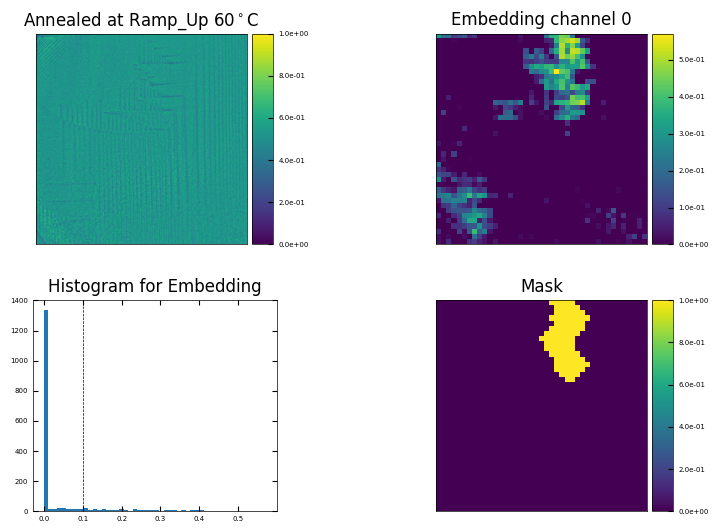

In [24]:
# If you don't want uncertanties, don't include `err_std`
mask = viz.make_mask(embedding,t=4,c=0,
                    dataset_key='/old_windows/windows_logdata',
                    save_folder='masking',eps=1)

/home/xinqiao/anaconda3/envs/m3_test/lib/python3.10/site-packages/m3_learning/viz/printing.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


/home/xinqiao/anaconda3/envs/m3_test/lib/python3.10/site-packages/m3_learning/nn/Bright_Field_NN/Viz.py:567: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 640x480 with 0 Axes>

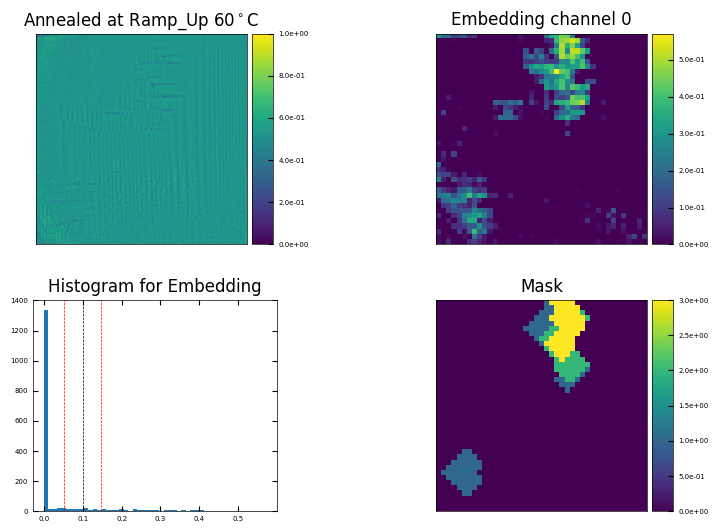

In [25]:
# if you include err_std, it will return three binary masks: original, lower bound, upper bound
mask,mask0,mask1 = viz.make_mask(embedding,t=4,c=0,
                                 dataset_key='/old_windows/windows_logdata',
                                 save_folder='masking',
                                 eps=1,err_std=0.5)

In [26]:
# Look at the movie generated in previous section; figure out which channels match domain patterns
channels = [0,4,6,7]

# Look at which channels are opposite of selected channels. These will be subtracted during cleaning
div_channels = [2,6,0,0]

# label the domain of each channel as keys and slope as value
legends_dict = {'<100> Horizontal':0,
                '<110> Left':45,
                '<100> Vertical':90,
                '<110> Right':-45}
# List format for labels
legends = list(legends_dict.keys())

  0%|          | 0/43 [00:00<?, ?it/s]

 26%|██▌       | 11/43 [00:00<00:00, 101.32it/s]

 51%|█████     | 22/43 [00:00<00:00, 89.93it/s] 

 77%|███████▋  | 33/43 [00:00<00:00, 95.02it/s]

100%|██████████| 43/43 [00:00<00:00, 90.40it/s]

100%|██████████| 43/43 [00:00<00:00, 91.66it/s]

<Figure size 640x480 with 0 Axes>

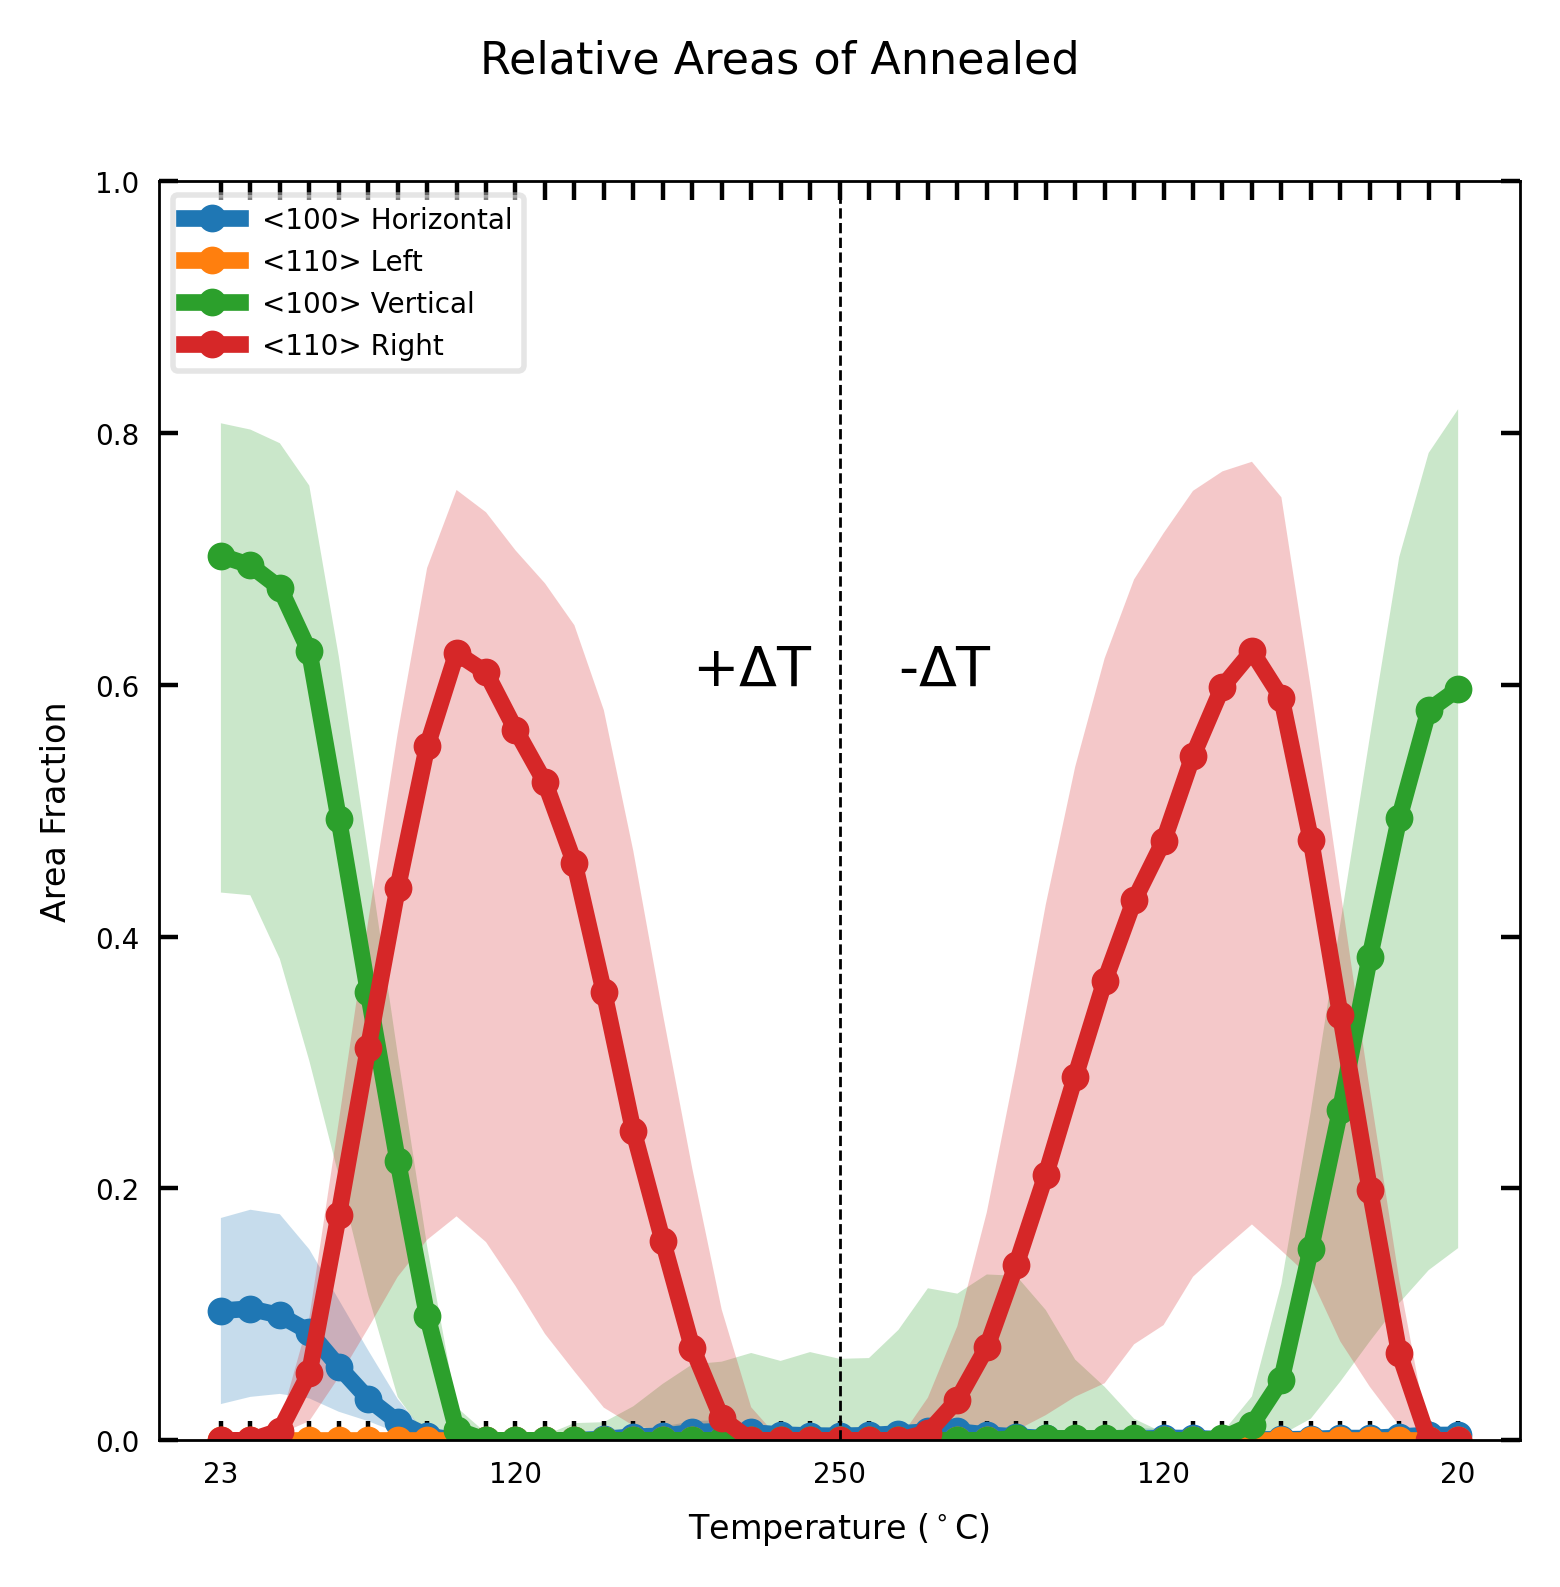

In [27]:
# If masked=True, relative areas are calculated from only the mask
# If masked = False, we will multiply the ma
rel_areas = viz.graph_relative_area(embedding, 
                                    dataset_key='/old_windows/windows_logdata',
                                    channels=channels,smoothing=5,
                                    clean_div=div_channels,
                                    legends=legends,
                                    masked=True,
                                    err_std=1,
                                    save_folder=f'./Relative Areas/')